In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import t
from scipy import stats
import numpy as np
import seaborn as sns
import pingouin as pg
from IPython.display import display
from statsmodels.stats.inter_rater import fleiss_kappa
import scikit_posthocs as sp
import krippendorff

In [2]:
df_human_generated = pd.read_csv('human_generated.csv')
df_model_generated = pd.read_csv('model_generated.csv')
df_baseline_generated = pd.read_csv('baseline_generated.csv')

In [3]:
# drop the email columns for privacy
df_human_generated = df_human_generated.drop(columns=['Email address'])
df_model_generated = df_model_generated.drop(columns=['Email address'])
df_baseline_generated = df_baseline_generated.drop(columns=['Email address'])

In [4]:
df_baseline_generated

Timestamp What is your age range? What is your gender?  \
0   20/08/2024 17:50:47                   25-34                 Male   
1   22/08/2024 15:06:02                   25-34                 Male   
2   23/08/2024 17:26:27                   25-34                 Male   
3   23/08/2024 23:55:27                   25-34                 Male   
4   25/08/2024 23:11:12                   25-34                 Male   
5   28/08/2024 12:28:44                   25-34               Female   
6   28/08/2024 12:38:40                   25-34                 Male   
7   30/08/2024 20:42:07                   25-34                 Male   
8   31/08/2024 18:26:22                   25-34                 Male   
9   02/09/2024 09:06:45                   25-34                 Male   
10  04/09/2024 01:00:08                   18-24                 Male   
11  05/09/2024 16:55:03                   25-34                 Male   
12  05/09/2024 17:55:53                   25-34                 Male   
13  06/09/2024 16:01:05                   25-34                 Male   
14  07/09/2024 22:11:54                   18-24                 Male   
15  11/09/2024 00:35:15                   25-34                 Male   
16  12/09/2024 13:17:10                   25-34               Female   

   What is the highest level of education you have completed?  \
0                                   Bachelor's degree           
1                                   Bachelor's degree           
2                                        Some college           
3                                     Master's degree           
4                                   Bachelor's degree           
5                                   Bachelor's degree           
6                                   Bachelor's degree           
7                                   Bachelor's degree           
8                                   Bachelor's degree           
9                                     Master's degree           
10                                  Bachelor's degree           
11                                    Master's degree           
12                                  Bachelor's degree           
13                                  Bachelor's degree           
14                                  Bachelor's degree           
15                                    Master's degree           
16                                  Bachelor's degree           

   What is the highest level of English proficiency you have achieved?  \
0                                       C1 (Advanced)                    
1                                       C1 (Advanced)                    
2                                       C1 (Advanced)                    
3                                       C1 (Advanced)                    
4                                   B1 (Intermediate)                    
5                                       C1 (Advanced)                    
6                                     C2 (Proficient)                    
7                                       C1 (Advanced)                    
8                                       C1 (Advanced)                    
9                                       C1 (Advanced)                    
10                                      C1 (Advanced)                    
11                                    C2 (Proficient)                    
12                                      C1 (Advanced)                    
13                                      C1 (Advanced)                    
14                                      C1 (Advanced)                    
15                                      C1 (Advanced)                    
16                                      C1 (Advanced)                    

   Please read the following document called League of Legends Solo Queue Ranked Games carefully:\n\n"League of Legends is a multiplayer online battle arena where two teams, blue and red, face off. There are three

In [5]:
df_model_generated

Timestamp What is your age range? What is your gender?  \
0   21/08/2024 00:11:58                   25-34                 Male   
1   22/08/2024 14:50:41                   25-34                 Male   
2   23/08/2024 17:43:45                   25-34                 Male   
3   23/08/2024 23:59:49                   25-34                 Male   
4   26/08/2024 10:39:31                   25-34                 Male   
5   28/08/2024 12:44:15                   25-34               Female   
6   30/08/2024 20:42:09                   25-34                 Male   
7   01/09/2024 15:24:34                   25-34                 Male   
8   02/09/2024 23:44:59                   18-24                 Male   
9   05/09/2024 18:29:57                   25-34                 Male   
10  06/09/2024 16:15:43                   25-34                 Male   
11  08/09/2024 01:29:33                   25-34                 Male   
12  09/09/2024 10:01:02                   18-24                 Male   
13  10/09/2024 09:48:48                   25-34                 Male   
14  11/09/2024 01:26:05                   25-34                 Male   
15  12/09/2024 13:20:55                   25-34               Female   

   What is the highest level of education you have completed?  \
0                                   Bachelor's degree           
1                                   Bachelor's degree           
2                                        Some college           
3                                     Master's degree           
4                                   Bachelor's degree           
5                                   Bachelor's degree           
6                                   Bachelor's degree           
7                                   Bachelor's degree           
8                                   Bachelor's degree           
9                                   Bachelor's degree           
10                                  Bachelor's degree           
11                                  Bachelor's degree           
12                                  Bachelor's degree           
13                                    Master's degree           
14                                    Master's degree           
15                                  Bachelor's degree           

   What is the highest level of English proficiency you have achieved?  \
0                                       C1 (Advanced)                    
1                                       C1 (Advanced)                    
2                                       C1 (Advanced)                    
3                                       C1 (Advanced)                    
4                                   B1 (Intermediate)                    
5                                       C1 (Advanced)                    
6                                       C1 (Advanced)                    
7                                       C1 (Advanced)                    
8                                       C1 (Advanced)                    
9                                       C1 (Advanced)                    
10                                      C1 (Advanced)                    
11                                    C2 (Proficient)                    
12                                      C1 (Advanced)                    
13                                    C2 (Proficient)                    
14                                      C1 (Advanced)                    
15                                      C1 (Advanced)                    

   Please read the following document called League of Legends Solo Queue Ranked Games carefully:\n\n"League of Legends is a multiplayer online battle arena where two teams, blue and red, face off. There are three lanes, a jungle, and five roles. The goal is to take down the enemy Nexus to win the game.\n\nThis dataset contains statistics of ranked games from a Platinum Elo. Each game is unique and can be identified by i

In [6]:
new_column_names = [
    # 'timestamp', 'email', 'age_range', 'gender', 'education', 'english_prof',
    'timestamp', 'age_range', 'gender', 'education', 'english_prof',
    'lol_game_desc', 'tag_lol', 'tag_video_games', 'tag_multiplayer', 'tag_game_data',
    'tag_riot_api', 'tag_battle_arena', 'spec_lol', 'spec_video_games', 'spec_multiplayer',
    'spec_game_data', 'spec_riot_api', 'spec_battle_arena', 'tags_coverage_lol',
    'suggested_tags_lol', 'forex_desc', 'tag_hist_price', 'tag_forex', 'tag_usd_jpy',
    'tag_currency_pairs', 'tag_yearly_data', 'tag_finance', 'tag_minute_high',
    'spec_hist_price', 'spec_forex', 'spec_usd_jpy', 'spec_currency_pairs',
    'spec_yearly_data', 'spec_finance', 'spec_minute_high', 'tags_coverage_forex',
    'suggested_tags_forex', 'lung_cancer_desc', 'tag_lung_cancer', 'tag_cancer',
    'tag_oncology', 'tag_mrna_prof', 'tag_biology', 'tag_carcinomas', 'tag_gene_expr',
    'spec_lung_cancer', 'spec_cancer', 'spec_oncology', 'spec_mrna_prof', 'spec_biology',
    'spec_carcinomas', 'spec_gene_expr', 'tags_coverage_lung', 'suggested_tags_lung',
    'colleges_desc', 'common_tags1', 'common_tags_coverage1', 'suggested_common_tags1',
    'common_tags2', 'common_tags_coverage2', 'suggested_common_tags2'
]

df_human_generated.columns = new_column_names
df_human_generated.columns

Index(['timestamp', 'age_range', 'gender', 'education', 'english_prof',
       'lol_game_desc', 'tag_lol', 'tag_video_games', 'tag_multiplayer',
       'tag_game_data', 'tag_riot_api', 'tag_battle_arena', 'spec_lol',
       'spec_video_games', 'spec_multiplayer', 'spec_game_data',
       'spec_riot_api', 'spec_battle_arena', 'tags_coverage_lol',
       'suggested_tags_lol', 'forex_desc', 'tag_hist_price', 'tag_forex',
       'tag_usd_jpy', 'tag_currency_pairs', 'tag_yearly_data', 'tag_finance',
       'tag_minute_high', 'spec_hist_price', 'spec_forex', 'spec_usd_jpy',
       'spec_currency_pairs', 'spec_yearly_data', 'spec_finance',
       'spec_minute_high', 'tags_coverage_forex', 'suggested_tags_forex',
       'lung_cancer_desc', 'tag_lung_cancer', 'tag_cancer', 'tag_oncology',
       'tag_mrna_prof', 'tag_biology', 'tag_carcinomas', 'tag_gene_expr',
       'spec_lung_cancer', 'spec_cancer', 'spec_oncology', 'spec_mrna_prof',
       'spec_biology', 'spec_carcinomas', 'spec_gene_expr'

In [7]:
new_column_names = [
    # 'timestamp', 'email', 'age_range', 'gender', 'education', 'english_prof',
    'timestamp', 'age_range', 'gender', 'education', 'english_prof',
    'lol_game_desc', 'tag_ranked_matches', 'tag_games', 'tag_league_of_legends',
    'tag_game_data_analysis', 'tag_computer_games', 'tag_gaming', 'tag_esports',
    'spec_ranked_matches', 'spec_games', 'spec_league_of_legends',
    'spec_game_data_analysis', 'spec_computer_games', 'spec_gaming', 'spec_esports',
    'tags_coverage_lol', 'suggested_tags_lol',
    'forex_desc', 'tag_historical_price_data', 'tag_minute_interval',
    'tag_historical_data', 'tag_forex', 'tag_candlestick', 'tag_minute', 'tag_high',
    'spec_historical_price_data', 'spec_minute_interval', 'spec_historical_data',
    'spec_forex', 'spec_candlestick', 'spec_minute', 'spec_high',
    'tags_coverage_forex', 'suggested_tags_forex',
    'lung_cancer_desc', 'tag_lung_cancer', 'tag_cancer', 'tag_science',
    'tag_cancer_research', 'tag_biology', 'tag_medicine', 'tag_health',
    'spec_lung_cancer', 'spec_cancer', 'spec_science', 'spec_cancer_research',
    'spec_biology', 'spec_medicine', 'spec_health',
    'tags_coverage_lung', 'suggested_tags_lung',
    'colleges_desc', 'common_tags1', 'common_tags_coverage1', 'suggested_common_tags1',
    'common_tags2', 'common_tags_coverage2', 'suggested_common_tags2'
]

df_model_generated.columns = new_column_names
df_model_generated.columns

Index(['timestamp', 'age_range', 'gender', 'education', 'english_prof',
       'lol_game_desc', 'tag_ranked_matches', 'tag_games',
       'tag_league_of_legends', 'tag_game_data_analysis', 'tag_computer_games',
       'tag_gaming', 'tag_esports', 'spec_ranked_matches', 'spec_games',
       'spec_league_of_legends', 'spec_game_data_analysis',
       'spec_computer_games', 'spec_gaming', 'spec_esports',
       'tags_coverage_lol', 'suggested_tags_lol', 'forex_desc',
       'tag_historical_price_data', 'tag_minute_interval',
       'tag_historical_data', 'tag_forex', 'tag_candlestick', 'tag_minute',
       'tag_high', 'spec_historical_price_data', 'spec_minute_interval',
       'spec_historical_data', 'spec_forex', 'spec_candlestick', 'spec_minute',
       'spec_high', 'tags_coverage_forex', 'suggested_tags_forex',
       'lung_cancer_desc', 'tag_lung_cancer', 'tag_cancer', 'tag_science',
       'tag_cancer_research', 'tag_biology', 'tag_medicine', 'tag_health',
       'spec_lung_cancer',

In [8]:
new_column_names = [
    # 'timestamp', 'email', 'age_range', 'gender', 'education', 'english_prof',
    'timestamp', 'age_range', 'gender', 'education', 'english_prof',
    'lol_game_desc', 'tag_turret', 'tag_lost', 'tag_destroyed', 'tag_impressions',
    'tag_clicking', 'tag_cost', 'tag_advertisement', 'spec_turret', 'spec_lost',
    'spec_destroyed', 'spec_advertisement', 'spec_impressions', 'spec_clicking',
    'spec_cost', 'tags_coverage_lol', 'suggested_tags_lol',
    'forex_desc', 'tag_thyrotropin', 'tag_minute', 'tag_usd', 'tag_releasing',
    'tag_high', 'tag_bid', 'tag_ask', 'spec_thyrotropin', 'spec_minute', 'spec_usd',
    'spec_releasing', 'spec_high', 'spec_bid', 'spec_ask',
    'tags_coverage_forex', 'suggested_tags_forex',
    'lung_cancer_desc', 'tag_cancer', 'tag_microarray', 'tag_prostate',
    'tag_ovarian', 'tag_gliomas', 'tag_lung', 'tag_genes',
    'spec_cancer', 'spec_microarray', 'spec_prostate', 'spec_ovarian',
    'spec_gliomas', 'spec_lung', 'spec_genes',
    'tags_coverage_lung', 'suggested_tags_lung',
    'colleges_desc', 'common_tags1', 'common_tags_coverage1', 'suggested_common_tags1',
    'common_tags2', 'common_tags_coverage2', 'suggested_common_tags2'
]

df_baseline_generated.columns = new_column_names
df_baseline_generated.columns

Index(['timestamp', 'age_range', 'gender', 'education', 'english_prof',
       'lol_game_desc', 'tag_turret', 'tag_lost', 'tag_destroyed',
       'tag_impressions', 'tag_clicking', 'tag_cost', 'tag_advertisement',
       'spec_turret', 'spec_lost', 'spec_destroyed', 'spec_advertisement',
       'spec_impressions', 'spec_clicking', 'spec_cost', 'tags_coverage_lol',
       'suggested_tags_lol', 'forex_desc', 'tag_thyrotropin', 'tag_minute',
       'tag_usd', 'tag_releasing', 'tag_high', 'tag_bid', 'tag_ask',
       'spec_thyrotropin', 'spec_minute', 'spec_usd', 'spec_releasing',
       'spec_high', 'spec_bid', 'spec_ask', 'tags_coverage_forex',
       'suggested_tags_forex', 'lung_cancer_desc', 'tag_cancer',
       'tag_microarray', 'tag_prostate', 'tag_ovarian', 'tag_gliomas',
       'tag_lung', 'tag_genes', 'spec_cancer', 'spec_microarray',
       'spec_prostate', 'spec_ovarian', 'spec_gliomas', 'spec_lung',
       'spec_genes', 'tags_coverage_lung', 'suggested_tags_lung',
       'coll

# Filter out failed attention check answers

In [9]:
# filter out rows and record how many rows are dropped and left, filter out where colleges_desc is not "Social Science"
print("Before filtering: ", df_baseline_generated.shape, df_model_generated.shape, df_human_generated.shape)
df_baseline_generated = df_baseline_generated[df_baseline_generated['colleges_desc'] == "Social Science"]
df_model_generated = df_model_generated[df_model_generated['colleges_desc'] == "Social Science"]
df_human_generated = df_human_generated[df_human_generated['colleges_desc'] == "Social Science"]
print("After filtering: ", df_baseline_generated.shape, df_model_generated.shape, df_human_generated.shape)

Before filtering:  (17, 63) (16, 63) (16, 61)
After filtering:  (17, 63) (16, 63) (16, 61)


# Background of subjects

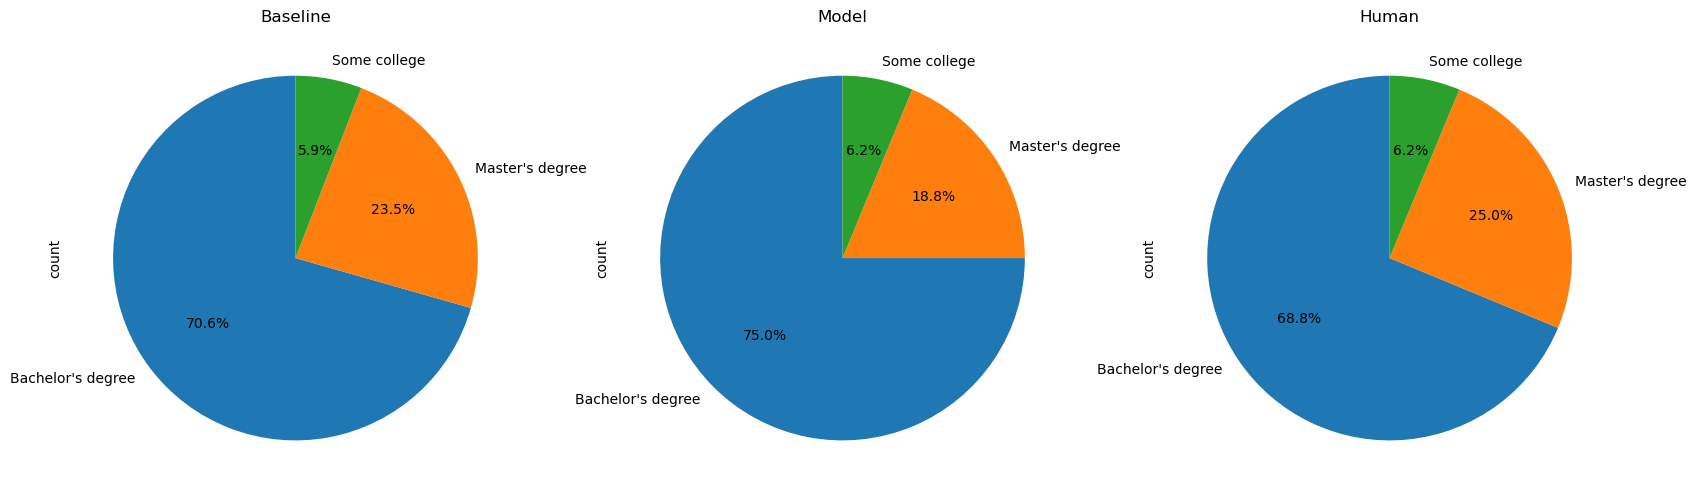

In [10]:
fig, ax = plt.subplots(1, 3, figsize=(20, 10))
df_baseline_generated['education'].value_counts().plot.pie(ax=ax[0], autopct='%1.1f%%', startangle=90)
df_model_generated['education'].value_counts().plot.pie(ax=ax[1], autopct='%1.1f%%', startangle=90)
df_human_generated['education'].value_counts().plot.pie(ax=ax[2], autopct='%1.1f%%', startangle=90)
ax[0].set_title('Baseline')
ax[1].set_title('Model')
ax[2].set_title('Human')
plt.show()

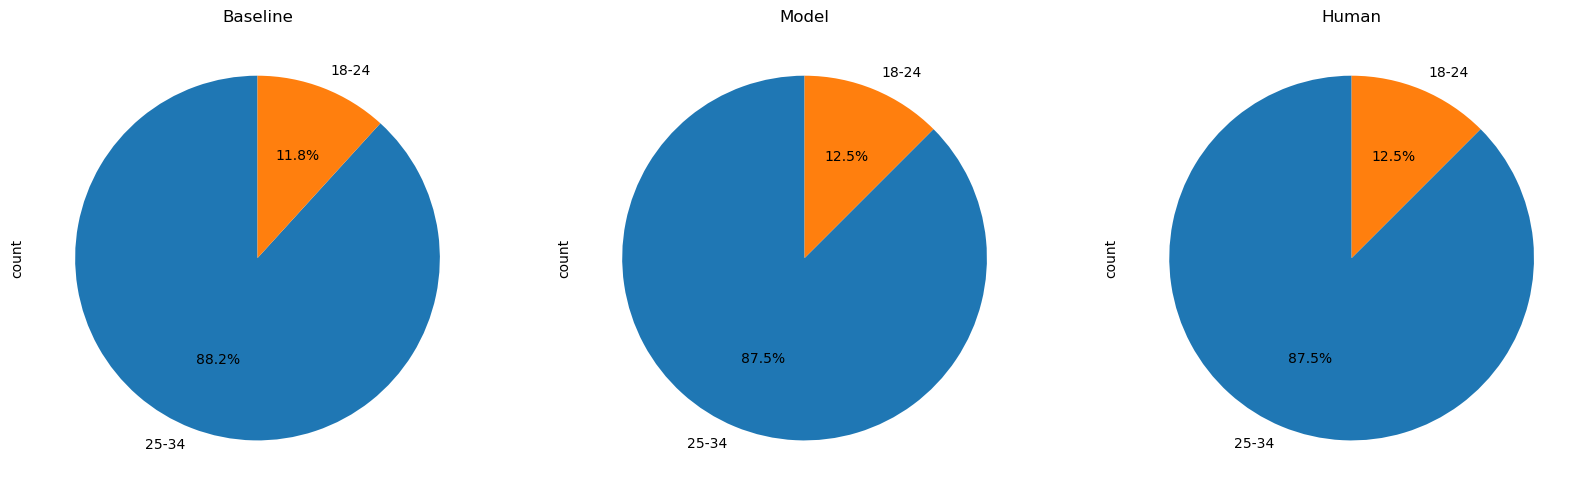

In [11]:
fig, ax = plt.subplots(1, 3, figsize=(20, 10))
df_baseline_generated['age_range'].value_counts().plot.pie(ax=ax[0], autopct='%1.1f%%', startangle=90)
df_model_generated['age_range'].value_counts().plot.pie(ax=ax[1], autopct='%1.1f%%', startangle=90)
df_human_generated['age_range'].value_counts().plot.pie(ax=ax[2], autopct='%1.1f%%', startangle=90)

ax[0].set_title('Baseline')
ax[1].set_title('Model')
ax[2].set_title('Human')
plt.show()

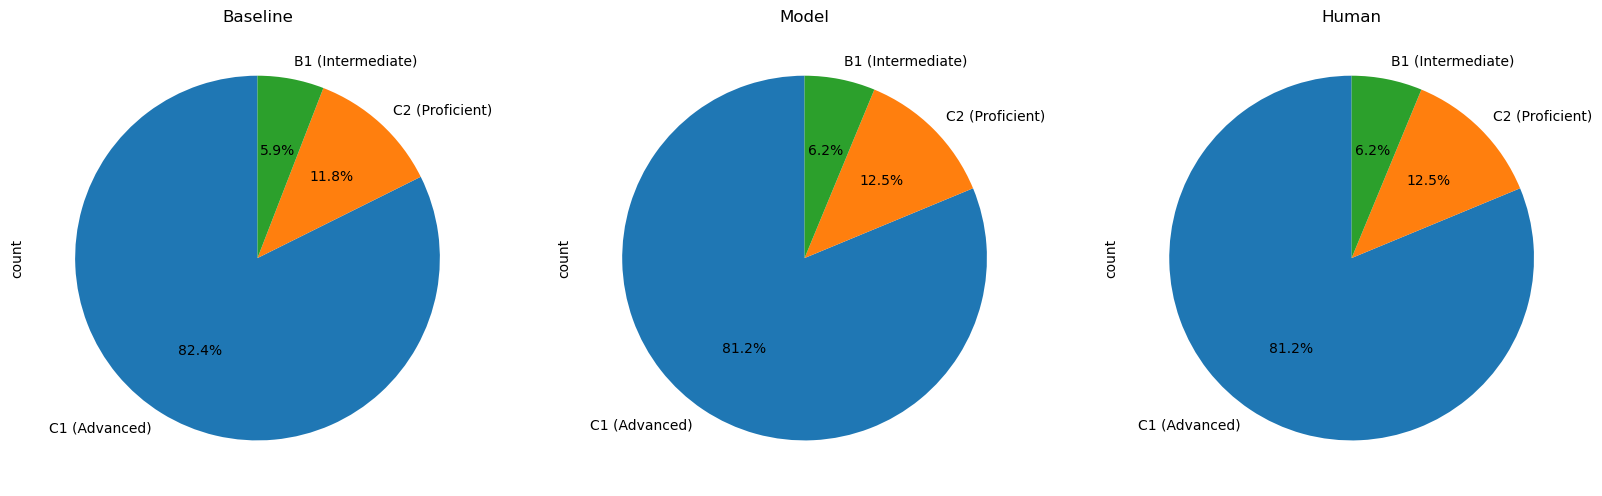

In [12]:
fig, ax = plt.subplots(1, 3, figsize=(20, 10))
df_baseline_generated['english_prof'].value_counts().plot.pie(ax=ax[0], autopct='%1.1f%%', startangle=90)
df_model_generated['english_prof'].value_counts().plot.pie(ax=ax[1], autopct='%1.1f%%', startangle=90)
df_human_generated['english_prof'].value_counts().plot.pie(ax=ax[2], autopct='%1.1f%%', startangle=90)
ax[0].set_title('Baseline')
ax[1].set_title('Model')
ax[2].set_title('Human')
plt.show()

# Intruder Detection

In [13]:
def intruder_detected(row, prefix, intruder_tag):
    tag_columns = [col for col in row.index if col.startswith(prefix)]
    return intruder_tag in row[tag_columns].values

def process_intruder_detection(df, intruder_dict, results_dict):
    for prefix, intruder in intruder_dict.items():
        detected_count = df.apply(intruder_detected, axis=1, args=(prefix, intruder)).sum()
        not_detected_count = len(df) - detected_count
        results_dict[prefix]['detected'] = detected_count
        results_dict[prefix]['not_detected'] = not_detected_count

baseline_intruders = {
    'lol_game_desc': 'Passenger',
    'forex_desc': 'Jump',
    'lung_cancer_desc': 'Piece',
}
baseline_results = {
    'lol_game_desc': {'detected': 0, 'not_detected': 0},
    'forex_desc': {'detected': 0, 'not_detected': 0},
    'lung_cancer_desc': {'detected': 0, 'not_detected': 0},
}

model_intruders = {
    'lol_game_desc': 'Chess',
    'forex_desc': 'Species',
    'lung_cancer_desc': 'Breast Cancer',
}
model_results = {
    'lol_game_desc': {'detected': 0, 'not_detected': 0},
    'forex_desc': {'detected': 0, 'not_detected': 0},
    'lung_cancer_desc': {'detected': 0, 'not_detected': 0},
}

human_intruders = {
    'lol_game_desc': 'Chess',
    'forex_desc': 'Species',
    'lung_cancer_desc': 'Breast Cancer',
}
human_results = {
    'lol_game_desc': {'detected': 0, 'not_detected': 0},
    'forex_desc': {'detected': 0, 'not_detected': 0},
    'lung_cancer_desc': {'detected': 0, 'not_detected': 0},
}

text_name_map = {
    'lol_game_desc': 'League of Legends',
    'forex_desc': 'Forex',
    'lung_cancer_desc': 'Lung Cancer',
}

process_intruder_detection(df_baseline_generated, baseline_intruders, baseline_results)
process_intruder_detection(df_model_generated, model_intruders, model_results)
process_intruder_detection(df_human_generated, human_intruders, human_results)

print(baseline_results)
print(model_results)
print(human_results)

{'lol_game_desc': {'detected': 11, 'not_detected': 6}, 'forex_desc': {'detected': 1, 'not_detected': 16}, 'lung_cancer_desc': {'detected': 10, 'not_detected': 7}}
{'lol_game_desc': {'detected': 16, 'not_detected': 0}, 'forex_desc': {'detected': 14, 'not_detected': 2}, 'lung_cancer_desc': {'detected': 15, 'not_detected': 1}}
{'lol_game_desc': {'detected': 16, 'not_detected': 0}, 'forex_desc': {'detected': 16, 'not_detected': 0}, 'lung_cancer_desc': {'detected': 16, 'not_detected': 0}}


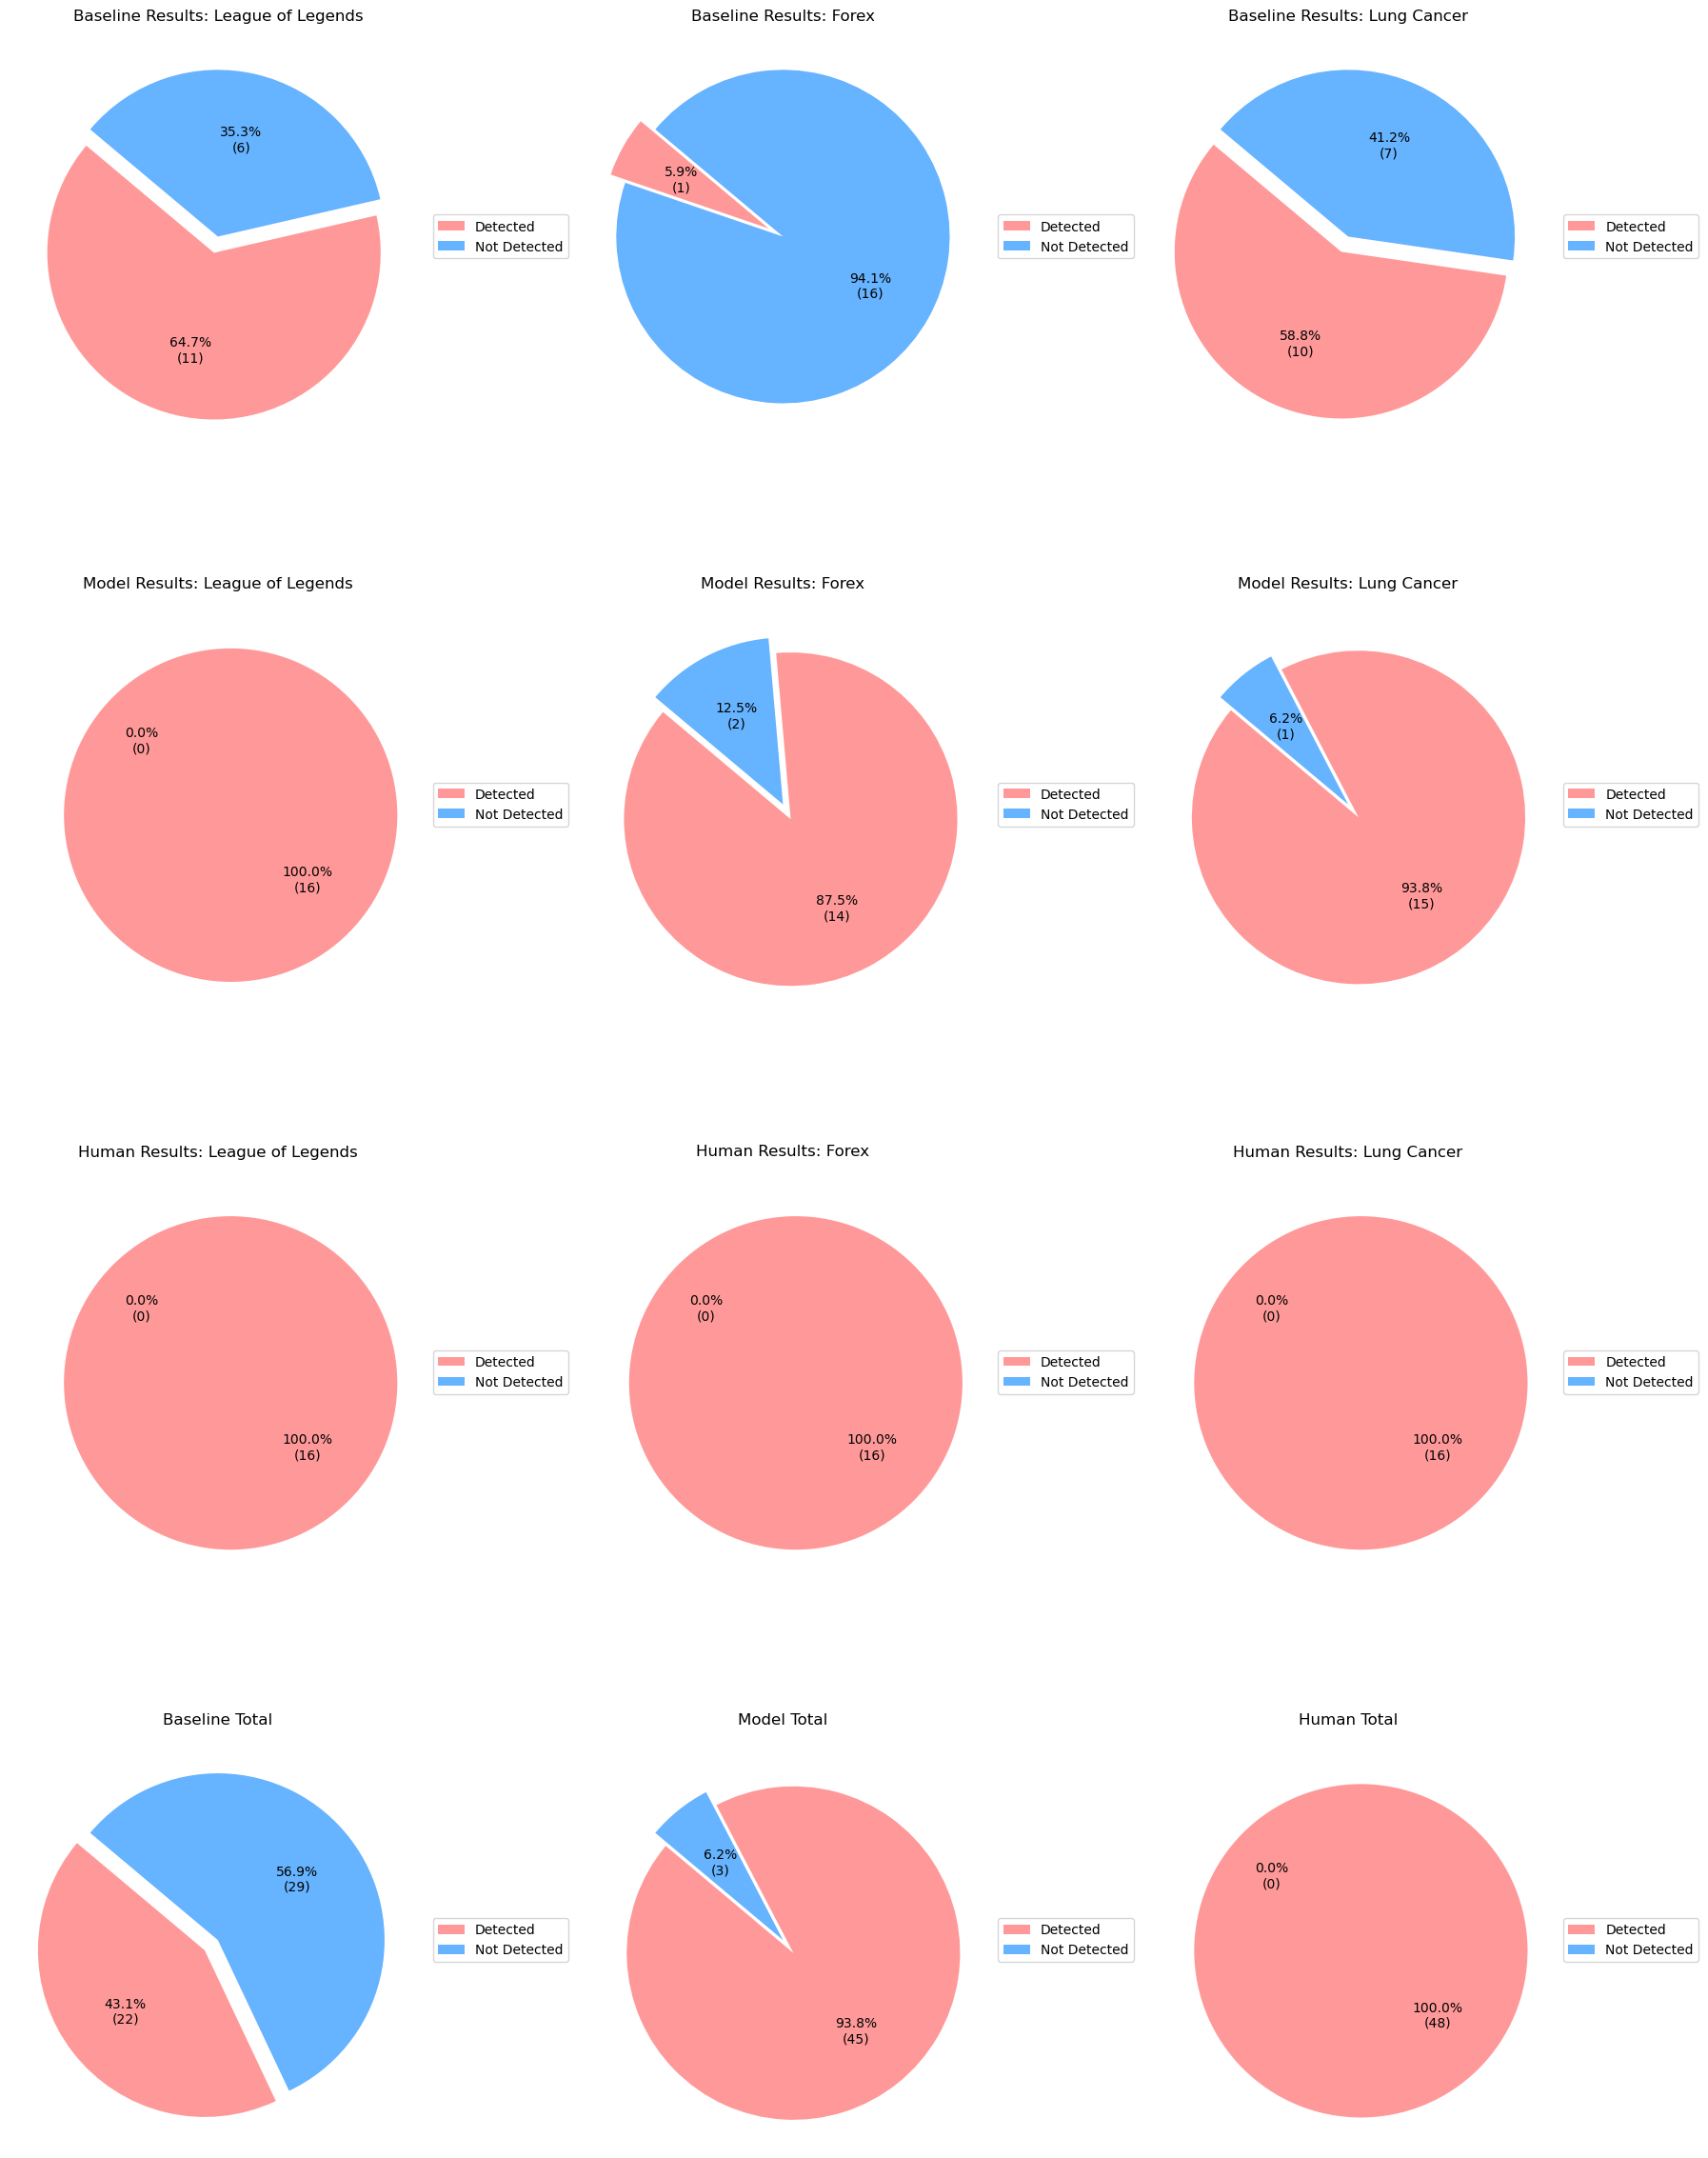

In [14]:
def plot_pie_charts_with_totals(baseline_results, model_results, human_results):
    def calculate_totals(results_dict):
        total_detected = sum(result['detected'] for result in results_dict.values())
        total_not_detected = sum(result['not_detected'] for result in results_dict.values())
        return {'detected': total_detected, 'not_detected': total_not_detected}
    
    baseline_totals = calculate_totals(baseline_results)
    model_totals = calculate_totals(model_results)
    human_totals = calculate_totals(human_results)

    pie_data = [
        (baseline_results, "Baseline Results"),
        (model_results, "Model Results"),
        (human_results, "Human Results")
    ]
    
    total_data = [
        ({'Total': baseline_totals}, "Baseline Total"),
        ({'Total': model_totals}, "Model Total"),
        ({'Total': human_totals}, "Human Total"),
    ]

    fig, axs = plt.subplots(4, 3, figsize=(18, 24))

    labels = ['Detected', 'Not Detected']
    colors = ['#ff9999', '#66b3ff']

    def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            absolute = int(round(pct / 100. * total))
            return f"{pct:.1f}%\n({absolute:d})"
        return my_format

    for i, (results_dict, title_prefix) in enumerate(pie_data):
        for j, (desc, result) in enumerate(results_dict.items()):
            ax = axs[i, j]
            
            sizes = [result['detected'], result['not_detected']]
            explode = (0.1, 0)

            wedges, texts, autotexts = ax.pie(sizes, colors=colors, autopct=autopct_format(sizes), startangle=140, explode=explode)
            title_postfix = text_name_map[desc]
            ax.set_title(f'{title_prefix}: {title_postfix}')

            ax.legend(wedges, labels, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

    for j, (total_dict, title) in enumerate(total_data):
        ax = axs[3, j]
        result = total_dict['Total']
        
        sizes = [result['detected'], result['not_detected']]
        explode = (0.1, 0)

        wedges, texts, autotexts = ax.pie(sizes, colors=colors, autopct=autopct_format(sizes), startangle=140, explode=explode)
        ax.set_title(title)

        ax.legend(wedges, labels, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    
    plt.tight_layout()
    plt.show()

plot_pie_charts_with_totals(baseline_results, model_results, human_results)


# Analysis of the data

In [15]:
def analyze_tags(df, 
                 relevance_columns_list, 
                 spec_columns_list, 
                 coverage_columns_list, 
                 suggested_columns_list, 
                 common_tags_columns_1, 
                 common_tags_true_tags_1, 
                 common_tags_coverage_1,
                 common_tags_columns_2, 
                 common_tags_true_tags_2,
                 common_tags_coverage_2):
    
    all_relevance_data = []
    all_spec_data = []
    all_coverage_data = []

    for i, (relevance_columns, spec_columns, coverage_columns, suggested_columns) in enumerate(zip(relevance_columns_list, spec_columns_list, coverage_columns_list, suggested_columns_list)):
        print(f"\n--- Analyzing Document {i+1} ---")
        
        # Preprocess numerical columns to turn e.g. 3 - Moderately well into 3
        columns_to_preprocess = relevance_columns + spec_columns
        df = preprocess_numerical_columns(df, columns_to_preprocess)
        
        def calculate_distribution(df, columns):
            return df[columns].agg(['std', 'min', 'max', 'mean'])

        document_dist_relevance = calculate_distribution(df, relevance_columns)
        document_dist_spec = calculate_distribution(df, spec_columns)
        
        print(f"Document {i+1} Relevance Distribution:")
        print(document_dist_relevance)
        print(f"Document {i+1} Generality Distribution:")
        print(document_dist_spec)
        
        plot_scores_with_mean_std_ci_grid(df, relevance_columns, f'Document {i+1} - Raw Relevance Scores')
        plot_scores_with_mean_std_ci_grid(df, spec_columns, f'Document {i+1} - Raw Generality Scores')
        plot_coverage_with_mean_std_ci_grid(df, coverage_columns, f'Document {i+1} - Tag Coverage')

        calculate_and_plot_correlations(df, relevance_columns, spec_columns, coverage_columns)
        
        all_relevance_data.extend(df[relevance_columns].values.flatten())
        all_spec_data.extend(df[spec_columns].values.flatten())
        all_coverage_data.extend(df[coverage_columns].values.flatten())

    all_relevance_data = np.array(all_relevance_data)
    all_spec_data = np.array(all_spec_data)
    all_coverage_data = np.array(all_coverage_data)
    
    plot_aggregated_scores(
        all_relevance_data, 
        all_spec_data, 
        all_coverage_data, 
        'Aggregated Scores Across All Documents'
    )

    calculate_and_plot_aggregated_correlations(all_relevance_data, all_spec_data, all_coverage_data)
    
    relevance_columns = relevance_columns_list[0] + relevance_columns_list[1] + relevance_columns_list[2]
    spec_columns = spec_columns_list[0] + spec_columns_list[1] + spec_columns_list[2]
    coverage_columns = coverage_columns_list[0] + coverage_columns_list[1] + coverage_columns_list[2]
    shared_coverage_columns = common_tags_coverage_1 + common_tags_coverage_2
    plot_icc(df, relevance_columns, spec_columns, coverage_columns, shared_coverage_columns)
             
    plot_common_tags_coverage_with_stats(df, common_tags_coverage_1, 'First Pair Common Tags Coverage')

    plot_common_tags_coverage_with_stats(df, common_tags_coverage_2, 'Second Pair Common Tags Coverage')

    # Compare common tags with true tags across all documents
    # First pair of common tags
    first_pair_common_tags = df[common_tags_columns_1].apply(lambda x: ', '.join(x.dropna()), axis=1)
    
    # Second pair of common tags
    second_pair_common_tags = df[common_tags_columns_2].apply(lambda x: ', '.join(x.dropna()), axis=1)
    
    first_pair_confusion_matrix = calculate_confusion_matrix(first_pair_common_tags, common_tags_true_tags_1, relevance_columns_list[0])
    
    second_pair_confusion_matrix = calculate_confusion_matrix(second_pair_common_tags, common_tags_true_tags_2, relevance_columns_list[1])
    
    accuracy_1, precision_1, recall_1, specificity_1, f1_score_1 = calculate_metrics(first_pair_confusion_matrix)
    
    accuracy_2, precision_2, recall_2, specificity_2, f1_score_2 = calculate_metrics(second_pair_confusion_matrix)
    
    print_metrics("First Pair Common Tags", accuracy_1, precision_1, recall_1, specificity_1, f1_score_1)
    
    print_metrics("Second Pair Common Tags", accuracy_2, precision_2, recall_2, specificity_2, f1_score_2)
    
    plot_confusion_matrix(first_pair_confusion_matrix, "First Pair Common Tags")
    plot_confusion_matrix(second_pair_confusion_matrix, "Second Pair Common Tags")


# Utility Functions
def preprocess_numerical_columns(df, columns):
    df = df.copy()
    for col in columns:
        if df[col].dtype == 'object':
            df[col] = df[col].str.extract('(\d+)', expand=False).astype(float)
    return df

def plot_scores_with_mean_std_ci_grid(df, columns, title_prefix, n_cols=3, confidence_level=0.95):
    num_columns = len(columns) + 1  # +1 to include the aggregated histogram
    n_rows = (num_columns + n_cols - 1) // n_cols
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows))
    
    axs = axs.flatten()

    aggregated_data = []

    for i, col in enumerate(columns):
        data = df[col].dropna()
        nan_count = df[col].isna().sum()
        mean = data.mean()
        std = data.std()
        n = len(data)
        
        aggregated_data.extend(data)
        
        # Calculate the margin of error for the confidence interval
        t_stat = t.ppf((1 + confidence_level) / 2., n - 1)  # t-statistic for confidence interval
        margin_of_error = t_stat * (std / np.sqrt(n))
        ci_lower = mean - margin_of_error
        ci_upper = mean + margin_of_error
        
        axs[i].hist(data, bins=10, color='lightblue', edgecolor='black', alpha=0.7)
        axs[i].set_title(f'{title_prefix} - {col}')
        axs[i].set_xlabel('Score')
        axs[i].set_ylabel('Frequency')
        axs[i].grid(True)
        
        axs[i].axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')
        
        axs[i].axvline(mean - std, color='green', linestyle='dashed', linewidth=2, label=f'-1 Std: {mean - std:.2f}')
        axs[i].axvline(mean + std, color='green', linestyle='dashed', linewidth=2, label=f'+1 Std: {mean + std:.2f}')
        
        axs[i].axvline(ci_lower, color='blue', linestyle='dotted', linewidth=2, label=f'CI Lower: {ci_lower:.2f}')
        axs[i].axvline(ci_upper, color='blue', linestyle='dotted', linewidth=2, label=f'CI Upper: {ci_upper:.2f}')
        
        if nan_count > 0:
            axs[i].legend(title=f'Not Applicable: {nan_count}')
        else:
            axs[i].legend()

    # Now plot the aggregated histogram
    aggregated_data = np.array(aggregated_data)
    mean_agg = aggregated_data.mean()
    std_agg = aggregated_data.std()
    n_agg = len(aggregated_data)
    nan_count_agg = df[columns].isna().sum().sum()  # Total NaN count across all columns
    
    # Calculate the margin of error for the confidence interval for aggregated data
    t_stat_agg = t.ppf((1 + confidence_level) / 2., n_agg - 1)
    margin_of_error_agg = t_stat_agg * (std_agg / np.sqrt(n_agg))
    ci_lower_agg = mean_agg - margin_of_error_agg
    ci_upper_agg = mean_agg + margin_of_error_agg
    
    axs[-1].hist(aggregated_data, bins=10, color='lightcoral', edgecolor='black', alpha=0.7)
    axs[-1].set_title(f'{title_prefix} - Aggregated')
    axs[-1].set_xlabel('Score')
    axs[-1].set_ylabel('Frequency')
    axs[-1].grid(True)
    
    axs[-1].axvline(mean_agg, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_agg:.2f}')
    
    axs[-1].axvline(mean_agg - std_agg, color='green', linestyle='dashed', linewidth=2, label=f'-1 Std: {mean_agg - std_agg:.2f}')
    axs[-1].axvline(mean_agg + std_agg, color='green', linestyle='dashed', linewidth=2, label=f'+1 Std: {mean_agg + std_agg:.2f}')
    
    axs[-1].axvline(ci_lower_agg, color='blue', linestyle='dotted', linewidth=2, label=f'CI Lower: {ci_lower_agg:.2f}')
    axs[-1].axvline(ci_upper_agg, color='blue', linestyle='dotted', linewidth=2, label=f'CI Upper: {ci_upper_agg:.2f}')
    
    if nan_count_agg > 0:
        axs[-1].legend(title=f'Not Applicable: {nan_count_agg}')
    else:
        axs[-1].legend()

    # Turn off any unused subplots (if any)
    for j in range(len(columns), len(axs) - 1):
        fig.delaxes(axs[j])

    plt.tight_layout()
    plt.show()

def plot_coverage_with_mean_std_ci_grid(df, coverage_columns, title_prefix, n_cols=3, confidence_level=0.95):
    """
    This function plots the coverage scores for common tags with mean, standard deviation, and confidence intervals.
    """
    num_columns = len(coverage_columns)
    n_rows = (num_columns + n_cols - 1) // n_cols
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows))
    
    axs = axs.flatten()

    for i, col in enumerate(coverage_columns):
        data = df[col].dropna()
        nan_count = df[col].isna().sum()
        mean = data.mean()
        std = data.std()
        n = len(data)
        
        if n > 1:
            t_stat = t.ppf((1 + confidence_level) / 2., n - 1)
            margin_of_error = t_stat * (std / np.sqrt(n))
            ci_lower = mean - margin_of_error
            ci_upper = mean + margin_of_error
        else:
            ci_lower, ci_upper = mean, mean
        
        axs[i].hist(data, bins=10, color='lightblue', edgecolor='black', alpha=0.7)
        axs[i].set_title(f'{title_prefix} - {col}')
        axs[i].set_xlabel('Coverage Score')
        axs[i].set_ylabel('Frequency')
        axs[i].grid(True)
        
        axs[i].axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')
        axs[i].axvline(mean - std, color='green', linestyle='dashed', linewidth=2, label=f'-1 Std: {mean - std:.2f}')
        axs[i].axvline(mean + std, color='green', linestyle='dashed', linewidth=2, label=f'+1 Std: {mean + std:.2f}')
        
        axs[i].axvline(ci_lower, color='blue', linestyle='dotted', linewidth=2, label=f'CI Lower: {ci_lower:.2f}')
        axs[i].axvline(ci_upper, color='blue', linestyle='dotted', linewidth=2, label=f'CI Upper: {ci_upper:.2f}')
        
        if nan_count > 0:
            axs[i].legend(title=f'Not Applicable: {nan_count}')
        else:
            axs[i].legend()

    for j in range(len(coverage_columns), len(axs)):
        fig.delaxes(axs[j])

    plt.tight_layout()
    plt.show()

def calculate_and_plot_correlations(df, relevance_columns, generality_columns, coverage_columns):
    correlations = {}
    
    coverage_column = coverage_columns[0]
    
    # Calculate correlations per tag
    for relevance_col, generality_col in zip(relevance_columns, generality_columns):
        tag = relevance_col.split('_')[1]
        
        corr_relevance_generality = df[relevance_col].corr(df[generality_col], method='spearman')
        
        corr_relevance_coverage = df[relevance_col].corr(df[coverage_column], method='spearman')
        
        corr_generality_coverage = df[generality_col].corr(df[coverage_column], method='spearman')
        
        correlations[tag] = {
            'Relevance vs Generality': corr_relevance_generality,
            # 'Relevance vs Coverage': corr_relevance_coverage,
            # 'Generality vs Coverage': corr_generality_coverage
        }
    
    correlations_df = pd.DataFrame(correlations).T
    
    relevance_data = df[relevance_columns].mean(axis=1)
    generality_data = df[generality_columns].mean(axis=1)
    coverage_data = df[coverage_column]
    
    overall_corr_relevance_generality = relevance_data.corr(generality_data, method='spearman')
    overall_corr_relevance_coverage = relevance_data.corr(coverage_data, method='spearman')
    overall_corr_generality_coverage = generality_data.corr(coverage_data, method='spearman')
    
    overall_correlations = pd.DataFrame({
        'Relevance vs Generality': [overall_corr_relevance_generality],
        # 'Relevance vs Coverage': [overall_corr_relevance_coverage],
        # 'Generality vs Coverage': [overall_corr_generality_coverage]
    }, index=['Overall'])

    print("Correlation per Tag:")
    print(correlations_df)
    
    print("\nOverall Correlations:")
    print(overall_correlations)
    
    plt.figure(figsize=(10, 6))
    sns.heatmap(correlations_df, annot=True, cmap='coolwarm', center=0, linewidths=.5)
    plt.title('Per-Tag Correlations')
    plt.show()

    plt.figure(figsize=(8, 2))
    sns.heatmap(overall_correlations, annot=True, cmap='coolwarm', center=0, linewidths=.5)
    plt.title('Overall Correlations')
    plt.show()

def plot_aggregated_scores(all_relevance_data, all_spec_data, all_coverage_data, title_prefix, confidence_level=0.95):
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))
    
    plot_distribution_with_stats(axs[0], all_relevance_data, f'{title_prefix} - Relevance Scores', 'Relevance Score', confidence_level)
    
    nan_count_spec = np.isnan(all_spec_data).sum()
    plot_distribution_with_stats(axs[1], all_spec_data, f'{title_prefix} - Generality Scores', 'Generality Score', confidence_level, nan_count=nan_count_spec)
    
    plot_distribution_with_stats(axs[2], all_coverage_data, f'{title_prefix} - Coverage Scores', 'Coverage Score', confidence_level)
    
    plt.tight_layout()
    plt.show()

def plot_distribution_with_stats(ax, data, title, xlabel, confidence_level=0.95, nan_count=None):
    data = np.array(data)
    data = data[~np.isnan(data)] 
    
    mean = data.mean()
    std = data.std()
    n = len(data)
    
    t_stat = t.ppf((1 + confidence_level) / 2., n - 1)
    margin_of_error = t_stat * (std / np.sqrt(n))
    ci_lower = mean - margin_of_error
    ci_upper = mean + margin_of_error
    
    ax.hist(data, bins=10, color='lightblue', edgecolor='black', alpha=0.7)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Frequency')
    ax.grid(True)
    
    ax.axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')
    
    ax.axvline(mean - std, color='green', linestyle='dashed', linewidth=2, label=f'-1 Std: {mean - std:.2f}')
    ax.axvline(mean + std, color='green', linestyle='dashed', linewidth=2, label=f'+1 Std: {mean + std:.2f}')
    
    ax.axvline(ci_lower, color='blue', linestyle='dotted', linewidth=2, label=f'CI Lower: {ci_lower:.2f}')
    ax.axvline(ci_upper, color='blue', linestyle='dotted', linewidth=2, label=f'CI Upper: {ci_upper:.2f}')
    
    if nan_count is not None and nan_count > 0:
        ax.legend(title=f'Not Applicable: {nan_count}')
    else:
        ax.legend()

def calculate_and_plot_aggregated_correlations(all_relevance_data, all_spec_data, all_coverage_data):
    data = {
        'Relevance': pd.Series(all_relevance_data, dtype=np.float64),
        'Generality': pd.Series(all_spec_data, dtype=np.float64),
        # 'Coverage': pd.Series(all_coverage_data, dtype=np.float64)
    }
    
    df_agg = pd.DataFrame(data)
    
    overall_correlations = df_agg.corr(method='spearman')

    print("\nAggregated Overall Correlations (pandas):")
    print(overall_correlations)
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(overall_correlations, annot=True, cmap='coolwarm', center=0, linewidths=.5)
    plt.title('Aggregated Overall Correlations')
    plt.show()

def prepare_ratings_data(df, columns, name):
    """
    Convert the given DataFrame into the desired format:
    ['Document', 'Rater', 'Column']
    
    Each row will represent a single rater's ratings for a document.
    """
    # Convert Likert scale columns to numeric values for relevance, specificity, and coverage
    df = df.copy()
    df = preprocess_numerical_columns(df, columns)[columns]

    df_combined = {
        'Document': [],
        'Rater': [],
        name: []
    }
    
    for id in columns:
        for i in range(len(df)):
            df_combined['Document'].append(id)
            df_combined['Rater'].append(f'Rater{i+1}')
            df_combined[name].append(df.loc[i, id])
    
    return pd.DataFrame(df_combined)

def calculate_fleiss_kappa(df, rating_column):
    df_pivot = df.pivot_table(index='Document', columns='Rater', values=rating_column, aggfunc=lambda x: x)
    df_pivot = df_pivot.dropna()  # Drop rows with missing data
    
    df_pivot_discrete = df_pivot.astype(int)
    
    n_categories = 5  # Likert scale has 5 categories (1 to 5)
    
    ratings_matrix = pd.get_dummies(df_pivot_discrete.stack()).groupby(level=0).sum()
    
    ratings_matrix = ratings_matrix.reindex(columns=range(1, n_categories + 1), fill_value=0)
    
    # display(ratings_matrix)
    
    return fleiss_kappa(ratings_matrix.values, method='fleiss')

def calculate_krippendorff_alpha(df, rating_column):
    """
    Calculate Krippendorff's Alpha for inter-rater reliability.
    
    Args:
        df (pd.DataFrame): The DataFrame containing ratings.
        rating_column (str): The column name for which to calculate the alpha.
    
    Returns:
        float: Krippendorff's Alpha value.
    """
    # We need a matrix where each row is an item and each column is a rater's rating for that item.
    df_pivot = df.pivot_table(index='Document', columns='Rater', values=rating_column, aggfunc=lambda x: x)
    
    ratings_matrix = df_pivot.values
    
    alpha = krippendorff.alpha(reliability_data=ratings_matrix, level_of_measurement='interval')
    
    # display(df_pivot)
    return alpha

def plot_icc(df, relevance_columns, generality_columns, coverage_columns, shared_coverage_columns):
    df_relevance = prepare_ratings_data(df, relevance_columns, 'Relevance')
    df_generality = prepare_ratings_data(df, generality_columns, 'Generality')
    df_coverage = prepare_ratings_data(df, coverage_columns, 'Coverage')
    df_shared_coverage = prepare_ratings_data(df, shared_coverage_columns, 'Shared Coverage')
    
    icc_relevance = pg.intraclass_corr(data=df_relevance, targets='Document', raters='Rater', ratings='Relevance')
    icc_generality = pg.intraclass_corr(data=df_generality, targets='Document', raters='Rater', ratings='Generality', nan_policy='omit')
    icc_coverage = pg.intraclass_corr(data=df_coverage, targets='Document', raters='Rater', ratings='Coverage')
    icc_shared_coverage = pg.intraclass_corr(data=df_shared_coverage, targets='Document', raters='Rater', ratings='Shared Coverage')
    
    print("ICC for Relevance:")
    display(icc_relevance)
    print("\nICC for Generality:")
    display(icc_generality)
    print("\nICC for Coverage:")
    display(icc_coverage)
    print("\nICC for Shared Coverage:")
    display(icc_shared_coverage)
    
    # Fleiss' Kappa (for multiple raters)
    kappa_fleiss_relevance = calculate_fleiss_kappa(df_relevance, 'Relevance')
    kappa_fleiss_generality = calculate_fleiss_kappa(df_generality, 'Generality')
    kappa_fleiss_coverage = calculate_fleiss_kappa(df_coverage, 'Coverage')
    kappa_fleiss_shared_coverage = calculate_fleiss_kappa(df_shared_coverage, 'Shared Coverage')

    print(f"\nFleiss' Kappa for Relevance: {kappa_fleiss_relevance:.4f}")
    print(f"Fleiss' Kappa for Generality: {kappa_fleiss_generality:.4f}")
    print(f"Fleiss' Kappa for Coverage: {kappa_fleiss_coverage:.4f}")
    print(f"Fleiss' Kappa for Shared Coverage: {kappa_fleiss_shared_coverage:.4f}")
    
    # Krippendorff's Alpha (for multiple raters)
    alpha_relevance = calculate_krippendorff_alpha(df_relevance, 'Relevance')
    alpha_generality = calculate_krippendorff_alpha(df_generality, 'Generality')
    alpha_coverage = calculate_krippendorff_alpha(df_coverage, 'Coverage')
    alpha_shared_coverage = calculate_krippendorff_alpha(df_shared_coverage, 'Shared Coverage')

    print(f"\nKrippendorff's Alpha for Relevance: {alpha_relevance:.4f}")
    print(f"Krippendorff's Alpha for Generality: {alpha_generality:.4f}")
    print(f"Krippendorff's Alpha for Coverage: {alpha_coverage:.4f}")
    print(f"Krippendorff's Alpha for Shared Coverage: {alpha_shared_coverage:.4f}")

def plot_common_tags_coverage_with_stats(df, coverage_columns, title_prefix, n_cols=3, confidence_level=0.95):
    """
    This function plots the coverage scores for common tags with mean, standard deviation, and confidence intervals.
    """
    num_columns = len(coverage_columns)
    n_rows = (num_columns + n_cols - 1) // n_cols
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows))
    
    axs = axs.flatten()

    for i, col in enumerate(coverage_columns):
        data = df[col].dropna()
        nan_count = df[col].isna().sum()
        mean = data.mean()
        std = data.std()
        n = len(data)
        
        # Calculate the margin of error for the confidence interval
        if n > 1:  # Ensure there are enough data points
            t_stat = t.ppf((1 + confidence_level) / 2., n - 1)  # t-statistic for confidence interval
            margin_of_error = t_stat * (std / np.sqrt(n))
            ci_lower = mean - margin_of_error
            ci_upper = mean + margin_of_error
        else:
            ci_lower, ci_upper = mean, mean  # If not enough data, CI is the mean itself
        
        axs[i].hist(data, bins=10, color='lightblue', edgecolor='black', alpha=0.7)
        axs[i].set_title(f'{title_prefix} - {col}')
        axs[i].set_xlabel('Coverage Score')
        axs[i].set_ylabel('Frequency')
        axs[i].grid(True)
        
        axs[i].axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')
        
        axs[i].axvline(mean - std, color='green', linestyle='dashed', linewidth=2, label=f'-1 Std: {mean - std:.2f}')
        axs[i].axvline(mean + std, color='green', linestyle='dashed', linewidth=2, label=f'+1 Std: {mean + std:.2f}')
        
        axs[i].axvline(ci_lower, color='blue', linestyle='dotted', linewidth=2, label=f'CI Lower: {ci_lower:.2f}')
        axs[i].axvline(ci_upper, color='blue', linestyle='dotted', linewidth=2, label=f'CI Upper: {ci_upper:.2f}')
        
        if nan_count > 0:
            axs[i].legend(title=f'Not Applicable: {nan_count}')
        else:
            axs[i].legend()

    for j in range(len(coverage_columns), len(axs)):
        fig.delaxes(axs[j])

    plt.tight_layout()
    plt.show()

# Function to calculate confusion matrix (TP, FP, FN, TN)
def calculate_confusion_matrix(common_tags_series, true_tags, relevance_columns):
    confusion_matrices = []
    
    for common_tags in common_tags_series:
        common_tags_set = set(common_tags.split(', '))
        true_tags_set = set(true_tags)

        TP = len(common_tags_set & true_tags_set)

        FP = len(common_tags_set - true_tags_set)

        FN = len(true_tags_set - common_tags_set)

        all_possible_tags = set(relevance_columns)  # Use relevance columns as the set of possible tags
        TN = len(all_possible_tags - (common_tags_set | true_tags_set))

        confusion_matrices.append([TP, FP, FN, TN])
    
    return confusion_matrices

def plot_confusion_matrix(confusion_matrix, title):
    cm_array = np.array(confusion_matrix).sum(axis=0).reshape(2, 2)

    # Create a heatmap
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm_array, annot=True, fmt="d", cmap='Blues', 
                xticklabels=["Positive", "Negative"], 
                yticklabels=["Positive", "Negative"])

    plt.title(f"Confusion Matrix: {title}")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Function to calculate metrics (Accuracy, Precision, Recall, Specificity, and F1-Score)
def calculate_metrics(confusion_matrix):
    TP, FP, FN, TN = np.sum(confusion_matrix, axis=0) 

    accuracy = (TP + TN) / (TP + FP + FN + TN)
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return accuracy, precision, recall, specificity, f1_score

def print_metrics(title, accuracy, precision, recall, specificity, f1_score):
    print(f"\nMetrics for {title}:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"Specificity: {specificity:.2f}")
    print(f"F1-Score: {f1_score:.2f}")

In [16]:
df_baseline_generated.columns

Index(['timestamp', 'age_range', 'gender', 'education', 'english_prof',
       'lol_game_desc', 'tag_turret', 'tag_lost', 'tag_destroyed',
       'tag_impressions', 'tag_clicking', 'tag_cost', 'tag_advertisement',
       'spec_turret', 'spec_lost', 'spec_destroyed', 'spec_advertisement',
       'spec_impressions', 'spec_clicking', 'spec_cost', 'tags_coverage_lol',
       'suggested_tags_lol', 'forex_desc', 'tag_thyrotropin', 'tag_minute',
       'tag_usd', 'tag_releasing', 'tag_high', 'tag_bid', 'tag_ask',
       'spec_thyrotropin', 'spec_minute', 'spec_usd', 'spec_releasing',
       'spec_high', 'spec_bid', 'spec_ask', 'tags_coverage_forex',
       'suggested_tags_forex', 'lung_cancer_desc', 'tag_cancer',
       'tag_microarray', 'tag_prostate', 'tag_ovarian', 'tag_gliomas',
       'tag_lung', 'tag_genes', 'spec_cancer', 'spec_microarray',
       'spec_prostate', 'spec_ovarian', 'spec_gliomas', 'spec_lung',
       'spec_genes', 'tags_coverage_lung', 'suggested_tags_lung',
       'coll

In [17]:
baseline_first_document_relevance_columns = ['tag_turret', 'tag_lost', 'tag_destroyed', 'tag_impressions', 'tag_clicking', 'tag_cost', 'tag_advertisement']
baseline_first_document_spec_columns = ['spec_turret', 'spec_lost', 'spec_destroyed', 'spec_impressions', 'spec_clicking', 'spec_cost', 'spec_advertisement']
baseline_first_document_coverage_columns = ['tags_coverage_lol']
baseline_first_document_suggested_columns = ['suggested_tags_lol']

baseline_second_document_relevance_columns = ['tag_thyrotropin', 'tag_minute', 'tag_usd', 'tag_releasing', 'tag_high', 'tag_bid', 'tag_ask']
baseline_second_document_spec_columns = ['spec_thyrotropin', 'spec_minute', 'spec_usd', 'spec_releasing', 'spec_high', 'spec_bid', 'spec_ask']
baseline_second_document_coverage_columns = ['tags_coverage_forex']
baseline_second_document_suggested_columns = ['suggested_tags_forex']

baseline_third_document_relevance_columns = ['tag_cancer', 'tag_microarray', 'tag_prostate', 'tag_ovarian', 'tag_gliomas', 'tag_lung', 'tag_genes']
baseline_third_document_spec_columns = ['spec_cancer', 'spec_microarray', 'spec_prostate', 'spec_ovarian', 'spec_gliomas', 'spec_lung', 'spec_genes']
baseline_third_document_coverage_columns = ['tags_coverage_lung']
baseline_third_document_suggested_columns = ['suggested_tags_lung']

baseline_first_pair_common_tags_columns = ['common_tags1']
baseline_first_pair_common_tags_true_tags = ["Cases", "Deaths", "Coronavirus"]
baseline_first_pair_coverage_columns = ['common_tags_coverage1']

baseline_second_pair_common_tags_columns = ['common_tags2']
baseline_second_pair_common_tags_true_tags = ["Movies", "IMDb", "Weekend", "Office", "Earnings", "Streaming", "TMDB", "Gross", "Audience"]
baseline_second_pair_coverage_columns = ['common_tags_coverage2']



--- Analyzing Document 1 ---
Document 1 Relevance Distribution:
      tag_turret  tag_lost  tag_destroyed  tag_impressions  tag_clicking  \
std     1.169464  1.032558       1.200490         0.771744      0.951006   
min     1.000000  1.000000       1.000000         1.000000      1.000000   
max     5.000000  5.000000       5.000000         4.000000      4.000000   
mean    2.352941  2.235294       2.235294         1.294118      1.823529   

      tag_cost  tag_advertisement  
std   1.046704           0.685994  
min   1.000000           1.000000  
max   4.000000           3.000000  
mean  1.705882           1.294118  
Document 1 Generality Distribution:
      spec_turret  spec_lost  spec_destroyed  spec_impressions  spec_clicking  \
std      1.320094   1.175735        1.212678          1.125992       1.325296   
min      1.000000   1.000000        1.000000          2.000000       2.000000   
max      5.000000   5.000000        5.000000          5.000000       5.000000   
mean     2.647

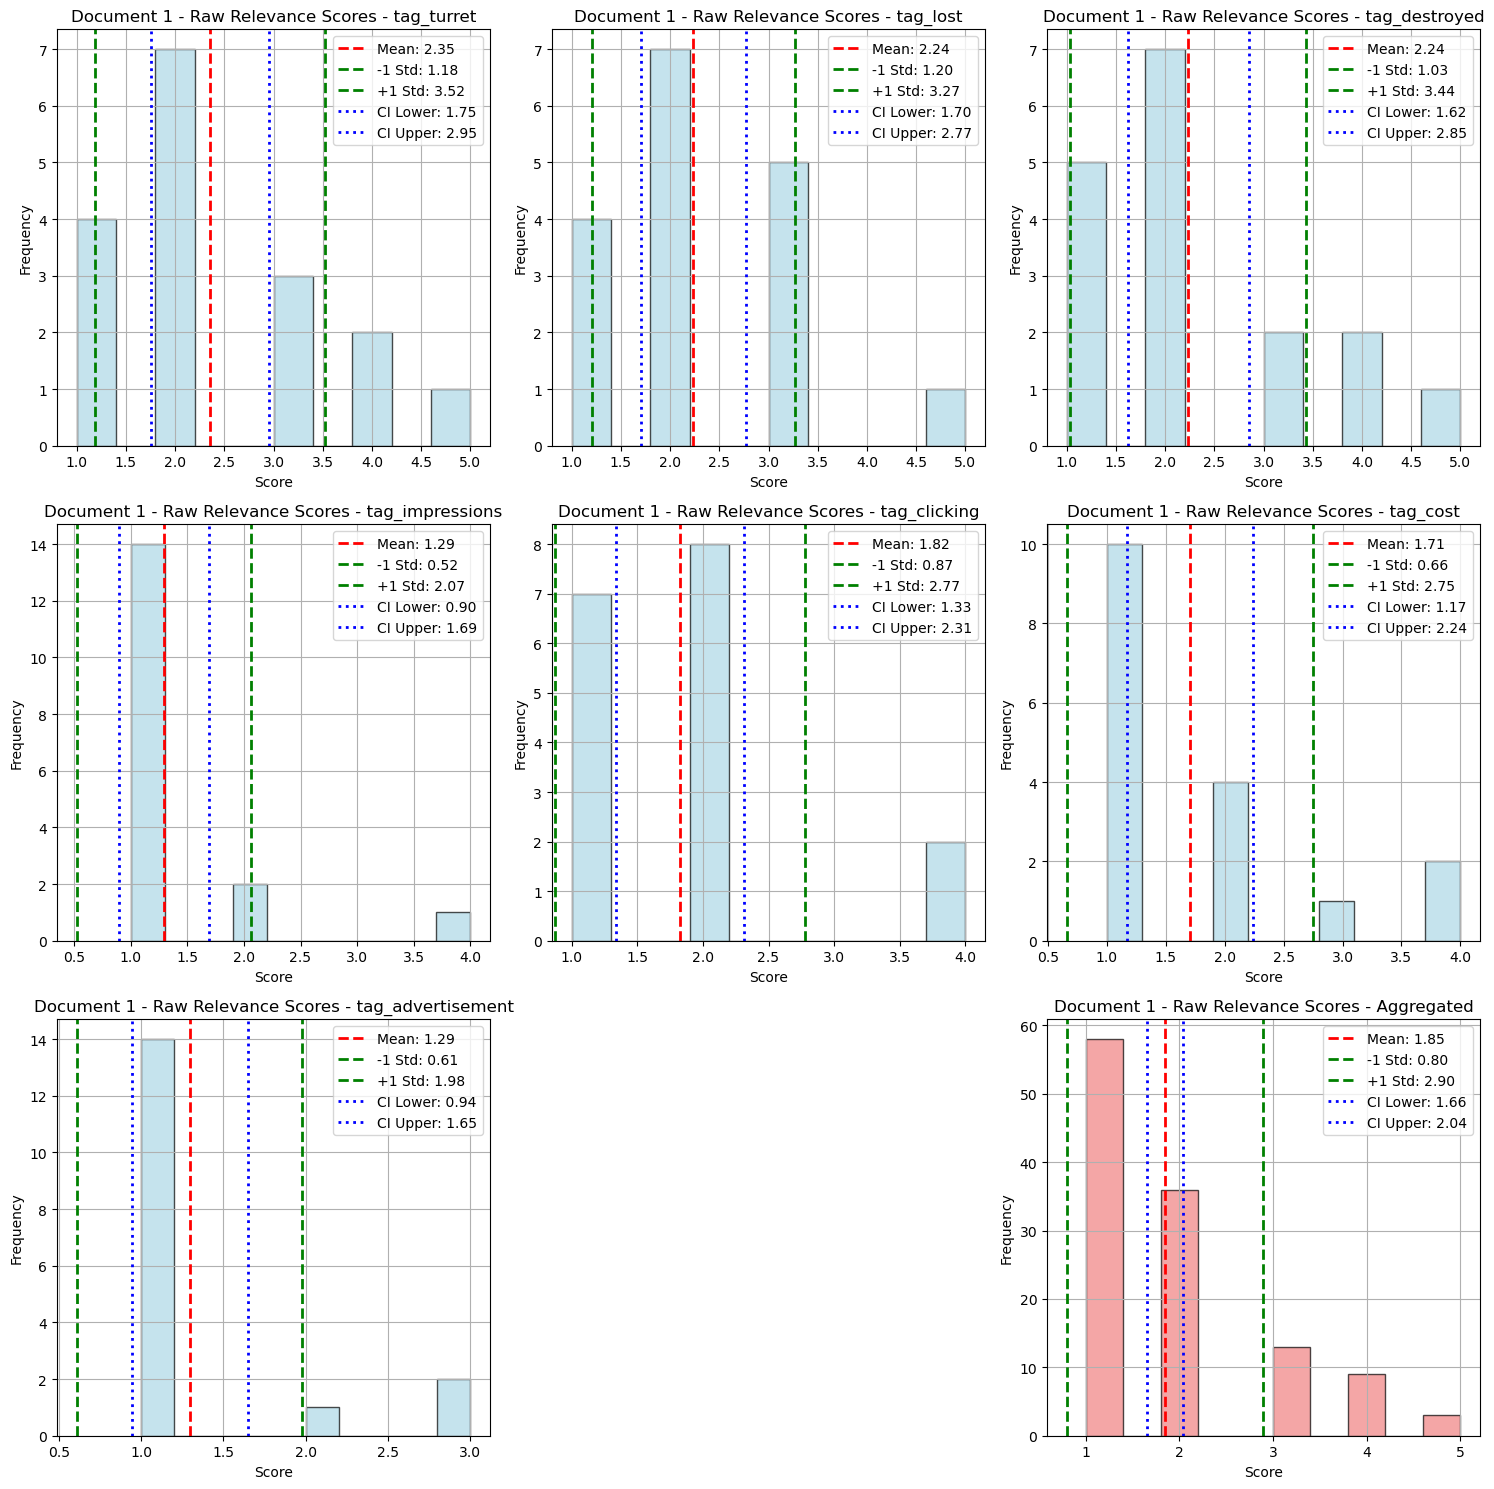

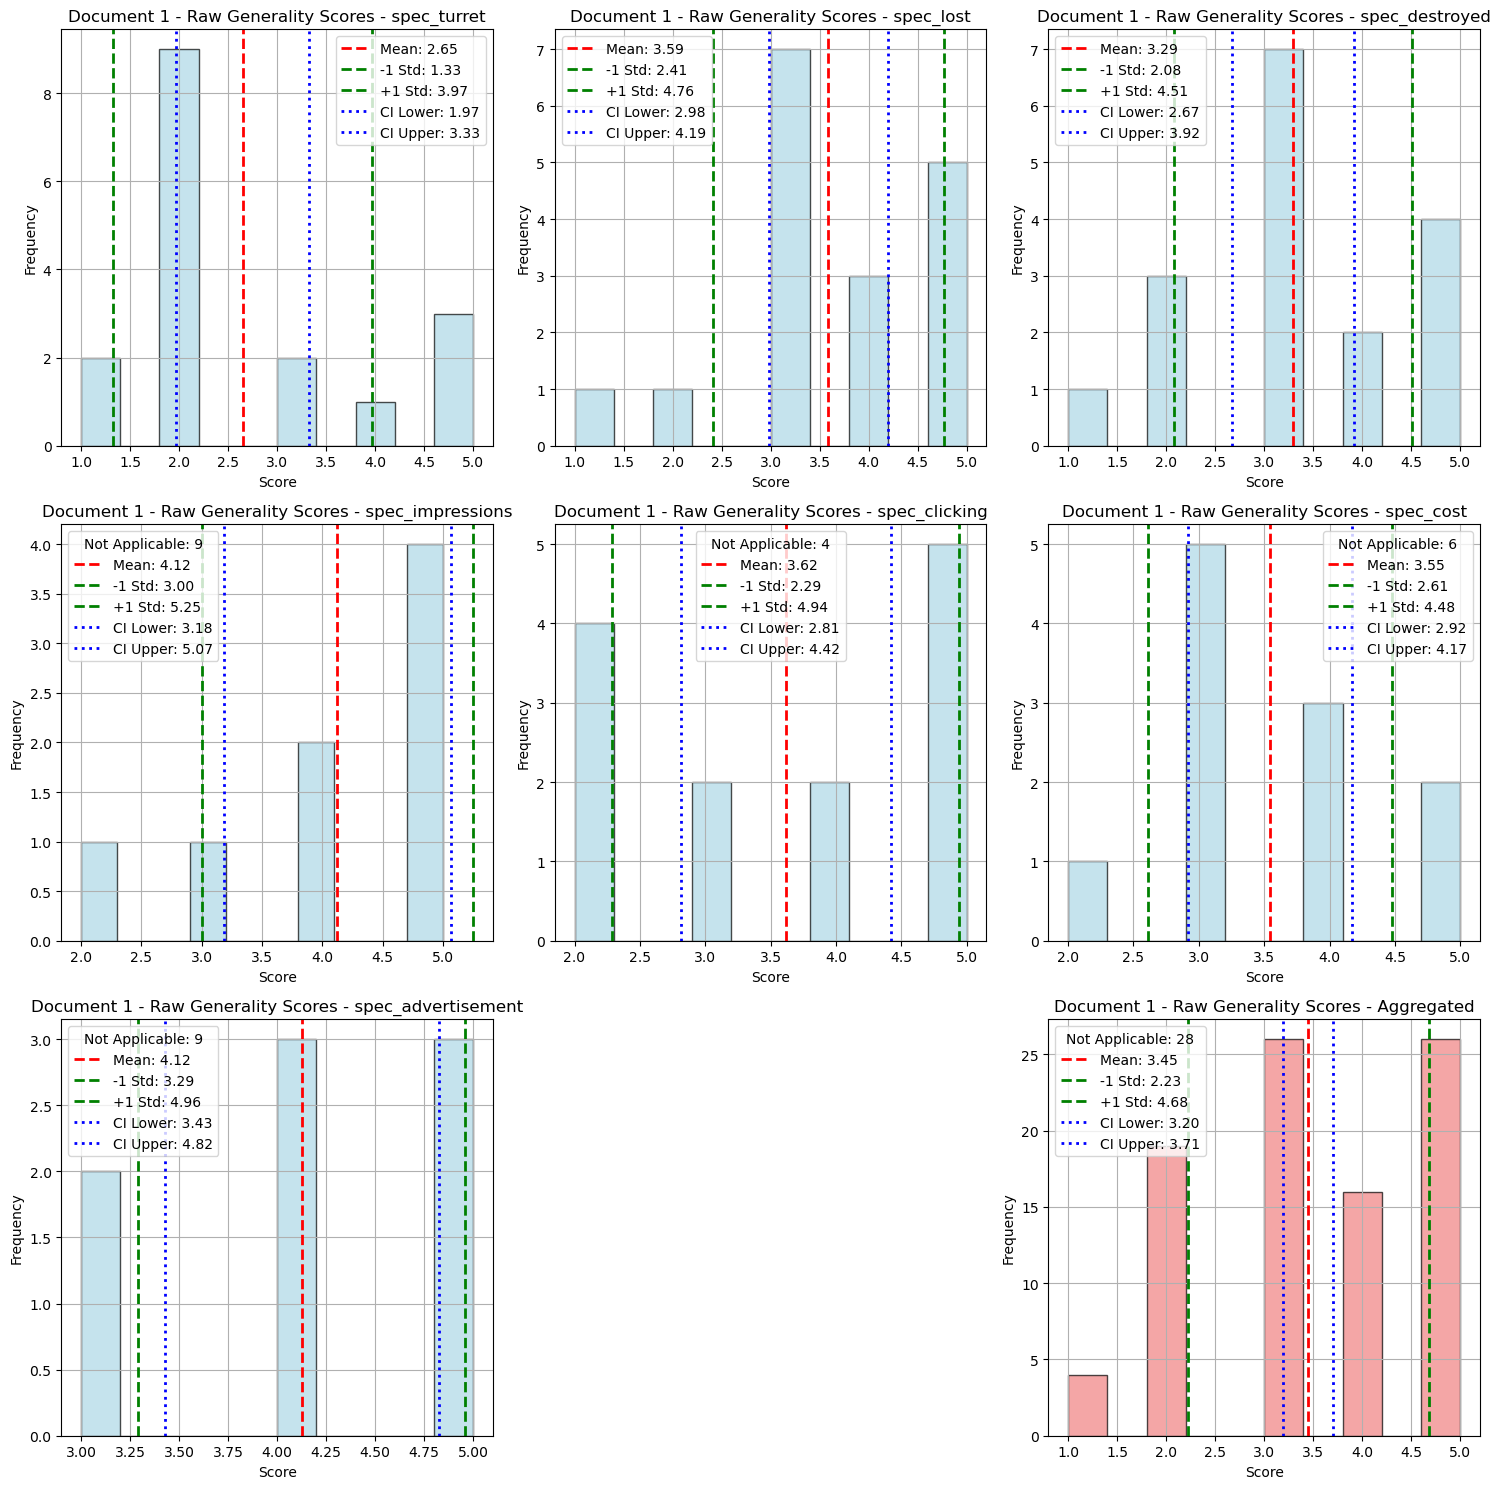

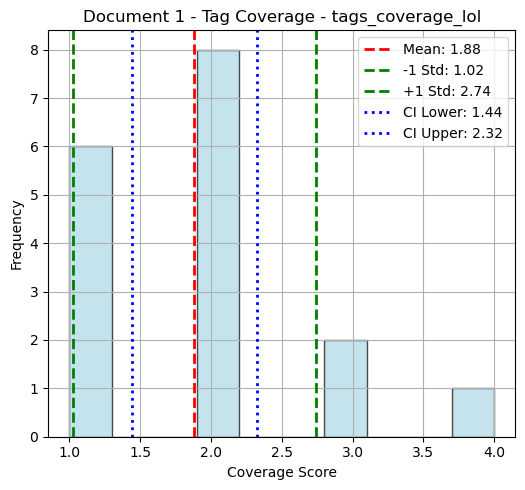

Correlation per Tag:
               Relevance vs Generality
turret                       -0.223160
lost                         -0.230561
destroyed                    -0.517201
impressions                  -0.619324
clicking                     -0.369011
cost                         -0.661538
advertisement                -0.501901

Overall Correlations:
         Relevance vs Generality
Overall                -0.473737


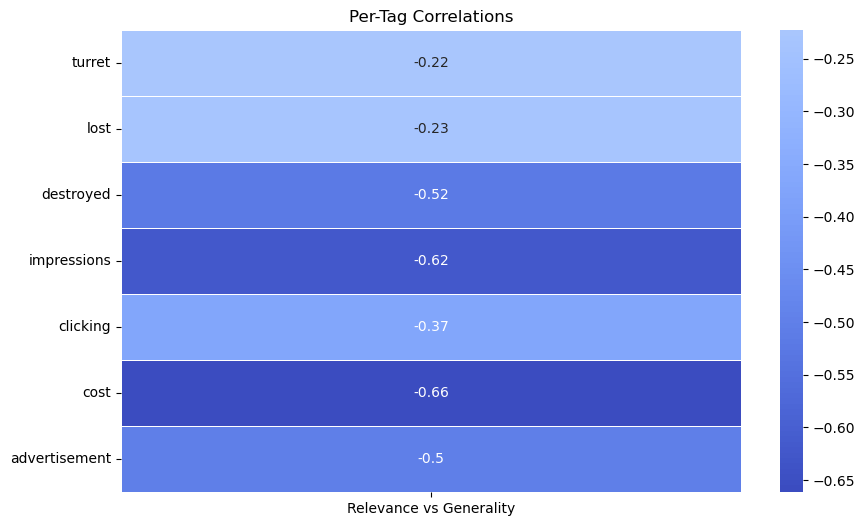

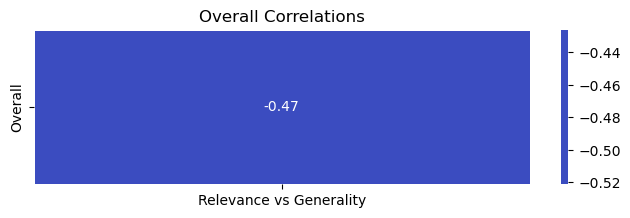


--- Analyzing Document 2 ---
Document 2 Relevance Distribution:
      tag_thyrotropin  tag_minute   tag_usd  tag_releasing  tag_high  \
std          0.562296    0.826936  1.114741       0.870260  1.212678   
min          1.000000    2.000000  2.000000       1.000000  1.000000   
max          3.000000    5.000000  5.000000       4.000000  5.000000   
mean         1.235294    3.058824  3.647059       1.588235  2.294118   

       tag_bid   tag_ask  
std   0.861770  0.951006  
min   2.000000  1.000000  
max   5.000000  4.000000  
mean  2.647059  2.176471  
Document 2 Generality Distribution:
      spec_thyrotropin  spec_minute  spec_usd  spec_releasing  spec_high  \
std                2.0     1.447615  1.300452        1.494434   1.276388   
min                1.0     1.000000  1.000000        2.000000   1.000000   
max                5.0     5.000000  5.000000        5.000000   5.000000   
mean               3.0     3.294118  2.764706        3.700000   3.812500   

      spec_bid  spec_a

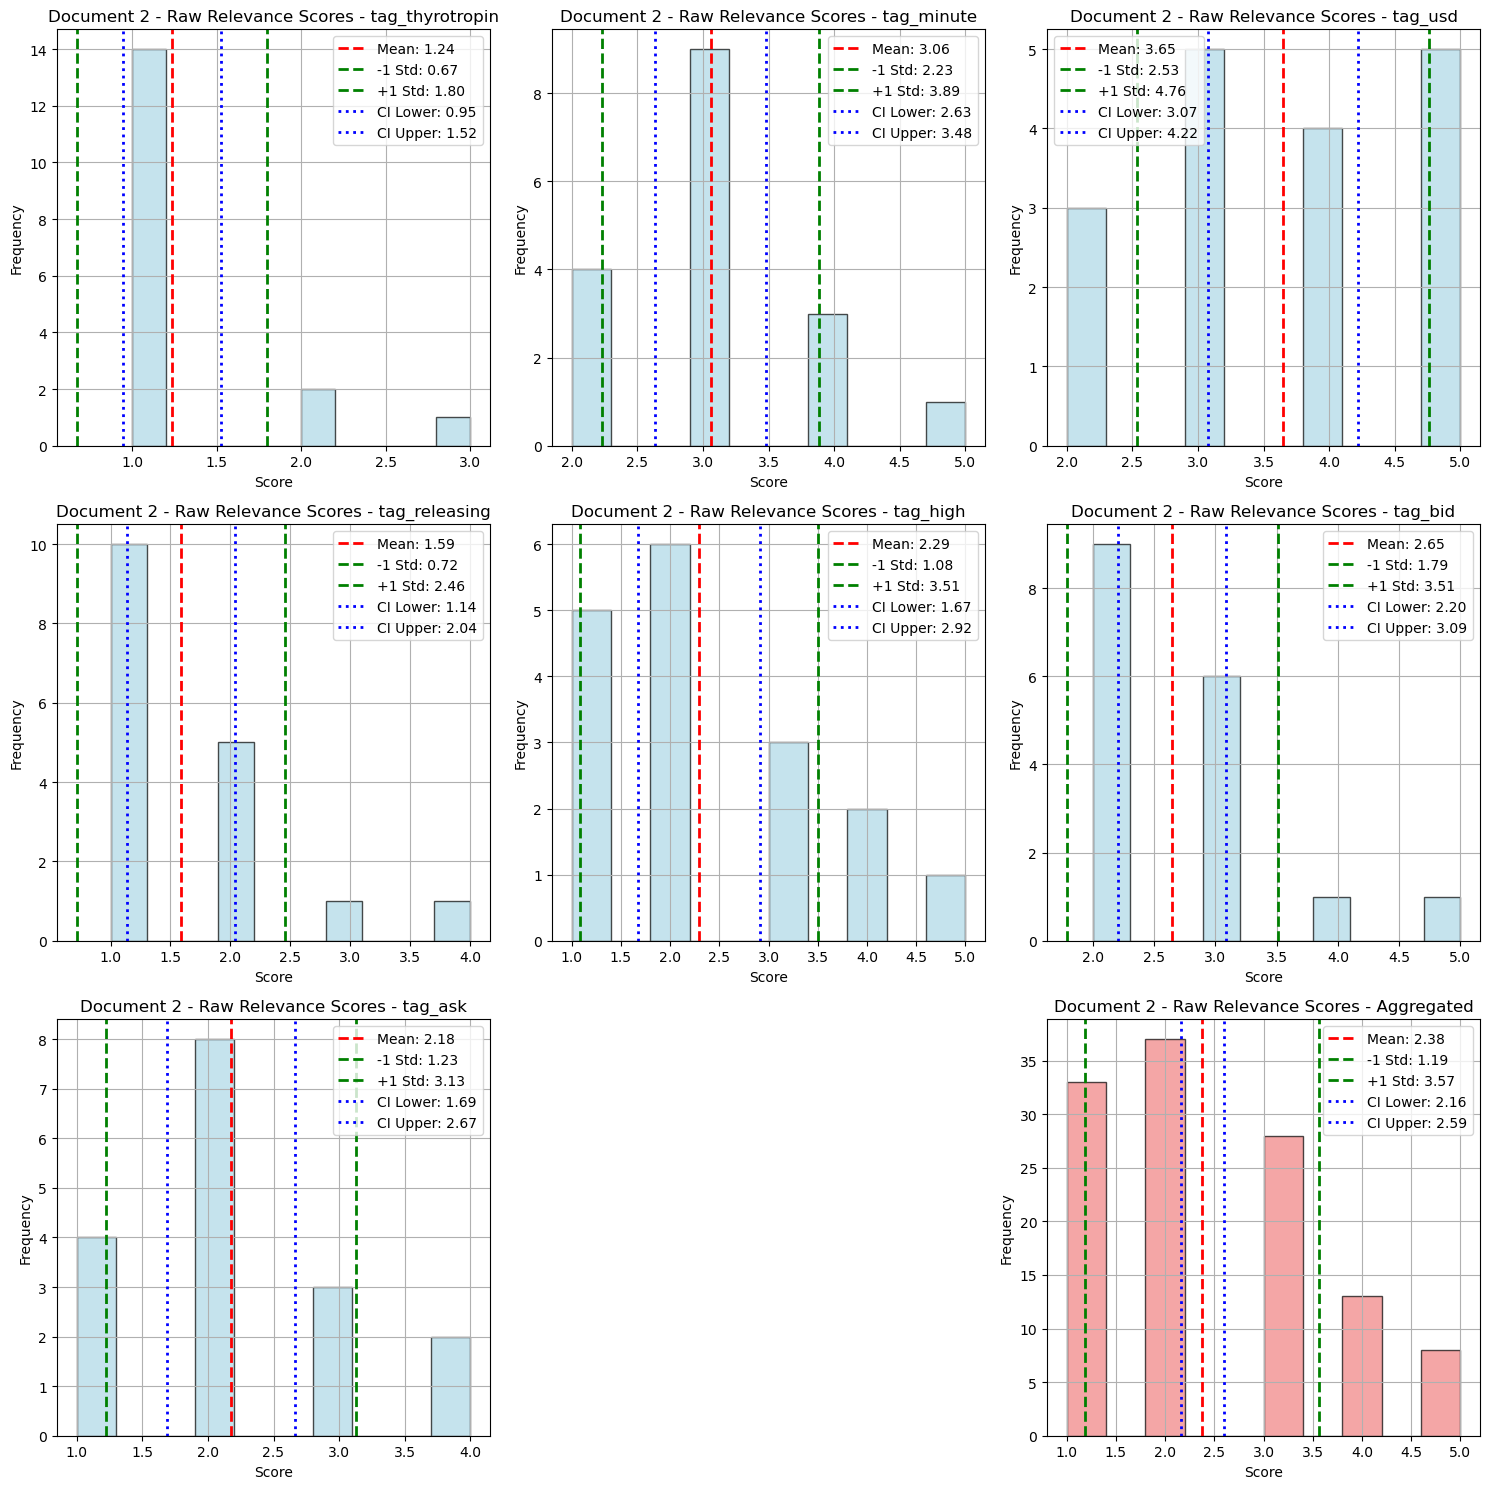

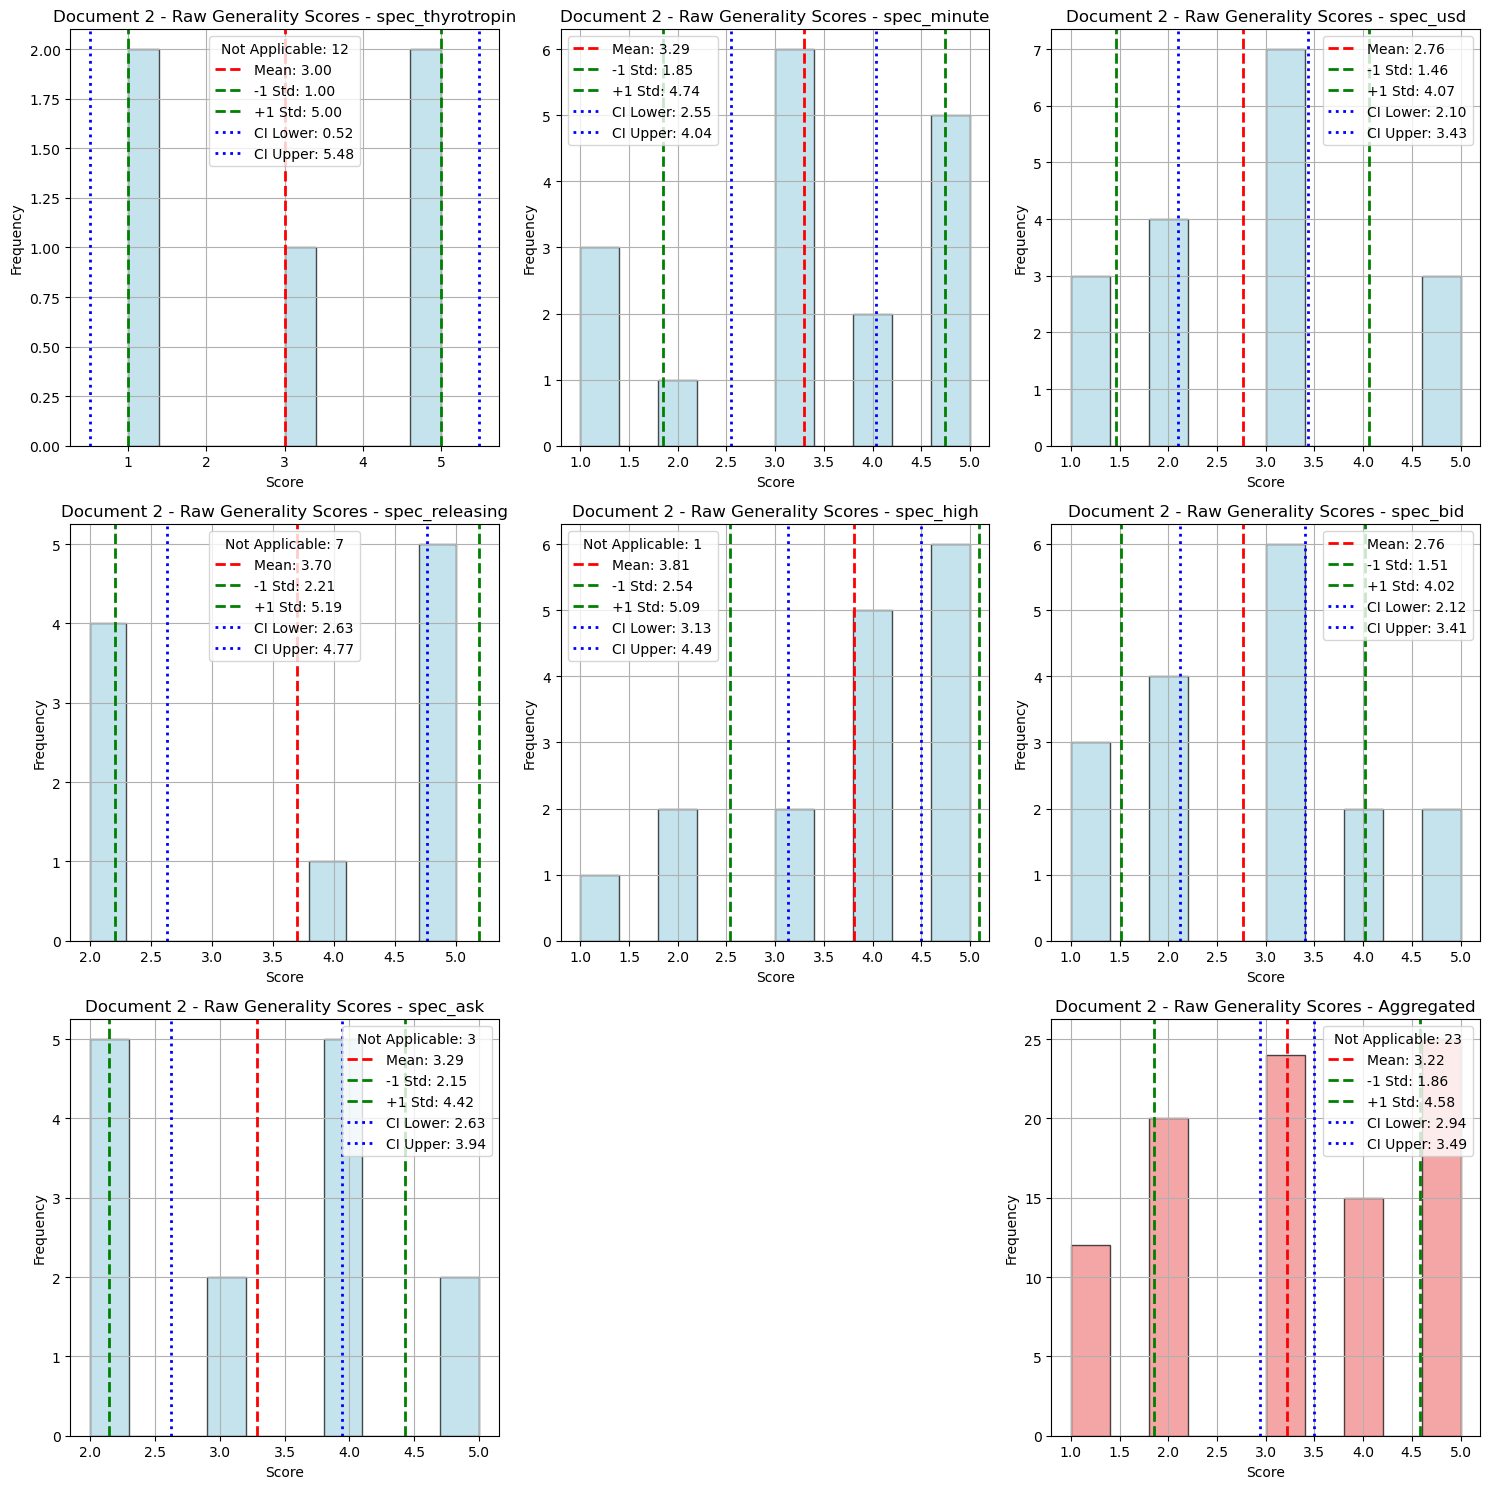

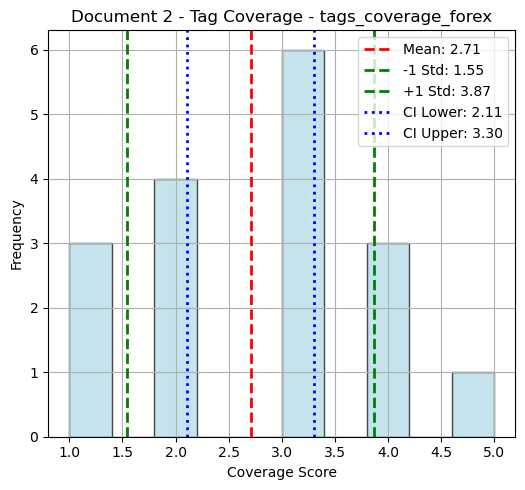

Correlation per Tag:
             Relevance vs Generality
thyrotropin                 0.000000
minute                     -0.422674
usd                        -0.416260
releasing                  -0.565351
high                       -0.585082
bid                        -0.568836
ask                        -0.612155

Overall Correlations:
         Relevance vs Generality
Overall                -0.574074


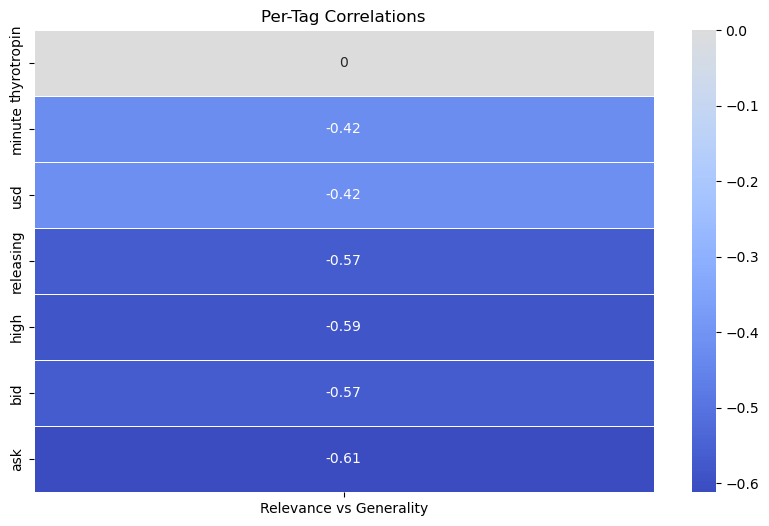

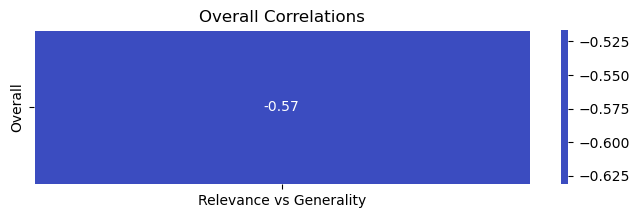


--- Analyzing Document 3 ---
Document 3 Relevance Distribution:
      tag_cancer  tag_microarray  tag_prostate  tag_ovarian  tag_gliomas  \
std     0.785905        1.447615      0.985184     0.795206     0.848875   
min     3.000000        1.000000      1.000000     1.000000     1.000000   
max     5.000000        5.000000      4.000000     4.000000     4.000000   
mean    4.352941        3.705882      1.705882     1.588235     1.705882   

      tag_lung  tag_genes  
std   0.899346   1.007326  
min   2.000000   1.000000  
max   5.000000   5.000000  
mean  4.058824   3.529412  
Document 3 Generality Distribution:
      spec_cancer  spec_microarray  spec_prostate  spec_ovarian  spec_gliomas  \
std      1.638238         1.152895       0.744024      0.744024      1.120065   
min      1.000000         1.000000       2.000000      2.000000      1.000000   
max      5.000000         4.000000       4.000000      4.000000      5.000000   
mean     3.058824         2.437500       2.625000     

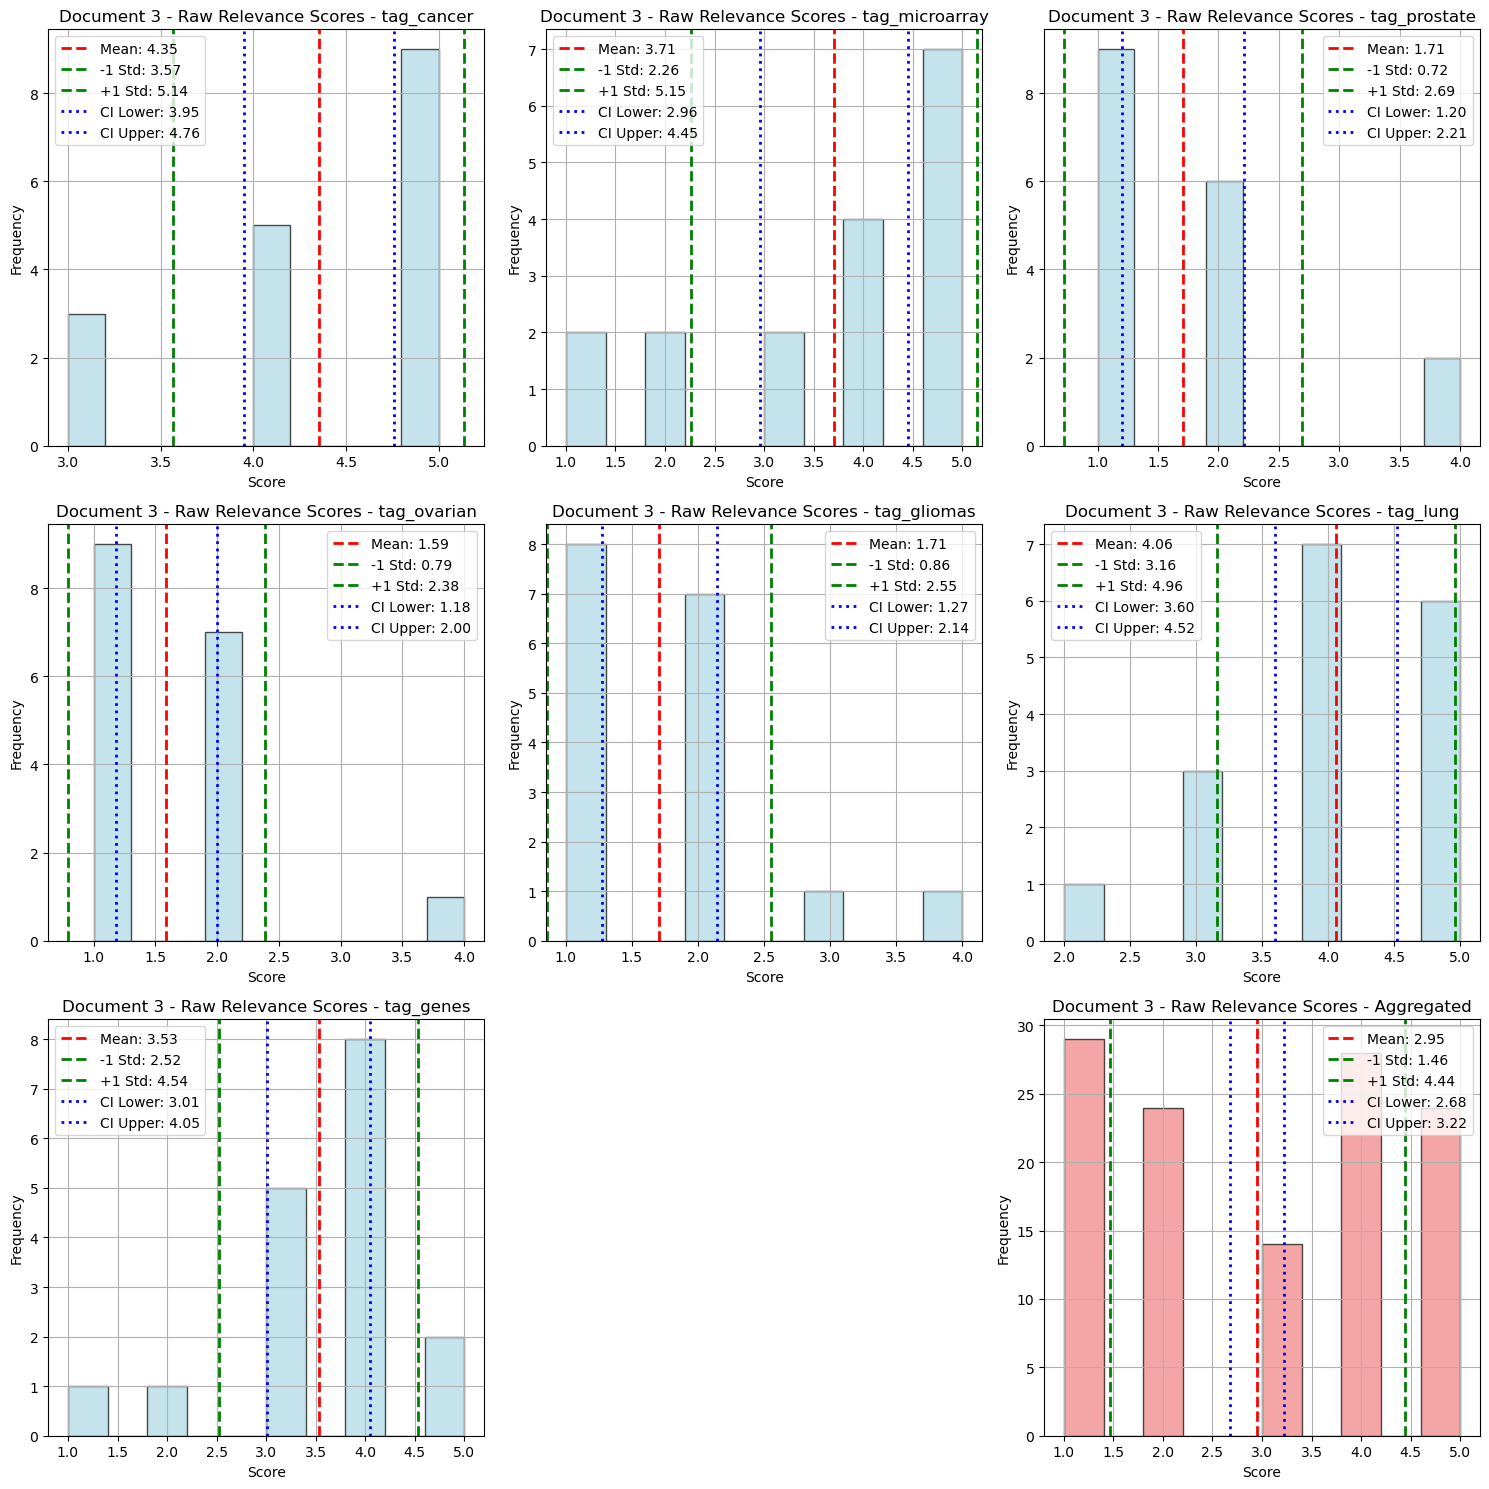

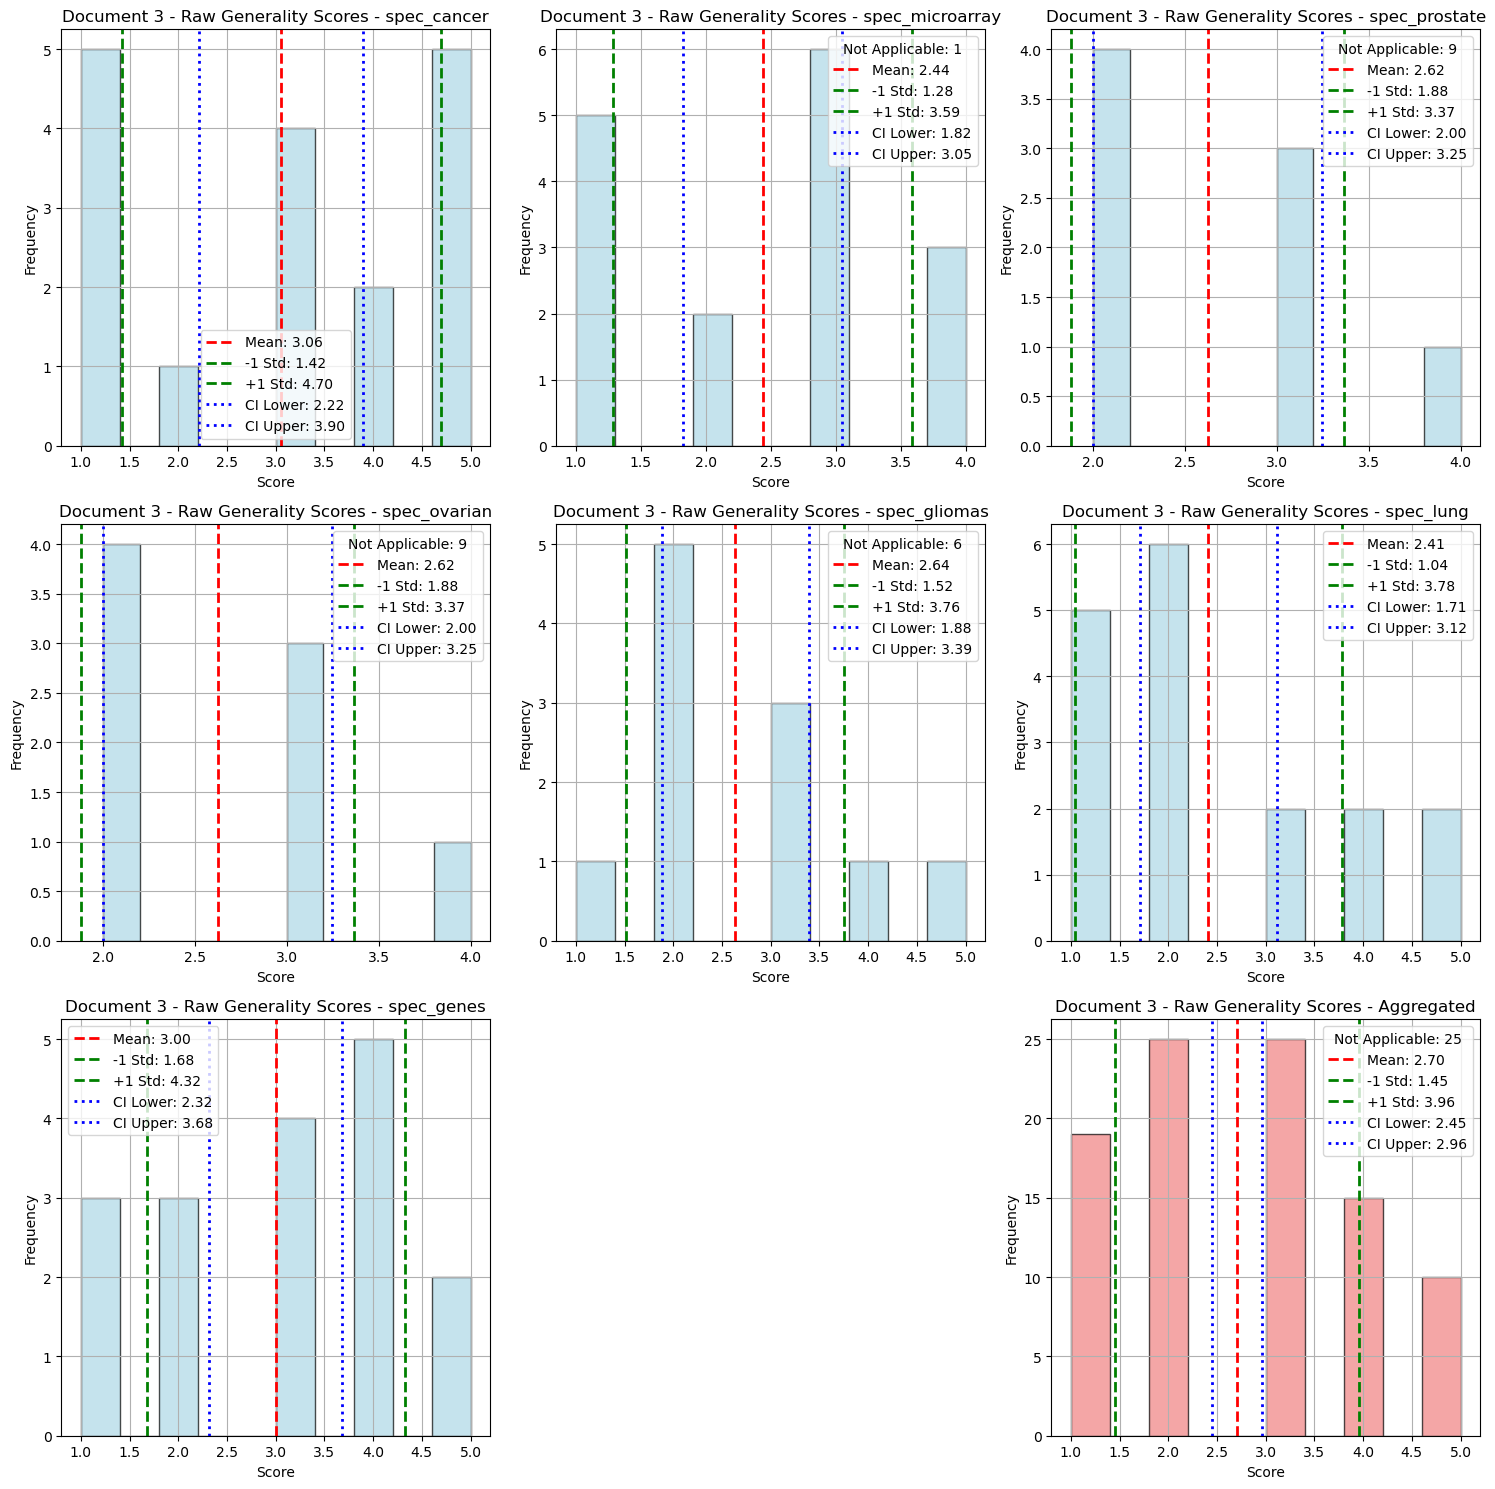

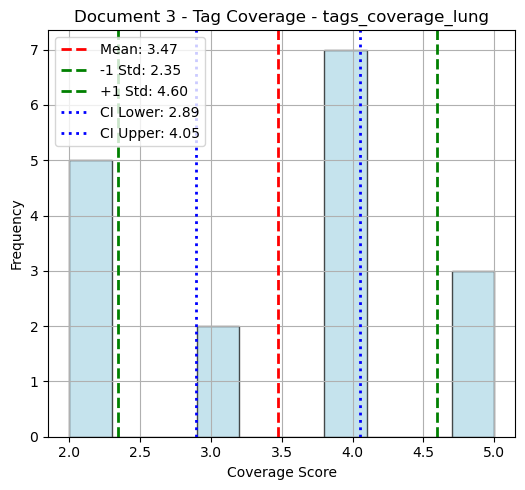

Correlation per Tag:
            Relevance vs Generality
cancer                     0.073920
microarray                -0.481341
prostate                  -0.552052
ovarian                   -0.361403
gliomas                   -0.486740
lung                      -0.304355
genes                     -0.513947

Overall Correlations:
         Relevance vs Generality
Overall                -0.409343


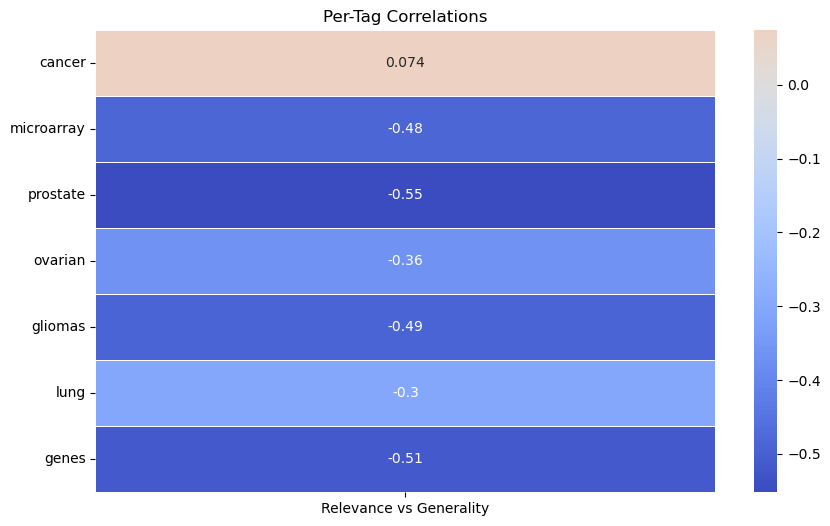

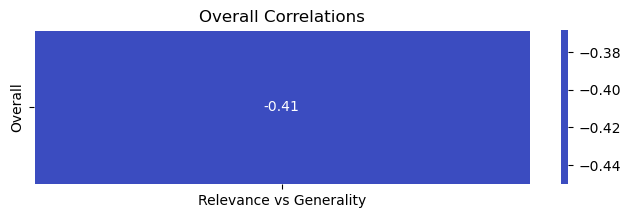

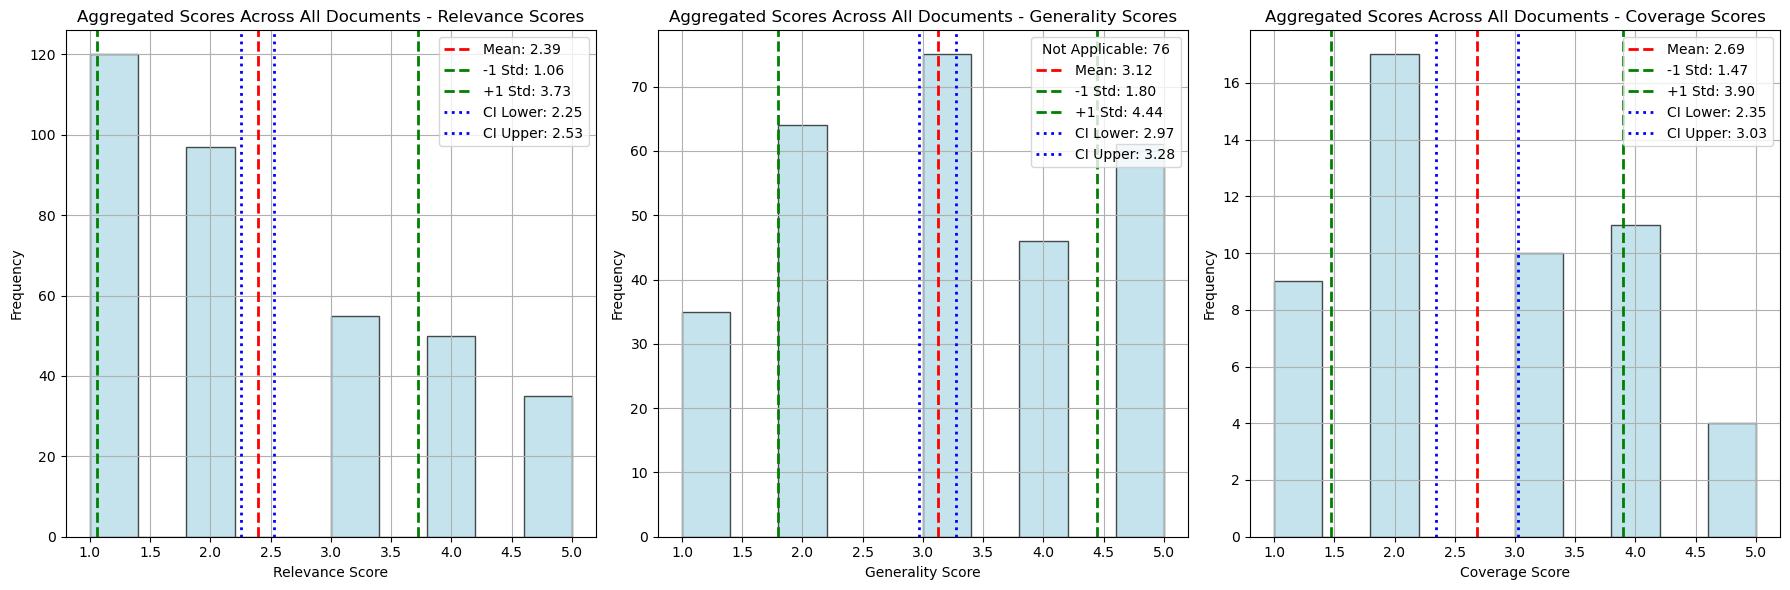


Aggregated Overall Correlations (pandas):
            Relevance  Generality
Relevance    1.000000   -0.423275
Generality  -0.423275    1.000000


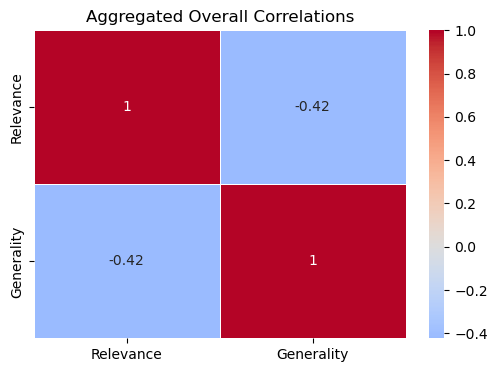

ICC for Relevance:


Type              Description       ICC          F  df1  df2  \
0   ICC1   Single raters absolute  0.479773  16.678036   20  336   
1   ICC2     Single random raters  0.485465  26.121354   20  320   
2   ICC3      Single fixed raters  0.596404  26.121354   20  320   
3  ICC1k  Average raters absolute  0.940041  16.678036   20  336   
4  ICC2k    Average random raters  0.941313  26.121354   20  320   
5  ICC3k     Average fixed raters  0.961717  26.121354   20  320   

           pval         CI95%  
0  3.756211e-39  [0.33, 0.67]  
1  1.920647e-55  [0.33, 0.68]  
2  1.920647e-55  [0.45, 0.76]  
3  3.756211e-39   [0.9, 0.97]  
4  1.920647e-55  [0.89, 0.97]  
5  1.920647e-55  [0.93, 0.98]


ICC for Generality:


Type              Description       ICC         F  df1  df2      pval  \
0   ICC1   Single raters absolute  0.016992  1.293852    8  144  0.251162   
1   ICC2     Single random raters  0.036743  2.004728    8  128  0.050824   
2   ICC3      Single fixed raters  0.055804  2.004728    8  128  0.050824   
3  ICC1k  Average raters absolute  0.227114  1.293852    8  144  0.251162   
4  ICC2k    Average random raters  0.393370  2.004728    8  128  0.050824   
5  ICC3k     Average fixed raters  0.501179  2.004728    8  128  0.050824   

           CI95%  
0  [-0.03, 0.18]  
1    [-0.0, 0.2]  
2  [-0.01, 0.28]  
3  [-0.76, 0.79]  
4  [-0.09, 0.81]  
5  [-0.14, 0.87]


ICC for Coverage:


Type              Description       ICC          F  df1  df2      pval  \
0   ICC1   Single raters absolute  0.336393   9.617582    2   48  0.000307   
1   ICC2     Single random raters  0.350000  20.739336    2   32  0.000002   
2   ICC3      Single fixed raters  0.537281  20.739336    2   32  0.000002   
3  ICC1k  Average raters absolute  0.896024   9.617582    2   48  0.000307   
4  ICC2k    Average random raters  0.901515  20.739336    2   32  0.000002   
5  ICC3k     Average fixed raters  0.951782  20.739336    2   32  0.000002   

          CI95%  
0  [0.08, 0.96]  
1   [0.1, 0.96]  
2  [0.19, 0.98]  
3   [0.59, 1.0]  
4   [0.65, 1.0]  
5    [0.8, 1.0]


ICC for Shared Coverage:


Type              Description       ICC         F  df1  df2      pval  \
0   ICC1   Single raters absolute  0.023270  1.405018    1   32  0.244613   
1   ICC2     Single random raters  0.051020  2.861314    1   16  0.110115   
2   ICC3      Single fixed raters  0.098684  2.861314    1   16  0.110115   
3  ICC1k  Average raters absolute  0.288265  1.405018    1   32  0.244613   
4  ICC2k    Average random raters  0.477528  2.861314    1   16  0.110115   
5  ICC3k     Average fixed raters  0.650510  2.861314    1   16  0.110115   

           CI95%  
0  [-0.05, 0.99]  
1  [-0.01, 0.99]  
2  [-0.03, 0.99]  
3   [-2.94, 1.0]  
4   [-0.31, 1.0]  
5   [-1.14, 1.0]


Fleiss' Kappa for Relevance: 0.1641
Fleiss' Kappa for Generality: 0.0084
Fleiss' Kappa for Coverage: 0.0345
Fleiss' Kappa for Shared Coverage: 0.0220

Krippendorff's Alpha for Relevance: 0.1589
Krippendorff's Alpha for Generality: 0.2986
Krippendorff's Alpha for Coverage: 0.2547
Krippendorff's Alpha for Shared Coverage: 0.4618


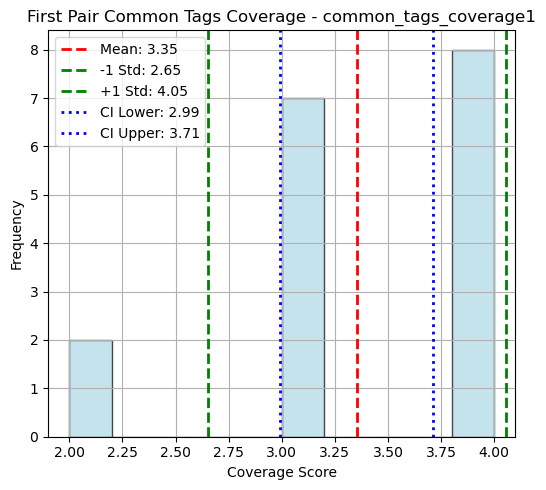

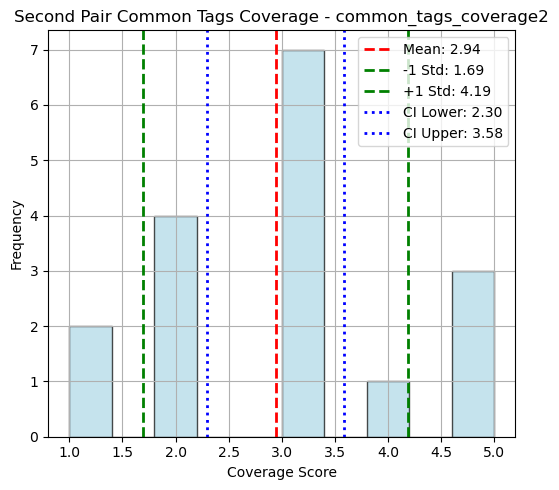


Metrics for First Pair Common Tags:
Accuracy: 0.70
Precision: 0.41
Recall: 0.49
Specificity: 0.77
F1-Score: 0.45

Metrics for Second Pair Common Tags:
Accuracy: 0.60
Precision: 1.00
Recall: 0.28
Specificity: 1.00
F1-Score: 0.44


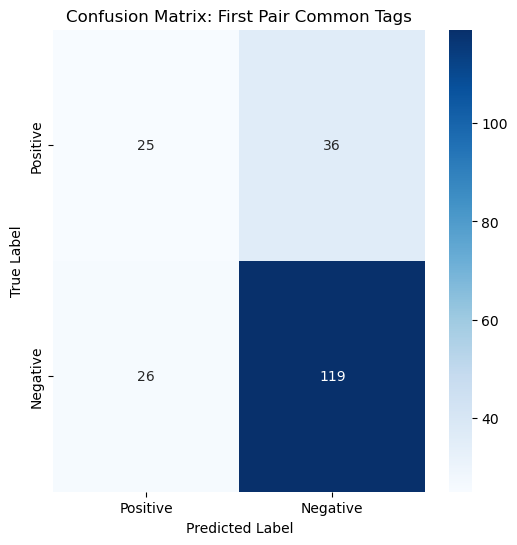

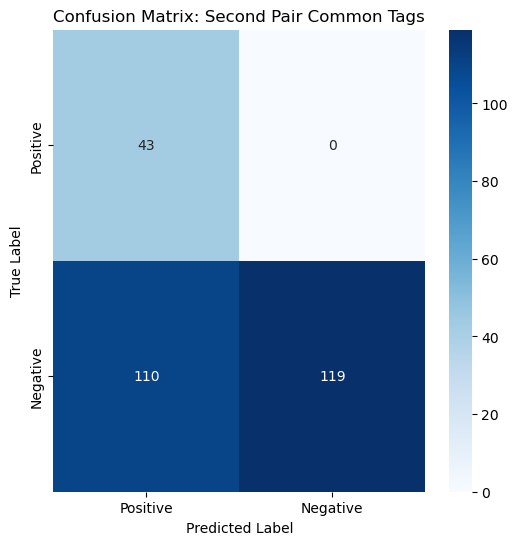

In [18]:
analyze_tags(
    df_baseline_generated,
    relevance_columns_list=[
        baseline_first_document_relevance_columns, 
        baseline_second_document_relevance_columns,
        baseline_third_document_relevance_columns
    ],
    spec_columns_list=[
        baseline_first_document_spec_columns, 
        baseline_second_document_spec_columns,
        baseline_third_document_spec_columns
    ],
    coverage_columns_list=[
        baseline_first_document_coverage_columns, 
        baseline_second_document_coverage_columns,
        baseline_third_document_coverage_columns
    ],
    suggested_columns_list=[
        baseline_first_document_suggested_columns,
        baseline_second_document_suggested_columns,
        baseline_third_document_suggested_columns
    ],
    common_tags_columns_1=baseline_first_pair_common_tags_columns,
    common_tags_true_tags_1=baseline_first_pair_common_tags_true_tags,
    common_tags_coverage_1=baseline_first_pair_coverage_columns,
    common_tags_columns_2=baseline_second_pair_common_tags_columns,
    common_tags_true_tags_2=baseline_second_pair_common_tags_true_tags,
    common_tags_coverage_2=baseline_second_pair_coverage_columns
)

In [19]:
df_human_generated.columns

Index(['timestamp', 'age_range', 'gender', 'education', 'english_prof',
       'lol_game_desc', 'tag_lol', 'tag_video_games', 'tag_multiplayer',
       'tag_game_data', 'tag_riot_api', 'tag_battle_arena', 'spec_lol',
       'spec_video_games', 'spec_multiplayer', 'spec_game_data',
       'spec_riot_api', 'spec_battle_arena', 'tags_coverage_lol',
       'suggested_tags_lol', 'forex_desc', 'tag_hist_price', 'tag_forex',
       'tag_usd_jpy', 'tag_currency_pairs', 'tag_yearly_data', 'tag_finance',
       'tag_minute_high', 'spec_hist_price', 'spec_forex', 'spec_usd_jpy',
       'spec_currency_pairs', 'spec_yearly_data', 'spec_finance',
       'spec_minute_high', 'tags_coverage_forex', 'suggested_tags_forex',
       'lung_cancer_desc', 'tag_lung_cancer', 'tag_cancer', 'tag_oncology',
       'tag_mrna_prof', 'tag_biology', 'tag_carcinomas', 'tag_gene_expr',
       'spec_lung_cancer', 'spec_cancer', 'spec_oncology', 'spec_mrna_prof',
       'spec_biology', 'spec_carcinomas', 'spec_gene_expr'

In [20]:
def calculate_stats(data, confidence_level=0.95):
    data = np.array(data)
    data = data[~np.isnan(data)]
    mean = data.mean()
    std = data.std()
    n = len(data)
    
    if n > 1:
        t_stat = t.ppf((1 + confidence_level) / 2., n - 1)
        margin_of_error = t_stat * (std / np.sqrt(n))
        ci_lower = mean - margin_of_error
        ci_upper = mean + margin_of_error
    else:
        ci_lower, ci_upper = mean, mean
    
    return mean, std, ci_lower, ci_upper

def plot_relevance_specificity_multiple_documents(df, doc_relevance_columns_list, doc_spec_columns_list, doc_tag_types_list, document_names):
    """
    This function plots relevance and specificity by tag type (regular and overarching) for multiple documents.
    It also accumulates data for all documents and plots the cumulative result at the end.
    """
    
    cumulative_data = {
        'regular_relevance': [],
        'overarching_relevance': [],
        'regular_spec': [],
        'overarching_spec': []
    }
    
    for i, (relevance_columns, spec_columns, tag_types, document_name) in enumerate(zip(doc_relevance_columns_list, doc_spec_columns_list, doc_tag_types_list, document_names)):
        
        columns_to_preprocess = relevance_columns + spec_columns
        df = preprocess_numerical_columns(df, columns_to_preprocess)
        
        regular_relevance_cols = tag_types['regular']
        overarching_relevance_cols = tag_types['overarching']

        regular_spec_cols = [spec_columns[relevance_columns.index(col)] for col in regular_relevance_cols]
        overarching_spec_cols = [spec_columns[relevance_columns.index(col)] for col in overarching_relevance_cols]

        regular_relevance = df[regular_relevance_cols].values.flatten()
        overarching_relevance = df[overarching_relevance_cols].values.flatten()

        regular_spec = df[regular_spec_cols].values.flatten()
        overarching_spec = df[overarching_spec_cols].values.flatten()

        cumulative_data['regular_relevance'].extend(regular_relevance)
        cumulative_data['overarching_relevance'].extend(overarching_relevance)
        cumulative_data['regular_spec'].extend(regular_spec)
        cumulative_data['overarching_spec'].extend(overarching_spec)

        # Calculate stats for relevance
        reg_mean_rel, reg_std_rel, reg_ci_lower_rel, reg_ci_upper_rel = calculate_stats(regular_relevance)
        over_mean_rel, over_std_rel, over_ci_lower_rel, over_ci_upper_rel = calculate_stats(overarching_relevance)

        # Calculate stats for specificity
        reg_mean_spec, reg_std_spec, reg_ci_lower_spec, reg_ci_upper_spec = calculate_stats(regular_spec)
        over_mean_spec, over_std_spec, over_ci_lower_spec, over_ci_upper_spec = calculate_stats(overarching_spec)

        # Plotting Relevance
        fig, axs = plt.subplots(1, 2, figsize=(14, 6))
        
        # Relevance Plot
        axs[0].hist(regular_relevance, bins=10, color='lightblue', edgecolor='black', alpha=0.7, label='Regular Tags')
        axs[0].hist(overarching_relevance, bins=10, color='lightcoral', edgecolor='black', alpha=0.7, label='Overarching Tags')
        axs[0].set_title(f'{document_name} - Relevance Scores by Tag Type')
        axs[0].set_xlabel('Relevance Score')
        axs[0].set_ylabel('Frequency')
        axs[0].legend()

        # Plot mean and CI for Relevance
        axs[0].axvline(reg_mean_rel, color='blue', linestyle='dashed', linewidth=2, label=f'Regular Mean: {reg_mean_rel:.2f}')
        axs[0].axvline(over_mean_rel, color='red', linestyle='dashed', linewidth=2, label=f'Overarching Mean: {over_mean_rel:.2f}')
        axs[0].axvline(reg_ci_lower_rel, color='blue', linestyle='dotted', linewidth=2, label=f'Regular CI Lower: {reg_ci_lower_rel:.2f}')
        axs[0].axvline(reg_ci_upper_rel, color='blue', linestyle='dotted', linewidth=2, label=f'Regular CI Upper: {reg_ci_upper_rel:.2f}')
        axs[0].axvline(over_ci_lower_rel, color='red', linestyle='dotted', linewidth=2, label=f'Overarching CI Lower: {over_ci_lower_rel:.2f}')
        axs[0].axvline(over_ci_upper_rel, color='red', linestyle='dotted', linewidth=2, label=f'Overarching CI Upper: {over_ci_upper_rel:.2f}')
        
        axs[0].legend()

        # Generality Plot
        axs[1].hist(regular_spec, bins=10, color='lightblue', edgecolor='black', alpha=0.7, label='Regular Tags')
        axs[1].hist(overarching_spec, bins=10, color='lightcoral', edgecolor='black', alpha=0.7, label='Overarching Tags')
        axs[1].set_title(f'{document_name} - Generality Scores by Tag Type')
        axs[1].set_xlabel('Generality Score')
        axs[1].set_ylabel('Frequency')
        axs[1].legend()

        # Plot mean and CI for Generality
        axs[1].axvline(reg_mean_spec, color='blue', linestyle='dashed', linewidth=2, label=f'Regular Mean: {reg_mean_spec:.2f}')
        axs[1].axvline(over_mean_spec, color='red', linestyle='dashed', linewidth=2, label=f'Overarching Mean: {over_mean_spec:.2f}')
        axs[1].axvline(reg_ci_lower_spec, color='blue', linestyle='dotted', linewidth=2, label=f'Regular CI Lower: {reg_ci_lower_spec:.2f}')
        axs[1].axvline(reg_ci_upper_spec, color='blue', linestyle='dotted', linewidth=2, label=f'Regular CI Upper: {reg_ci_upper_spec:.2f}')
        axs[1].axvline(over_ci_lower_spec, color='red', linestyle='dotted', linewidth=2, label=f'Overarching CI Lower: {over_ci_lower_spec:.2f}')
        axs[1].axvline(over_ci_upper_spec, color='red', linestyle='dotted', linewidth=2, label=f'Overarching CI Upper: {over_ci_upper_spec:.2f}')
        
        axs[1].legend()

        plt.tight_layout()
        plt.show()

    plot_cumulative_relevance_specificity(cumulative_data)

def plot_cumulative_relevance_specificity(cumulative_data):
    """
    This function plots the cumulative relevance and specificity scores for all documents combined.
    """
    
    # Calculate cumulative stats for relevance
    reg_mean_rel, reg_std_rel, reg_ci_lower_rel, reg_ci_upper_rel = calculate_stats(cumulative_data['regular_relevance'])
    over_mean_rel, over_std_rel, over_ci_lower_rel, over_ci_upper_rel = calculate_stats(cumulative_data['overarching_relevance'])

    # Calculate cumulative stats for specificity
    reg_mean_spec, reg_std_spec, reg_ci_lower_spec, reg_ci_upper_spec = calculate_stats(cumulative_data['regular_spec'])
    over_mean_spec, over_std_spec, over_ci_lower_spec, over_ci_upper_spec = calculate_stats(cumulative_data['overarching_spec'])

    fig, axs = plt.subplots(1, 2, figsize=(14, 6))
    
    # Cumulative Relevance Plot
    axs[0].hist(cumulative_data['regular_relevance'], bins=10, color='lightblue', edgecolor='black', alpha=0.7, label='Regular Tags')
    axs[0].hist(cumulative_data['overarching_relevance'], bins=10, color='lightcoral', edgecolor='black', alpha=0.7, label='Overarching Tags')
    axs[0].set_title(f'Cumulative - Relevance Scores by Tag Type')
    axs[0].set_xlabel('Relevance Score')
    axs[0].set_ylabel('Frequency')
    axs[0].legend()

    # Plot mean and CI for cumulative Relevance
    axs[0].axvline(reg_mean_rel, color='blue', linestyle='dashed', linewidth=2, label=f'Regular Mean: {reg_mean_rel:.2f}')
    axs[0].axvline(over_mean_rel, color='red', linestyle='dashed', linewidth=2, label=f'Overarching Mean: {over_mean_rel:.2f}')
    axs[0].axvline(reg_ci_lower_rel, color='blue', linestyle='dotted', linewidth=2, label=f'Regular CI Lower: {reg_ci_lower_rel:.2f}')
    axs[0].axvline(reg_ci_upper_rel, color='blue', linestyle='dotted', linewidth=2, label=f'Regular CI Upper: {reg_ci_upper_rel:.2f}')
    axs[0].axvline(over_ci_lower_rel, color='red', linestyle='dotted', linewidth=2, label=f'Overarching CI Lower: {over_ci_lower_rel:.2f}')
    axs[0].axvline(over_ci_upper_rel, color='red', linestyle='dotted', linewidth=2, label=f'Overarching CI Upper: {over_ci_upper_rel:.2f}')
    
    axs[0].legend()

    # Cumulative Generality Plot
    axs[1].hist(cumulative_data['regular_spec'], bins=10, color='lightblue', edgecolor='black', alpha=0.7, label='Regular Tags')
    axs[1].hist(cumulative_data['overarching_spec'], bins=10, color='lightcoral', edgecolor='black', alpha=0.7, label='Overarching Tags')
    axs[1].set_title(f'Cumulative - Generality Scores by Tag Type')
    axs[1].set_xlabel('Generality Score')
    axs[1].set_ylabel('Frequency')
    axs[1].legend()

    # Plot mean and CI for cumulative Generality
    axs[1].axvline(reg_mean_spec, color='blue', linestyle='dashed', linewidth=2, label=f'Regular Mean: {reg_mean_spec:.2f}')
    axs[1].axvline(over_mean_spec, color='red', linestyle='dashed', linewidth=2, label=f'Overarching Mean: {over_mean_spec:.2f}')
    axs[1].axvline(reg_ci_lower_spec, color='blue', linestyle='dotted', linewidth=2, label=f'Regular CI Lower: {reg_ci_lower_spec:.2f}')
    axs[1].axvline(reg_ci_upper_spec, color='blue', linestyle='dotted', linewidth=2, label=f'Regular CI Upper: {reg_ci_upper_spec:.2f}')
    axs[1].axvline(over_ci_lower_spec, color='red', linestyle='dotted', linewidth=2, label=f'Overarching CI Lower: {over_ci_lower_spec:.2f}')
    axs[1].axvline(over_ci_upper_spec, color='red', linestyle='dotted', linewidth=2, label=f'Overarching CI Upper: {over_ci_upper_spec:.2f}')
    
    axs[1].legend()

    plt.tight_layout()
    plt.show()

In [21]:
human_first_document_relevance_columns = ['tag_lol', 'tag_video_games', 'tag_multiplayer', 'tag_game_data', 'tag_riot_api', 'tag_battle_arena']
human_first_document_spec_columns = ['spec_lol', 'spec_video_games', 'spec_multiplayer', 'spec_game_data', 'spec_riot_api', 'spec_battle_arena']
human_first_document_coverage_columns = ['tags_coverage_lol']
human_first_document_suggested_columns = ['suggested_tags_lol']
human_first_document_tag_types = {
    'regular': ['tag_lol', 'tag_multiplayer', 'tag_game_data', 'tag_riot_api', 'tag_battle_arena'],
    'overarching': ['tag_video_games']
}

human_second_document_relevance_columns = ['tag_hist_price', 'tag_forex', 'tag_usd_jpy', 'tag_currency_pairs', 'tag_yearly_data', 'tag_finance', 'tag_minute_high']
human_second_document_spec_columns = ['spec_hist_price', 'spec_forex', 'spec_usd_jpy', 'spec_currency_pairs', 'spec_yearly_data', 'spec_finance', 'spec_minute_high']
human_second_document_coverage_columns = ['tags_coverage_forex']
human_second_document_suggested_columns = ['suggested_tags_forex']
human_second_document_tag_types = {
    'regular': ['tag_hist_price', 'tag_usd_jpy', 'tag_yearly_data', 'tag_minute_high'],
    'overarching': ['tag_forex', 'tag_currency_pairs', 'tag_finance']
}

human_third_document_relevance_columns = ['tag_lung_cancer', 'tag_cancer', 'tag_oncology', 'tag_mrna_prof', 'tag_biology', 'tag_carcinomas', 'tag_gene_expr']
human_third_document_spec_columns = ['spec_lung_cancer', 'spec_cancer', 'spec_oncology', 'spec_mrna_prof', 'spec_biology', 'spec_carcinomas', 'spec_gene_expr']
human_third_document_coverage_columns = ['tags_coverage_lung']
human_third_document_suggested_columns = ['suggested_tags_lung']
human_third_document_tag_types = {
    'regular': ['tag_lung_cancer', 'tag_mrna_prof', 'tag_carcinomas', 'tag_gene_expr'],
    'overarching': ['tag_cancer', 'tag_oncology', 'tag_biology']
}

human_first_pair_common_tags_columns = ['common_tags1']
human_first_pair_common_tags_true_tags = ["Coronavirus", "Covid-19", "Health", "Public Health", "Epidemiology"]
human_first_pair_coverage_columns = ['common_tags_coverage1']

human_second_pair_common_tags_columns = ['common_tags2']
human_second_pair_common_tags_true_tags = ["Movies", "IMDb", "Film Information"]
human_second_pair_coverage_columns = ['common_tags_coverage2']


--- Analyzing Document 1 ---
Document 1 Relevance Distribution:
       tag_lol  tag_video_games  tag_multiplayer  tag_game_data  tag_riot_api  \
std   0.718795         1.154701         0.981071       0.774597      1.032796   
min   3.000000         2.000000         2.000000       3.000000      2.000000   
max   5.000000         5.000000         5.000000       5.000000      5.000000   
mean  4.625000         4.000000         3.812500       4.250000      4.000000   

      tag_battle_arena  
std           1.087811  
min           1.000000  
max           5.000000  
mean          3.125000  
Document 1 Generality Distribution:
      spec_lol  spec_video_games  spec_multiplayer  spec_game_data  \
std   0.813941          0.861892          0.961150        0.885061   
min   1.000000          3.000000          2.000000        2.000000   
max   3.000000          5.000000          5.000000        5.000000   
mean  1.562500          4.200000          3.733333        2.875000   

      spec_riot_a

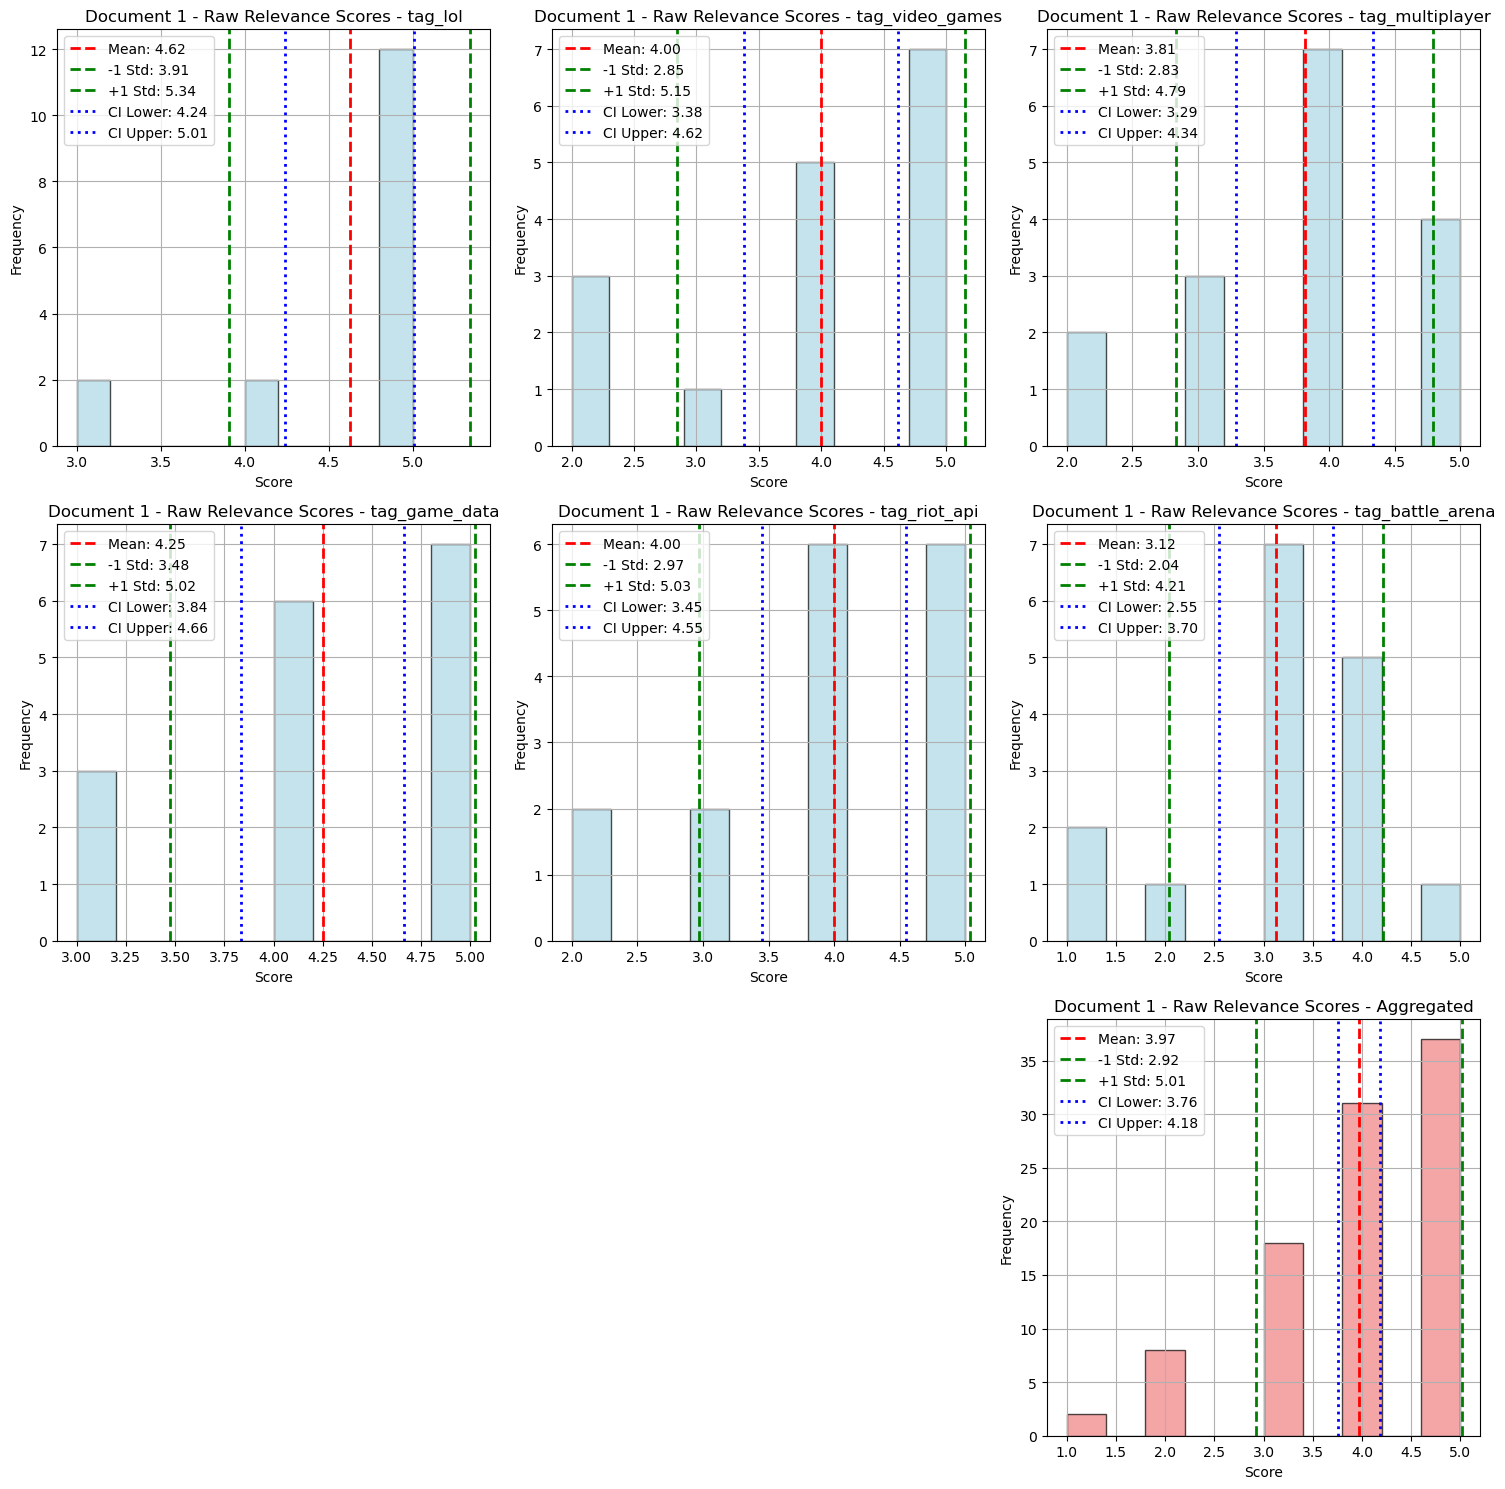

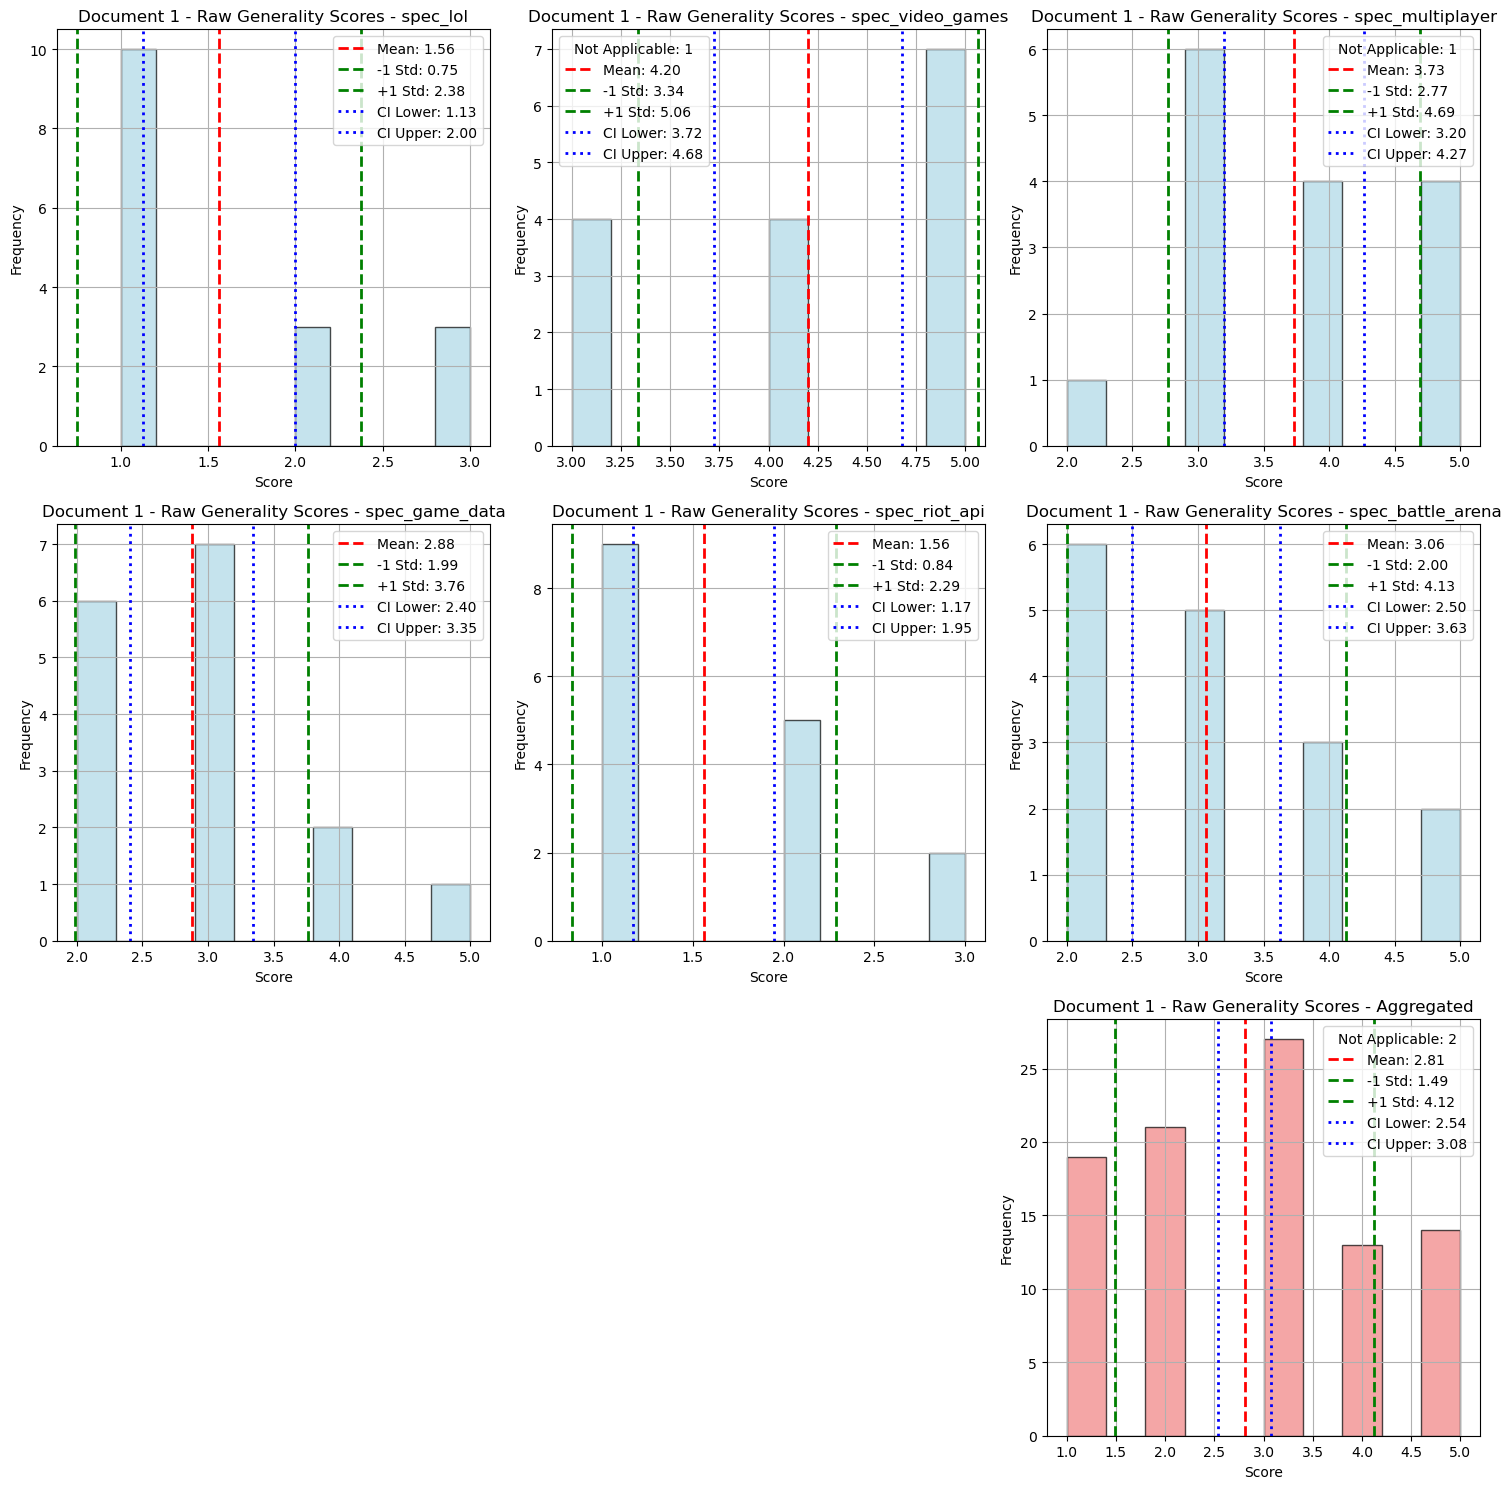

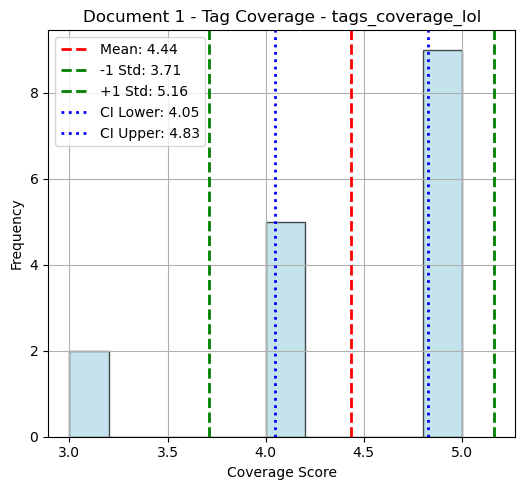

Correlation per Tag:
             Relevance vs Generality
lol                         0.226555
video                       0.483971
multiplayer                -0.014072
game                        0.307759
riot                       -0.122279
battle                     -0.373707

Overall Correlations:
         Relevance vs Generality
Overall                 0.344103


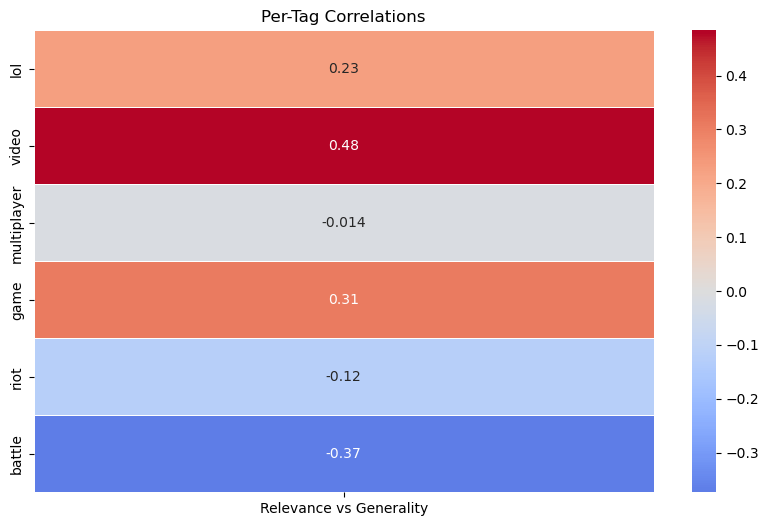

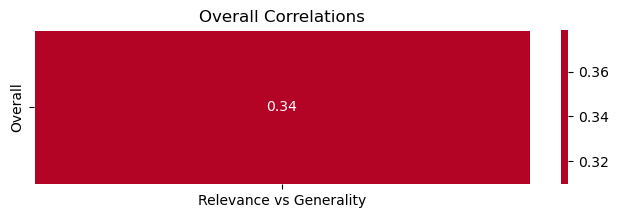


--- Analyzing Document 2 ---
Document 2 Relevance Distribution:
      tag_hist_price  tag_forex  tag_usd_jpy  tag_currency_pairs  \
std         0.981071     0.7932      1.21106            1.030776   
min         2.000000     3.0000      2.00000            2.000000   
max         5.000000     5.0000      5.00000            5.000000   
mean        4.187500     4.3125      4.00000            3.562500   

      tag_yearly_data  tag_finance  tag_minute_high  
std          0.813941     1.154701         1.527525  
min          2.000000     1.000000         1.000000  
max          5.000000     5.000000         5.000000  
mean         3.437500     3.500000         3.250000  
Document 2 Generality Distribution:
      spec_hist_price  spec_forex  spec_usd_jpy  spec_currency_pairs  \
std          1.527525    1.095445      1.181454             1.183216   
min          1.000000    1.000000      1.000000             1.000000   
max          5.000000    4.000000      5.000000             5.000000   


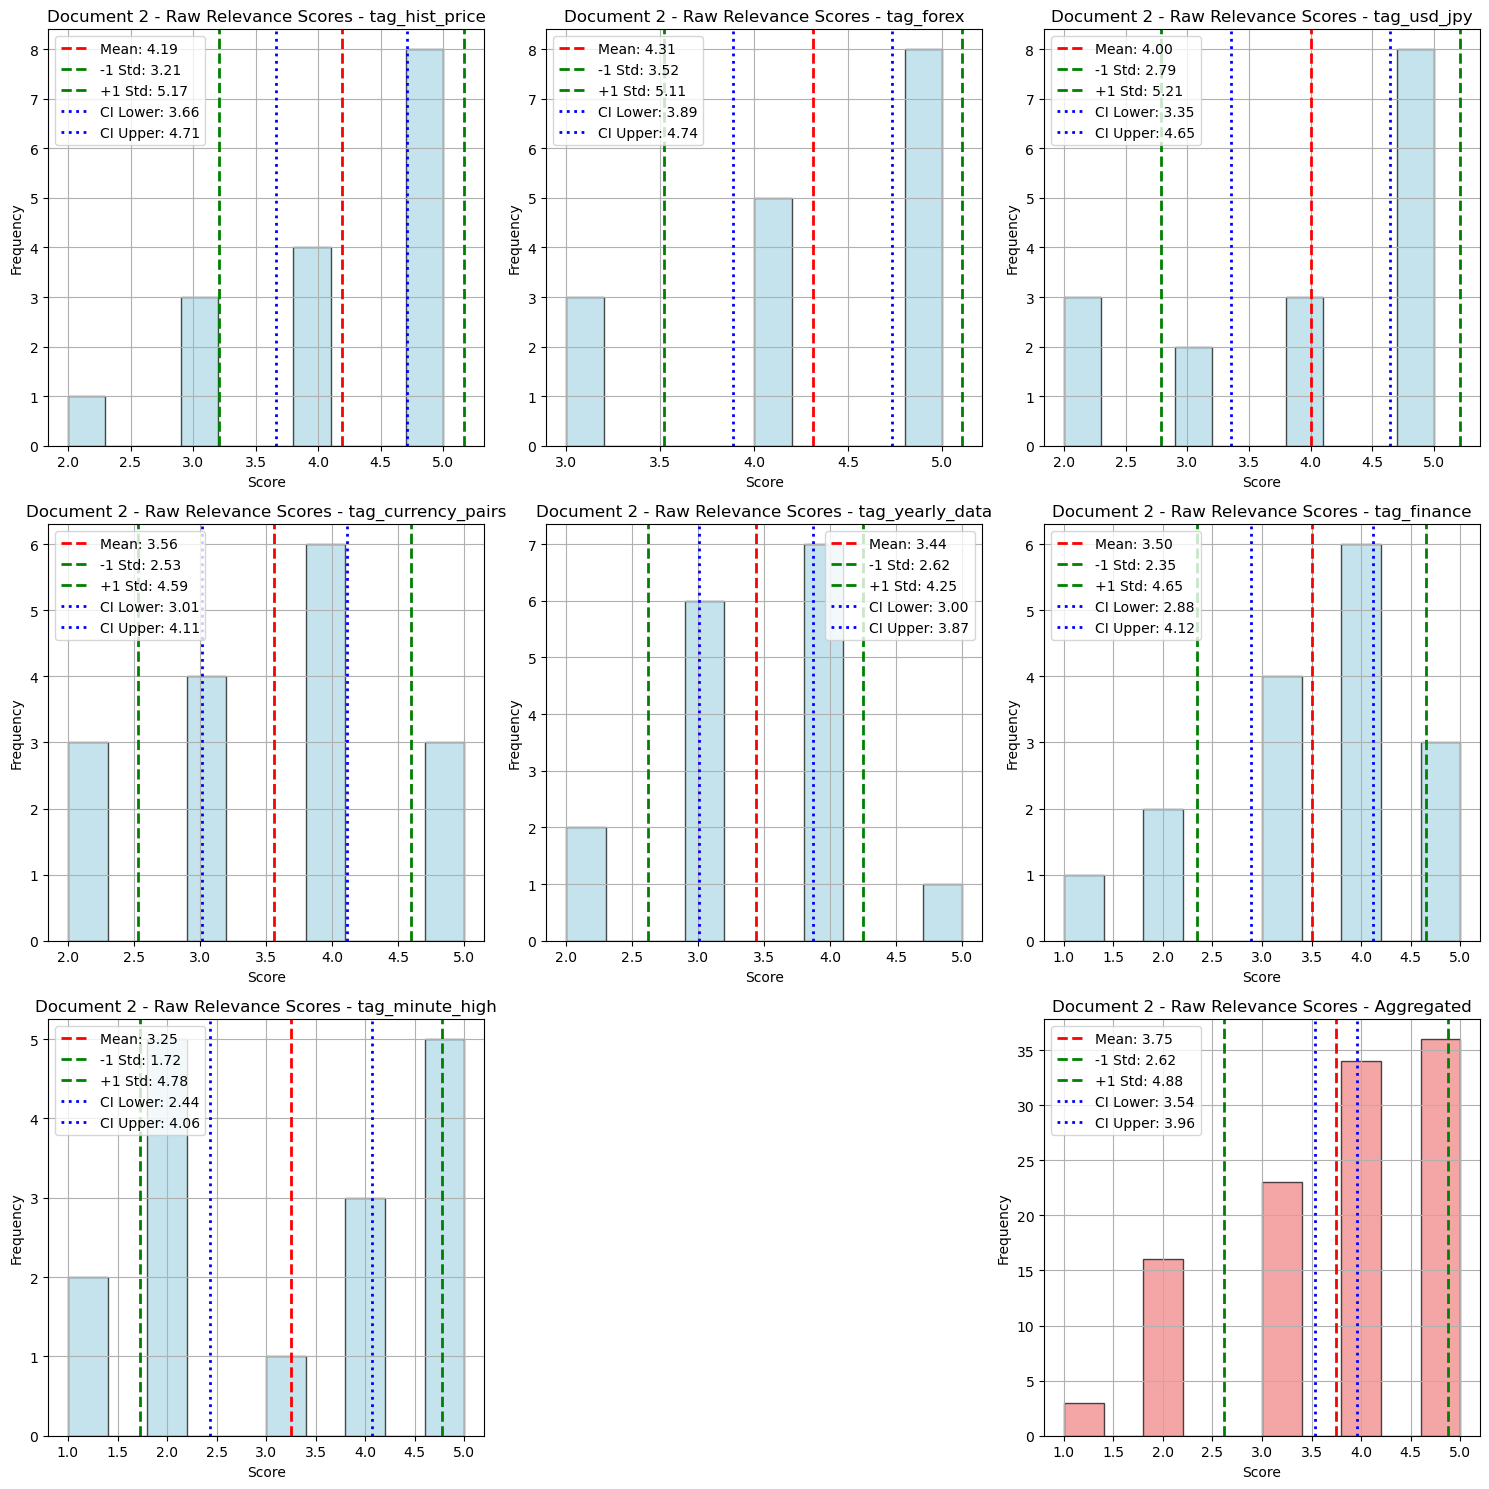

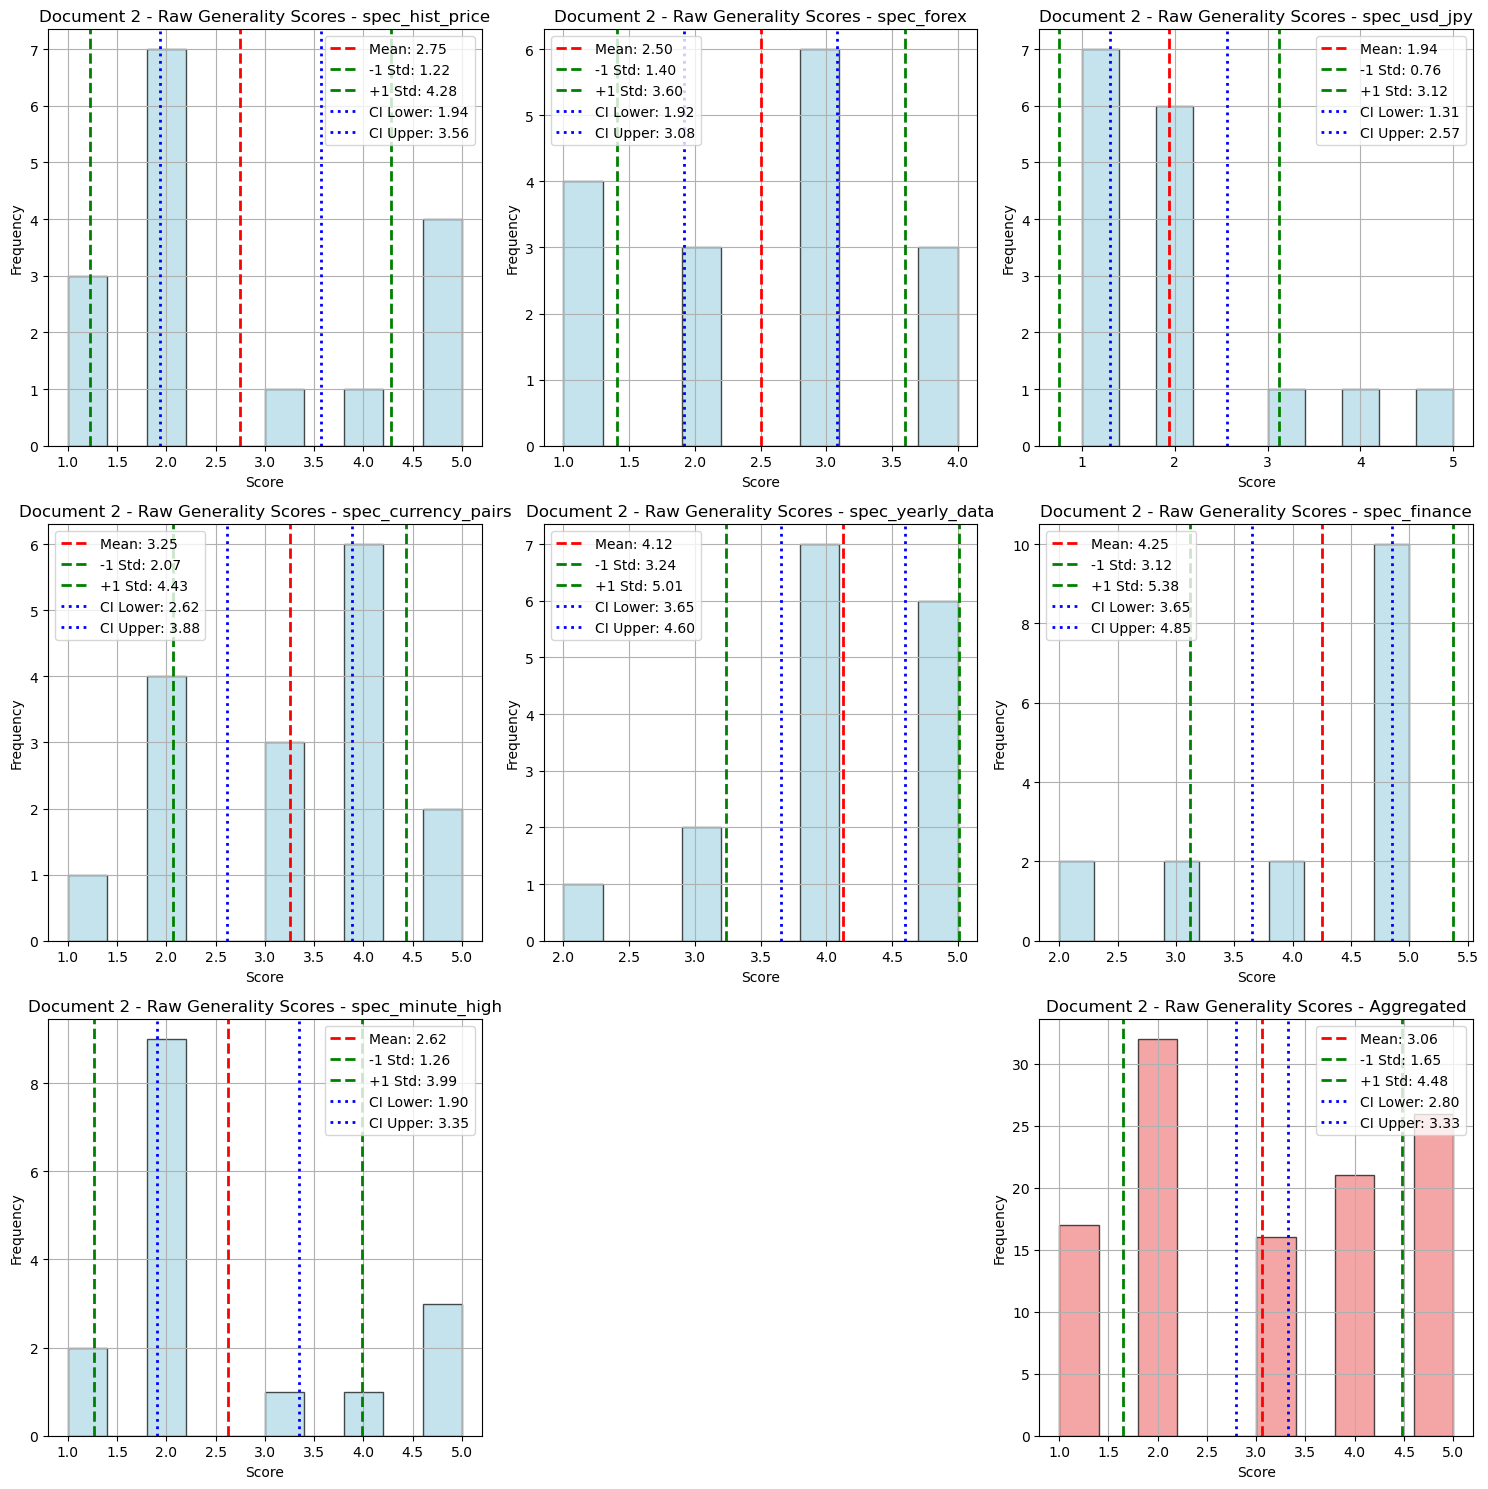

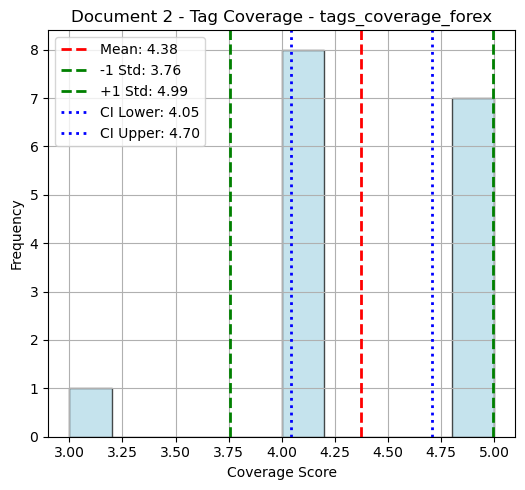

Correlation per Tag:
          Relevance vs Generality
hist                    -0.391887
forex                    0.124401
usd                     -0.195579
currency                -0.078759
yearly                   0.197279
finance                 -0.130295
minute                  -0.002527

Overall Correlations:
         Relevance vs Generality
Overall                -0.089753


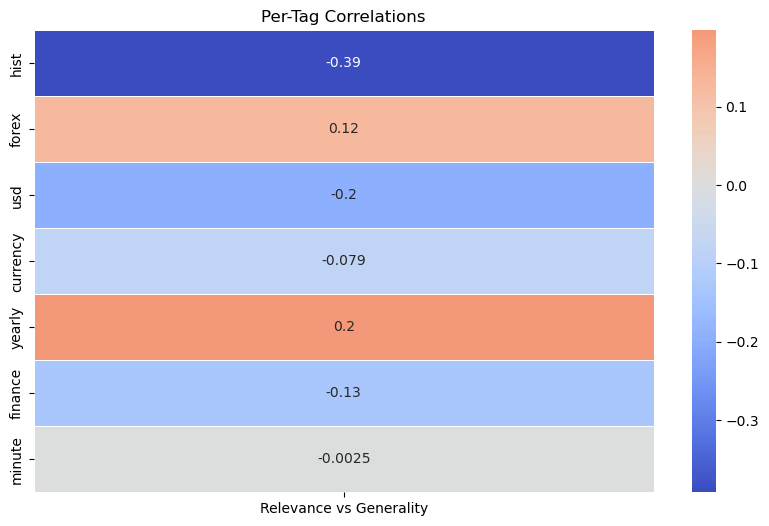

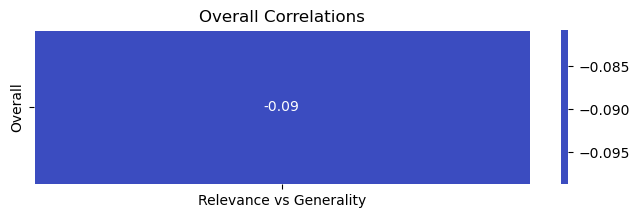


--- Analyzing Document 3 ---
Document 3 Relevance Distribution:
      tag_lung_cancer  tag_cancer  tag_oncology  tag_mrna_prof  tag_biology  \
std          0.619139    0.966092      1.258306       1.087811     0.910586   
min          3.000000    2.000000      1.000000       2.000000     1.000000   
max          5.000000    5.000000      5.000000       5.000000     4.000000   
mean         4.625000    4.000000      3.875000       4.125000     2.812500   

      tag_carcinomas  tag_gene_expr  
std         0.885061       0.928709  
min         2.000000       2.000000  
max         5.000000       5.000000  
mean        3.625000       4.062500  
Document 3 Generality Distribution:
      spec_lung_cancer  spec_cancer  spec_oncology  spec_mrna_prof  \
std           0.928709     1.302242       1.264911        1.014479   
min           1.000000     1.000000       1.000000        1.000000   
max           4.000000     5.000000       5.000000        4.000000   
mean          1.937500     3.3125

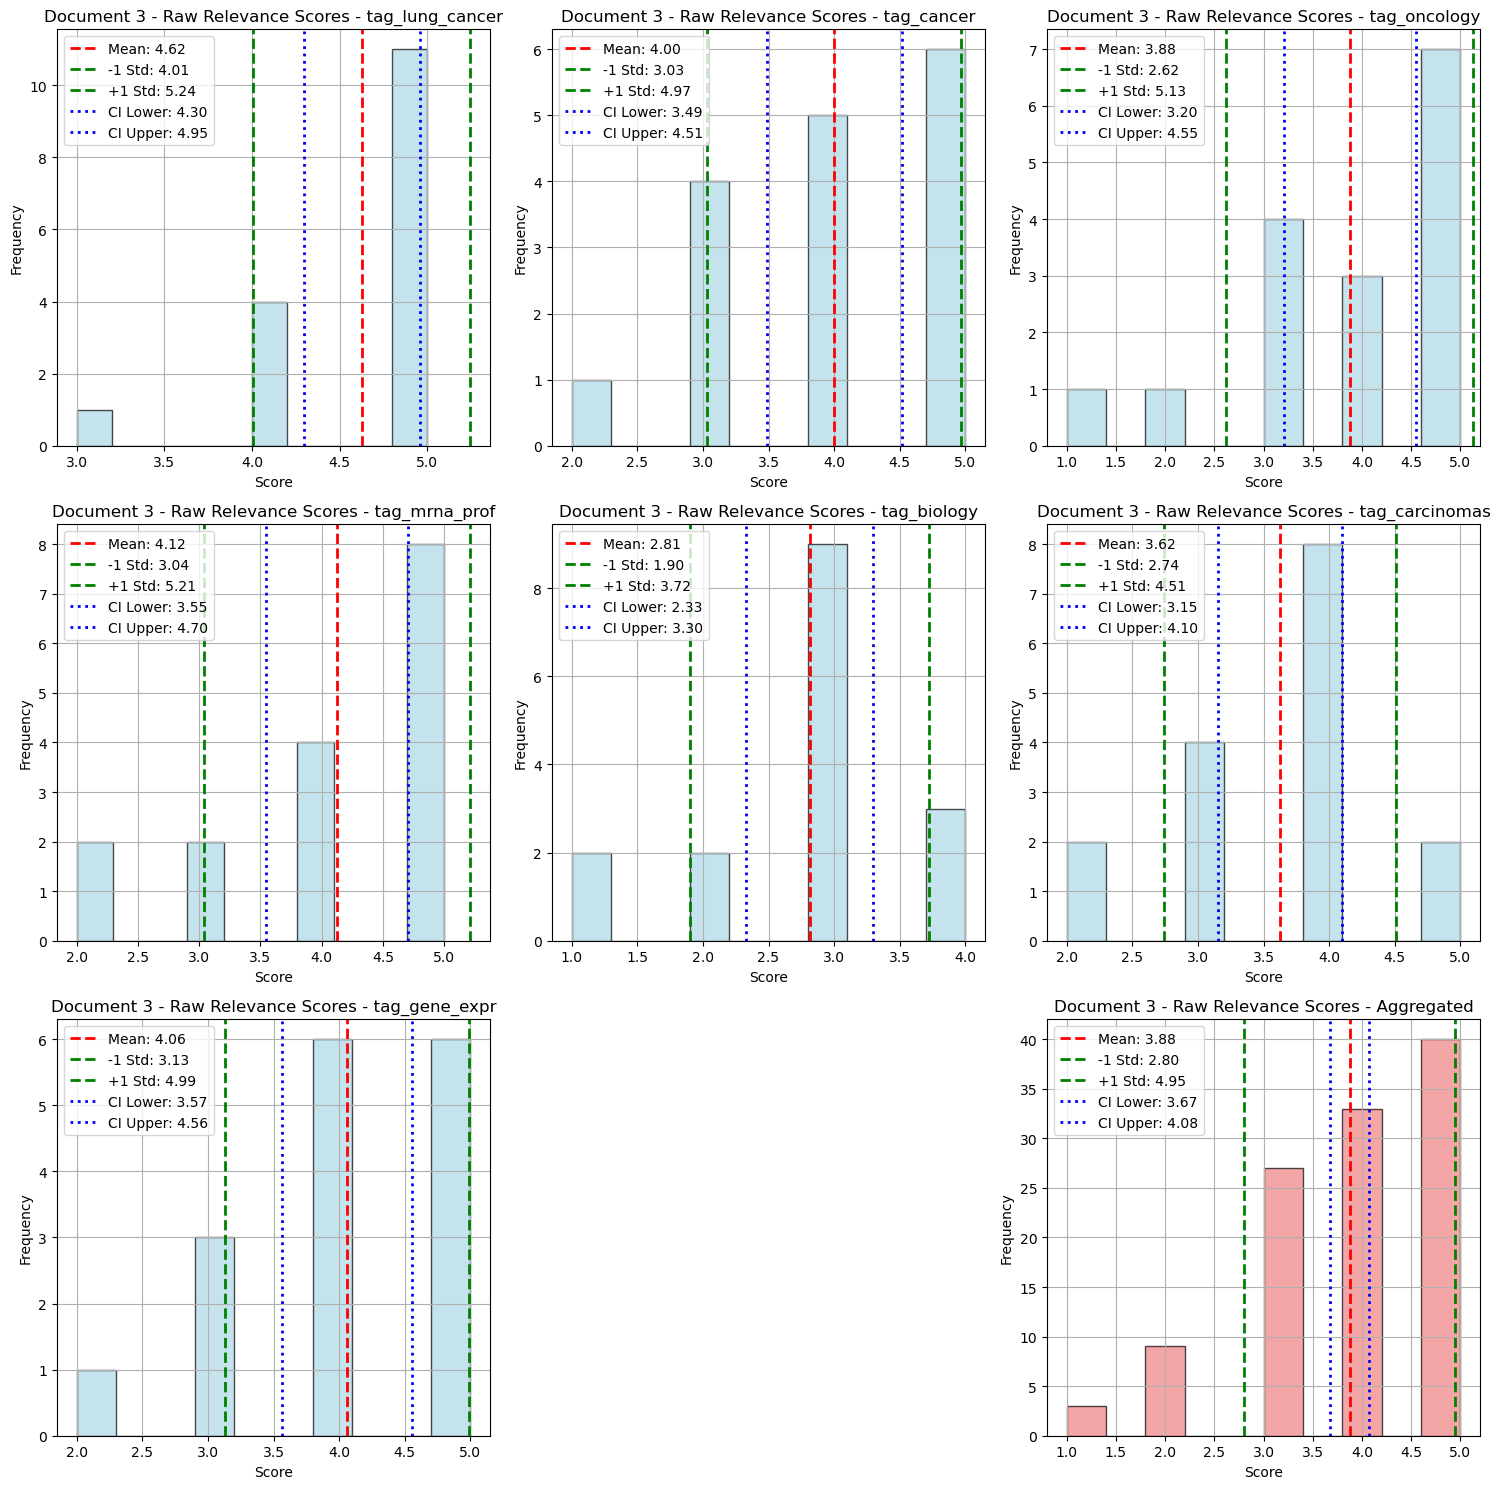

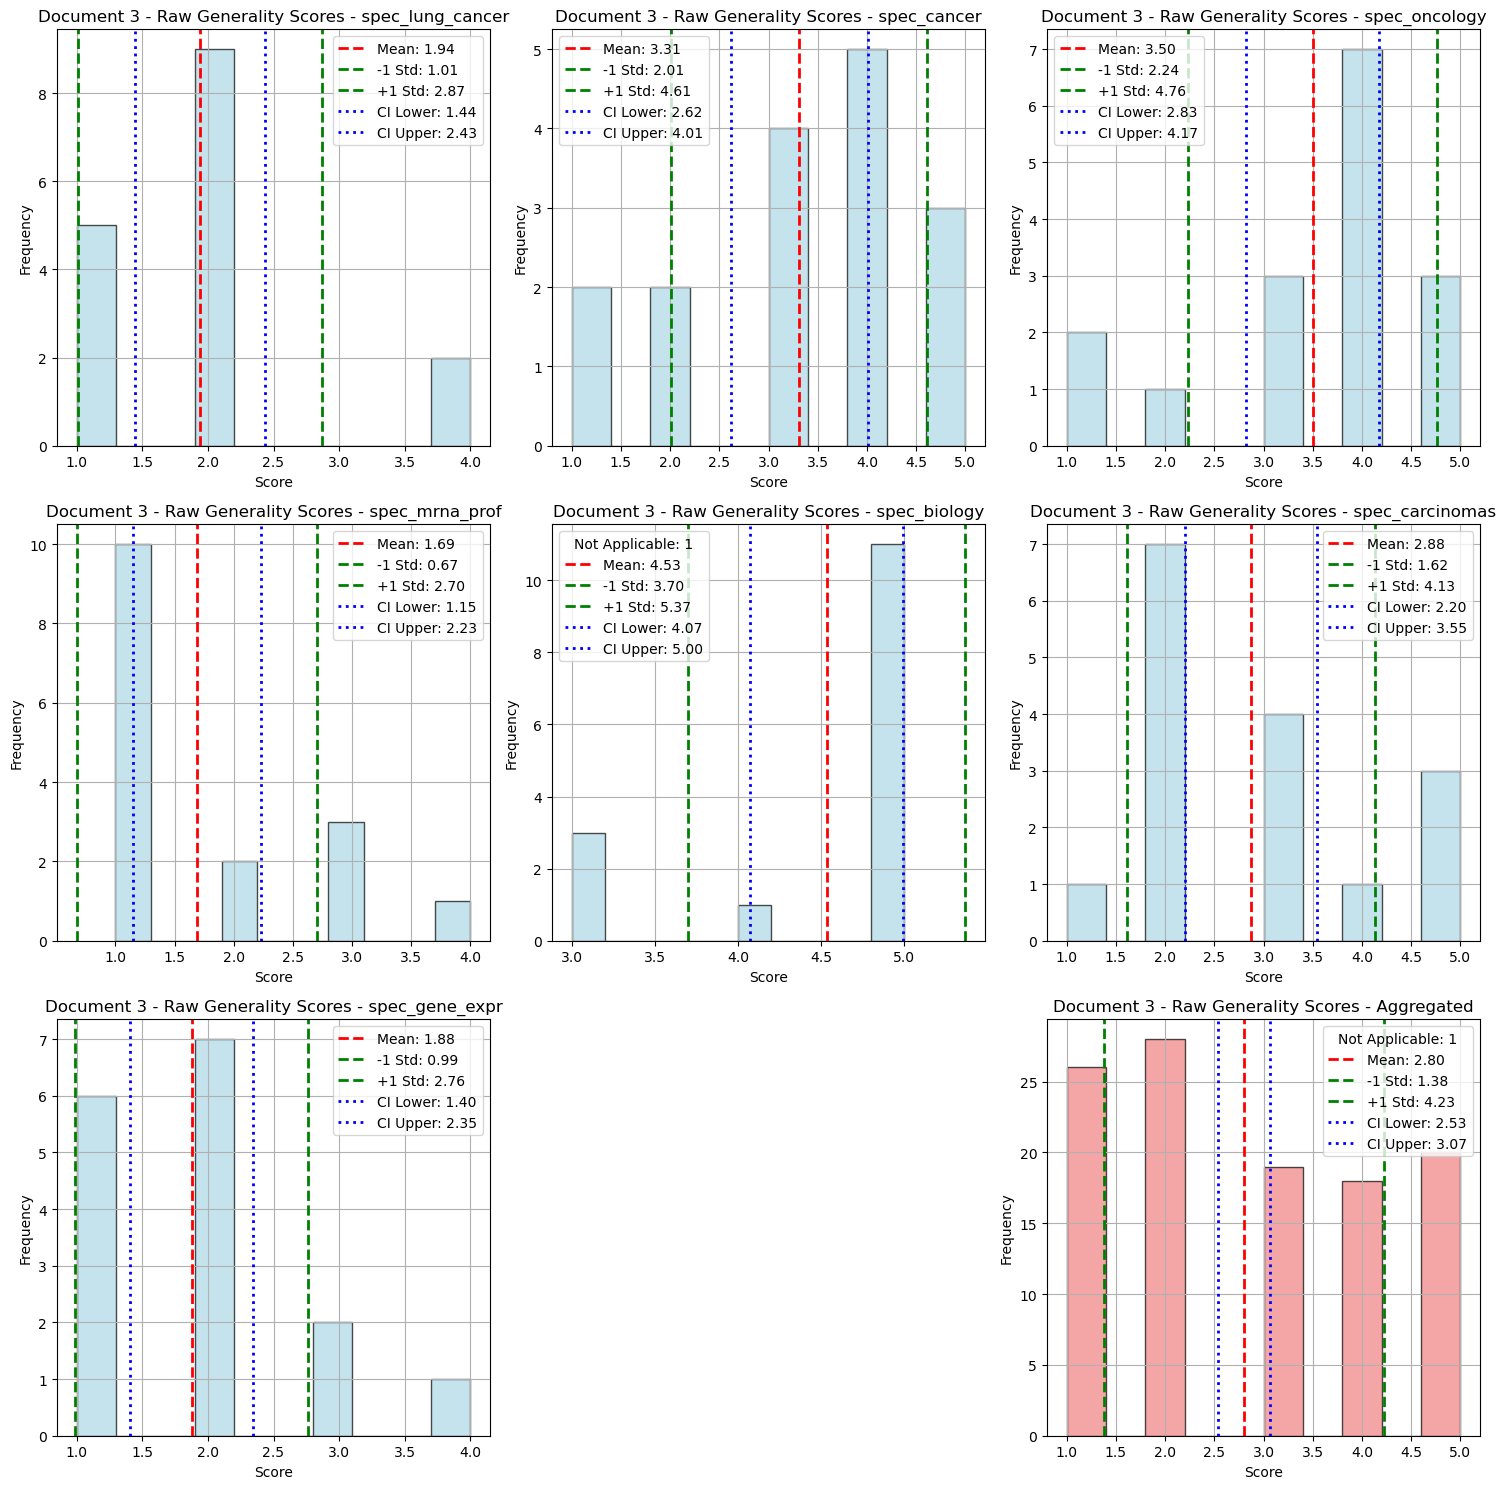

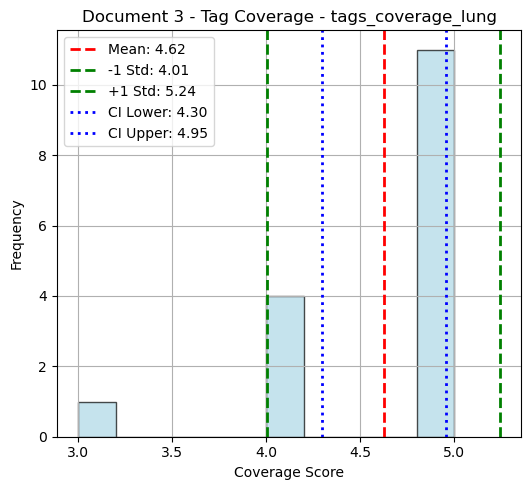

Correlation per Tag:
            Relevance vs Generality
lung                       0.040610
cancer                    -0.105667
oncology                   0.217145
mrna                      -0.601011
biology                    0.104627
carcinomas                -0.666825
gene                      -0.540262

Overall Correlations:
         Relevance vs Generality
Overall                -0.048961


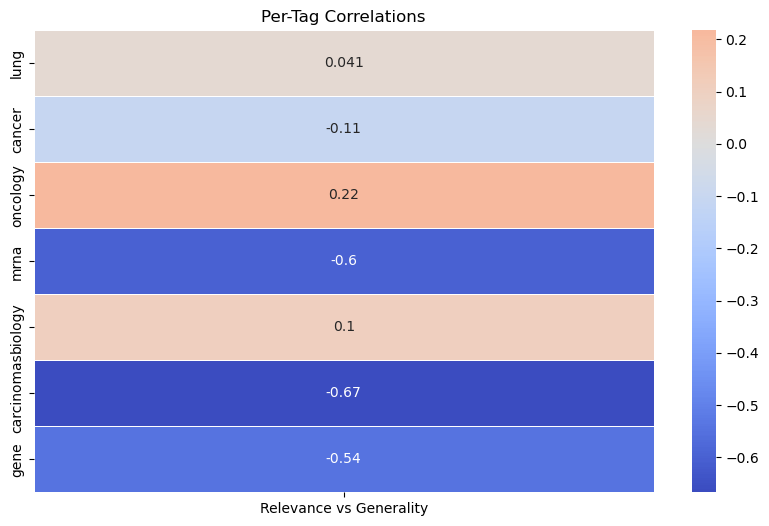

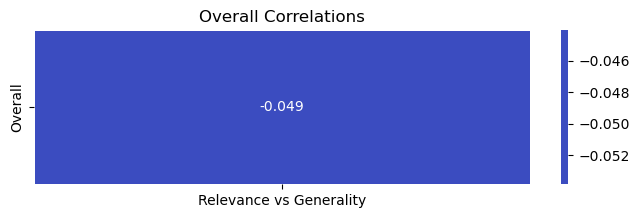

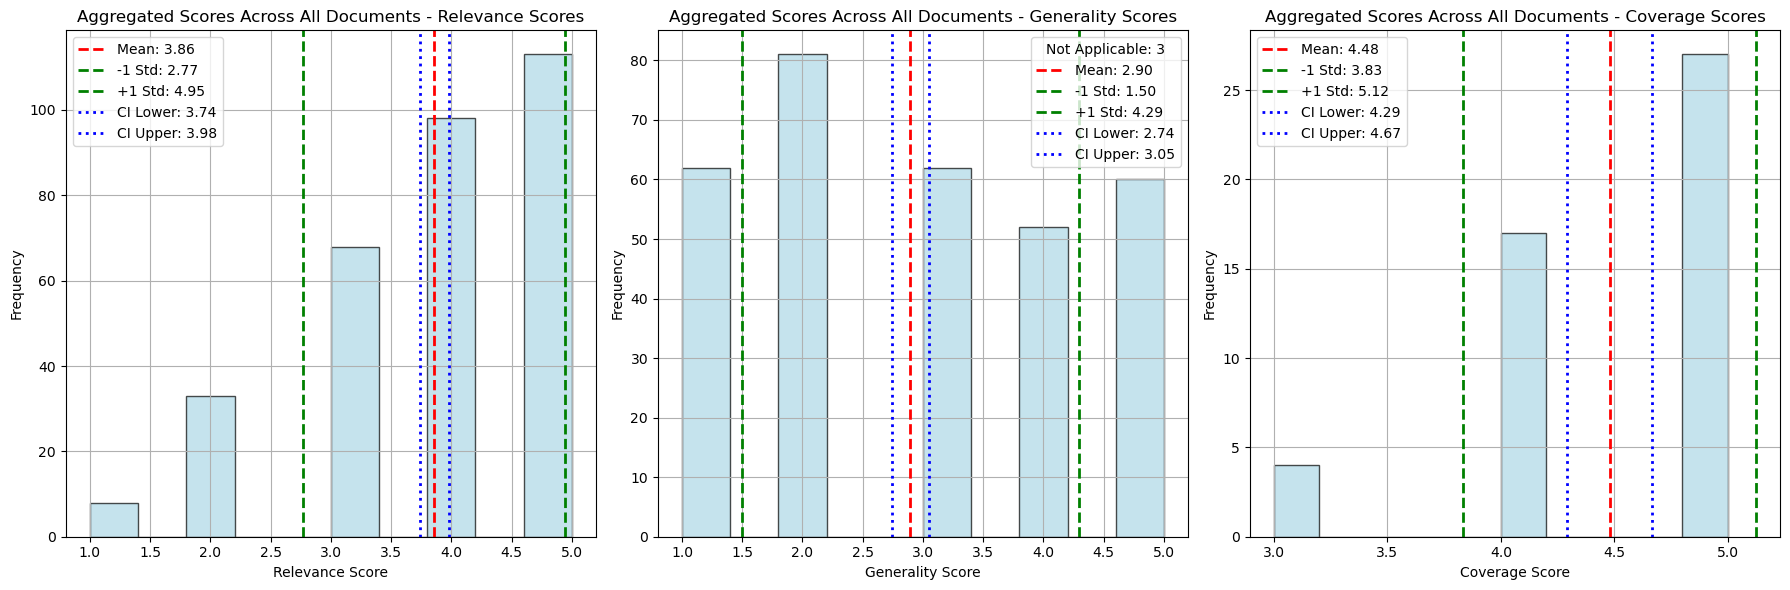


Aggregated Overall Correlations (pandas):
            Relevance  Generality
Relevance    1.000000   -0.269296
Generality  -0.269296    1.000000


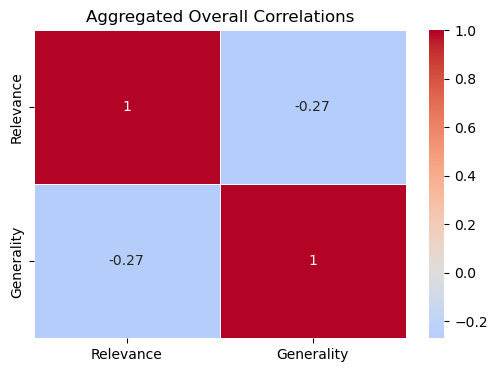

ICC for Relevance:


Type              Description       ICC         F  df1  df2          pval  \
0   ICC1   Single raters absolute  0.134847  3.493831   19  300  2.131274e-06   
1   ICC2     Single random raters  0.160074  7.859598   19  285  2.438711e-17   
2   ICC3      Single fixed raters  0.300075  7.859598   19  285  2.438711e-17   
3  ICC1k  Average raters absolute  0.713781  3.493831   19  300  2.131274e-06   
4  ICC2k    Average random raters  0.753044  7.859598   19  285  2.438711e-17   
5  ICC3k     Average fixed raters  0.872767  7.859598   19  285  2.438711e-17   

          CI95%  
0  [0.06, 0.29]  
1  [0.08, 0.32]  
2   [0.18, 0.5]  
3  [0.49, 0.87]  
4  [0.57, 0.88]  
5  [0.77, 0.94]


ICC for Generality:


Type              Description       ICC          F  df1  df2  \
0   ICC1   Single raters absolute  0.341974   9.315156   16  255   
1   ICC2     Single random raters  0.351435  14.435450   16  240   
2   ICC3      Single fixed raters  0.456438  14.435450   16  240   
3  ICC1k  Average raters absolute  0.892648   9.315156   16  255   
4  ICC2k    Average random raters  0.896586  14.435450   16  240   
5  ICC3k     Average fixed raters  0.930726  14.435450   16  240   

           pval         CI95%  
0  4.509538e-18   [0.2, 0.57]  
1  4.766257e-27  [0.21, 0.58]  
2  4.766257e-27   [0.3, 0.67]  
3  4.509538e-18   [0.8, 0.95]  
4  4.766257e-27  [0.81, 0.96]  
5  4.766257e-27  [0.87, 0.97]


ICC for Coverage:


Type              Description       ICC         F  df1  df2      pval  \
0   ICC1   Single raters absolute -0.023868  0.627010    2   45  0.538789   
1   ICC2     Single random raters  0.003205  1.089385    2   30  0.349363   
2   ICC3      Single fixed raters  0.005556  1.089385    2   30  0.349363   
3  ICC1k  Average raters absolute -0.594872  0.627010    2   45  0.538789   
4  ICC2k    Average random raters  0.048930  1.089385    2   30  0.349363   
5  ICC3k     Average fixed raters  0.082051  1.089385    2   30  0.349363   

           CI95%  
0   [-0.06, 0.6]  
1   [-0.03, 0.6]  
2  [-0.05, 0.72]  
3  [-5.39, 0.96]  
4  [-0.74, 0.96]  
5  [-2.84, 0.98]


ICC for Shared Coverage:


Type              Description       ICC         F  df1  df2      pval  \
0   ICC1   Single raters absolute  0.123432  3.253012    1   30  0.081344   
1   ICC2     Single random raters  0.135417  4.354839    1   15  0.054386   
2   ICC3      Single fixed raters  0.173333  4.354839    1   15  0.054386   
3  ICC1k  Average raters absolute  0.692593  3.253012    1   30  0.081344   
4  ICC2k    Average random raters  0.714777  4.354839    1   15  0.054386   
5  ICC3k     Average fixed raters  0.770370  4.354839    1   15  0.054386   

          CI95%  
0  [-0.03, 1.0]  
1  [-0.01, 1.0]  
2  [-0.02, 1.0]  
3  [-0.71, 1.0]  
4  [-0.19, 1.0]  
5  [-0.42, 1.0]


Fleiss' Kappa for Relevance: 0.0404
Fleiss' Kappa for Generality: 0.1122
Fleiss' Kappa for Coverage: -0.0230
Fleiss' Kappa for Shared Coverage: -0.0124

Krippendorff's Alpha for Relevance: 0.4470
Krippendorff's Alpha for Generality: 0.1869
Krippendorff's Alpha for Coverage: 0.4119
Krippendorff's Alpha for Shared Coverage: 0.1576


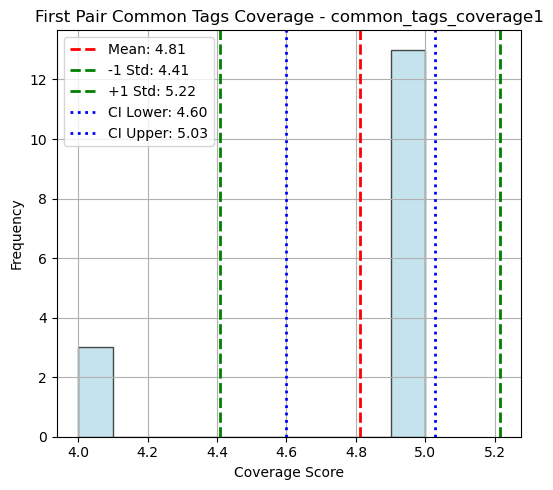

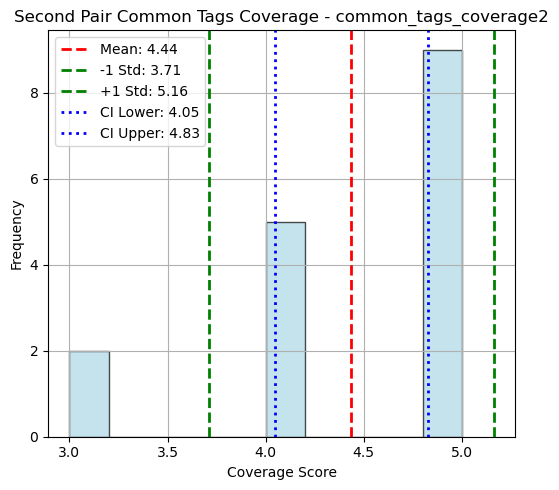


Metrics for First Pair Common Tags:
Accuracy: 0.83
Precision: 0.86
Recall: 0.74
Specificity: 0.91
F1-Score: 0.79

Metrics for Second Pair Common Tags:
Accuracy: 0.86
Precision: 0.70
Recall: 0.83
Specificity: 0.87
F1-Score: 0.76


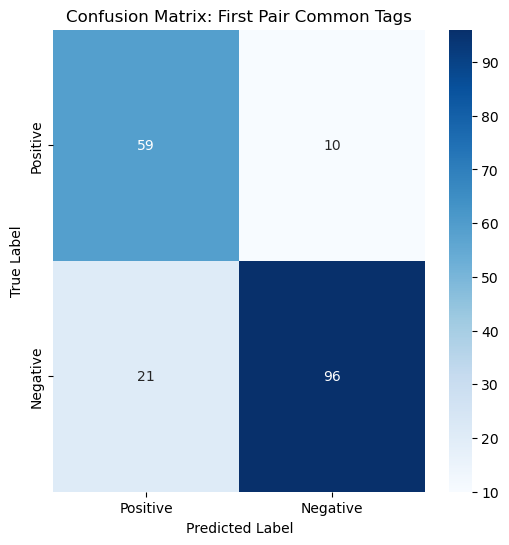

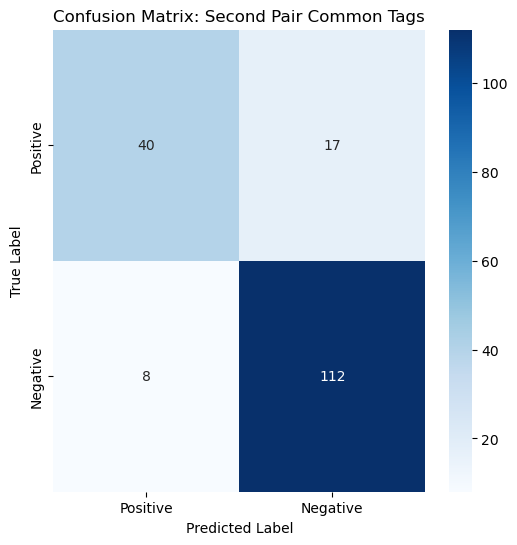

In [22]:
analyze_tags(
    df_human_generated,
    relevance_columns_list=[
        human_first_document_relevance_columns, 
        human_second_document_relevance_columns,
        human_third_document_relevance_columns
    ],
    spec_columns_list=[
        human_first_document_spec_columns, 
        human_second_document_spec_columns,
        human_third_document_spec_columns
    ],
    coverage_columns_list=[
        human_first_document_coverage_columns, 
        human_second_document_coverage_columns,
        human_third_document_coverage_columns
    ],
    suggested_columns_list=[
        human_first_document_suggested_columns,
        human_second_document_suggested_columns,
        human_third_document_suggested_columns
    ],
    common_tags_columns_1=human_first_pair_common_tags_columns,
    common_tags_true_tags_1=human_first_pair_common_tags_true_tags,
    common_tags_coverage_1=human_first_pair_coverage_columns,
    common_tags_columns_2=human_second_pair_common_tags_columns,
    common_tags_true_tags_2=human_second_pair_common_tags_true_tags,
    common_tags_coverage_2=human_second_pair_coverage_columns
)

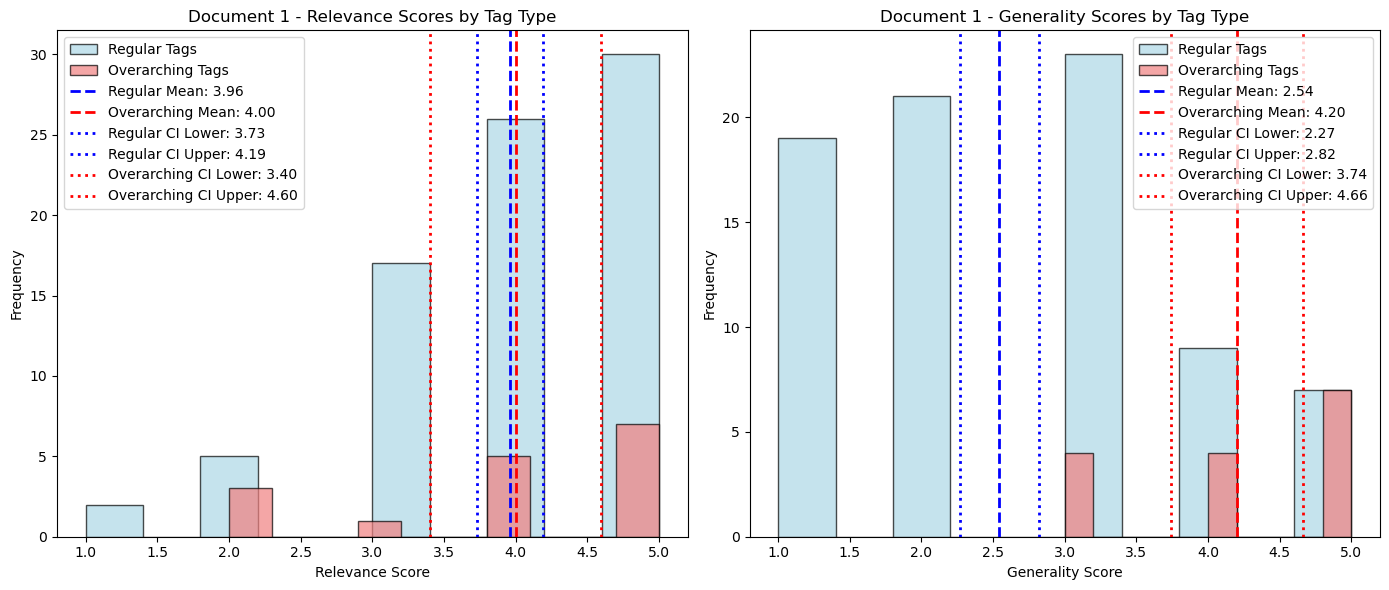

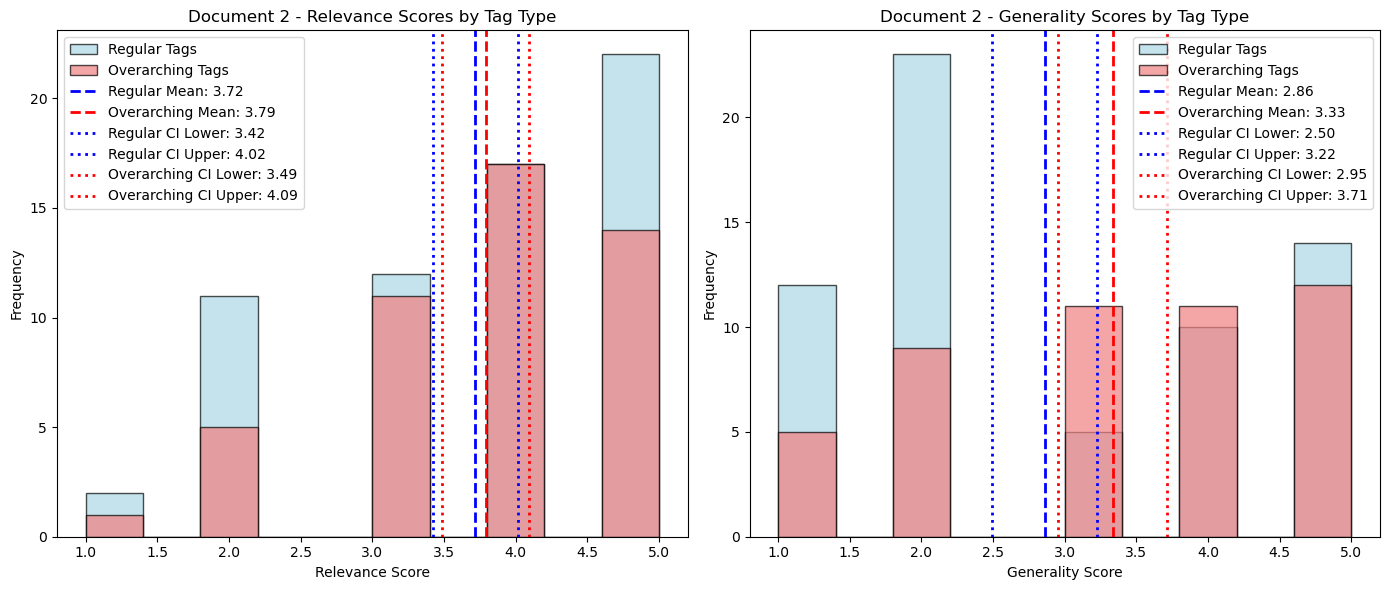

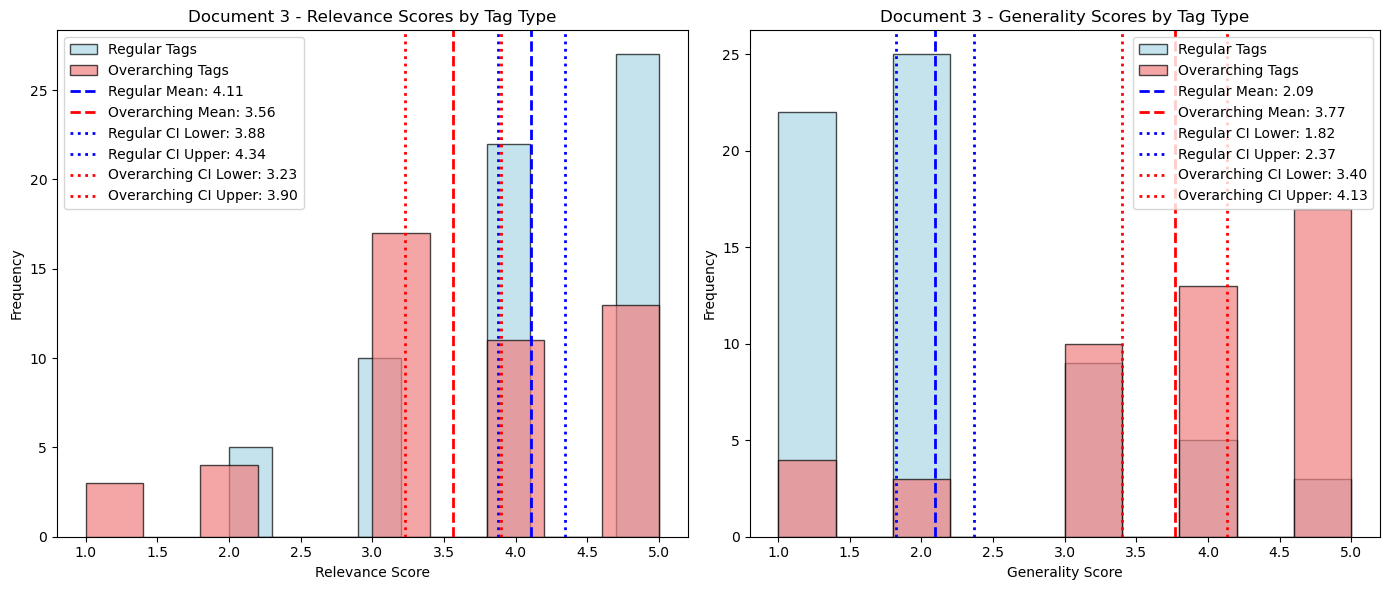

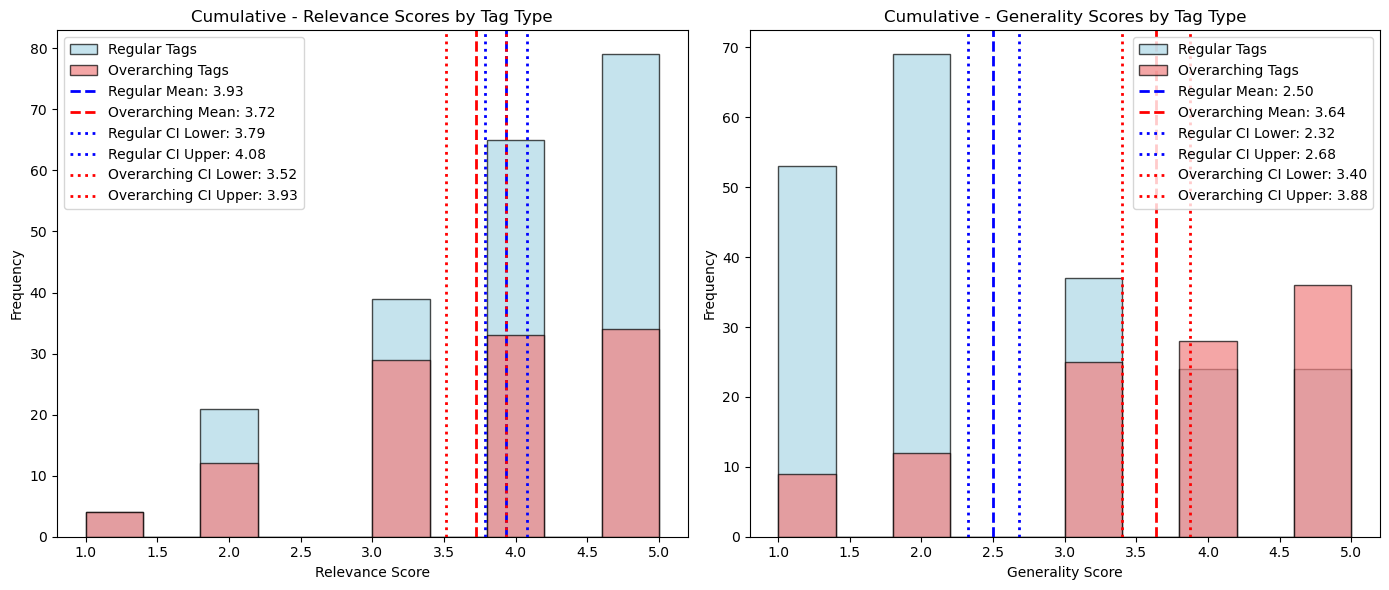

In [23]:
# Define document-specific relevance columns, specificity columns, tag types, and document names
doc_relevance_columns_list = [
    human_first_document_relevance_columns,
    human_second_document_relevance_columns,
    human_third_document_relevance_columns
]

doc_spec_columns_list = [
    human_first_document_spec_columns,
    human_second_document_spec_columns,
    human_third_document_spec_columns
]

doc_tag_types_list = [
    human_first_document_tag_types,
    human_second_document_tag_types,
    human_third_document_tag_types
]

document_names = ['Document 1', 'Document 2', 'Document 3']

# Call the function for all documents and cumulative results
plot_relevance_specificity_multiple_documents(df_human_generated, 
                                              doc_relevance_columns_list, 
                                              doc_spec_columns_list, 
                                              doc_tag_types_list, 
                                              document_names)

In [24]:
df_model_generated.columns

Index(['timestamp', 'age_range', 'gender', 'education', 'english_prof',
       'lol_game_desc', 'tag_ranked_matches', 'tag_games',
       'tag_league_of_legends', 'tag_game_data_analysis', 'tag_computer_games',
       'tag_gaming', 'tag_esports', 'spec_ranked_matches', 'spec_games',
       'spec_league_of_legends', 'spec_game_data_analysis',
       'spec_computer_games', 'spec_gaming', 'spec_esports',
       'tags_coverage_lol', 'suggested_tags_lol', 'forex_desc',
       'tag_historical_price_data', 'tag_minute_interval',
       'tag_historical_data', 'tag_forex', 'tag_candlestick', 'tag_minute',
       'tag_high', 'spec_historical_price_data', 'spec_minute_interval',
       'spec_historical_data', 'spec_forex', 'spec_candlestick', 'spec_minute',
       'spec_high', 'tags_coverage_forex', 'suggested_tags_forex',
       'lung_cancer_desc', 'tag_lung_cancer', 'tag_cancer', 'tag_science',
       'tag_cancer_research', 'tag_biology', 'tag_medicine', 'tag_health',
       'spec_lung_cancer',

In [25]:
model_first_document_relevance_columns = ['tag_ranked_matches', 'tag_games', 'tag_league_of_legends', 'tag_game_data_analysis', 'tag_computer_games', 'tag_gaming', 'tag_esports']
model_first_document_spec_columns = ['spec_ranked_matches', 'spec_games', 'spec_league_of_legends', 'spec_game_data_analysis', 'spec_computer_games', 'spec_gaming', 'spec_esports']
model_first_document_coverage_columns = ['tags_coverage_lol']
model_first_document_suggested_columns = ['suggested_tags_lol']
model_first_document_tag_types = {
    'overarching': ['tag_games', 'tag_computer_games', 'tag_gaming', 'tag_esports'],
    'regular': ['tag_ranked_matches', 'tag_league_of_legends', 'tag_game_data_analysis']
}

model_second_document_relevance_columns = ['tag_historical_price_data', 'tag_minute_interval', 'tag_historical_data', 'tag_forex', 'tag_candlestick', 'tag_minute', 'tag_high']
model_second_document_spec_columns = ['spec_historical_price_data', 'spec_minute_interval', 'spec_historical_data', 'spec_forex', 'spec_candlestick', 'spec_minute', 'spec_high']
model_second_document_coverage_columns = ['tags_coverage_forex']
model_second_document_suggested_columns = ['suggested_tags_forex']
model_second_document_tag_types = {
    'regular': ['tag_historical_price_data', 'tag_minute_interval', 'tag_historical_data', 'tag_forex', 'tag_candlestick', 'tag_minute', 'tag_high'],
    'overarching': []
}

model_third_document_relevance_columns = ['tag_lung_cancer', 'tag_cancer', 'tag_science', 'tag_cancer_research', 'tag_biology', 'tag_medicine', 'tag_health']
model_third_document_spec_columns = ['spec_lung_cancer', 'spec_cancer', 'spec_science', 'spec_cancer_research', 'spec_biology', 'spec_medicine', 'spec_health']
model_third_document_coverage_columns = ['tags_coverage_lung']
model_third_document_suggested_columns = ['suggested_tags_lung']
model_third_document_tag_types = {
    'overarching': ['tag_cancer', 'tag_science', 'tag_cancer_research', 'tag_biology', 'tag_medicine', 'tag_health'],
    'regular': ['tag_lung_cancer']
}

model_first_pair_common_tags_columns = ['common_tags1']
model_first_pair_common_tags_true_tags = ["Coronavirus", "Covid-19", "Health", "Public Health", "Epidemiology"]
model_first_pair_coverage = ['common_tags_coverage1']

model_second_pair_common_tags_columns = ['common_tags2']
model_second_pair_common_tags_true_tags = ["Movies", "Film", "Media", "Entertainment"]
model_second_pair_coverage_columns = ['common_tags_coverage2']


--- Analyzing Document 1 ---
Document 1 Relevance Distribution:
      tag_ranked_matches  tag_games  tag_league_of_legends  \
std             0.718795   0.629153                0.57735   
min             3.000000   2.000000                3.00000   
max             5.000000   4.000000                5.00000   
mean            4.125000   3.437500                4.75000   

      tag_game_data_analysis  tag_computer_games  tag_gaming  tag_esports  
std                 0.816497            0.856349    0.885061     1.276388  
min                 2.000000            2.000000    2.000000     1.000000  
max                 5.000000            5.000000    5.000000     5.000000  
mean                4.000000            3.750000    3.625000     3.187500  
Document 1 Generality Distribution:
      spec_ranked_matches  spec_games  spec_league_of_legends  \
std              0.516398    0.816497                0.543906   
min              1.000000    3.000000                1.000000   
max          

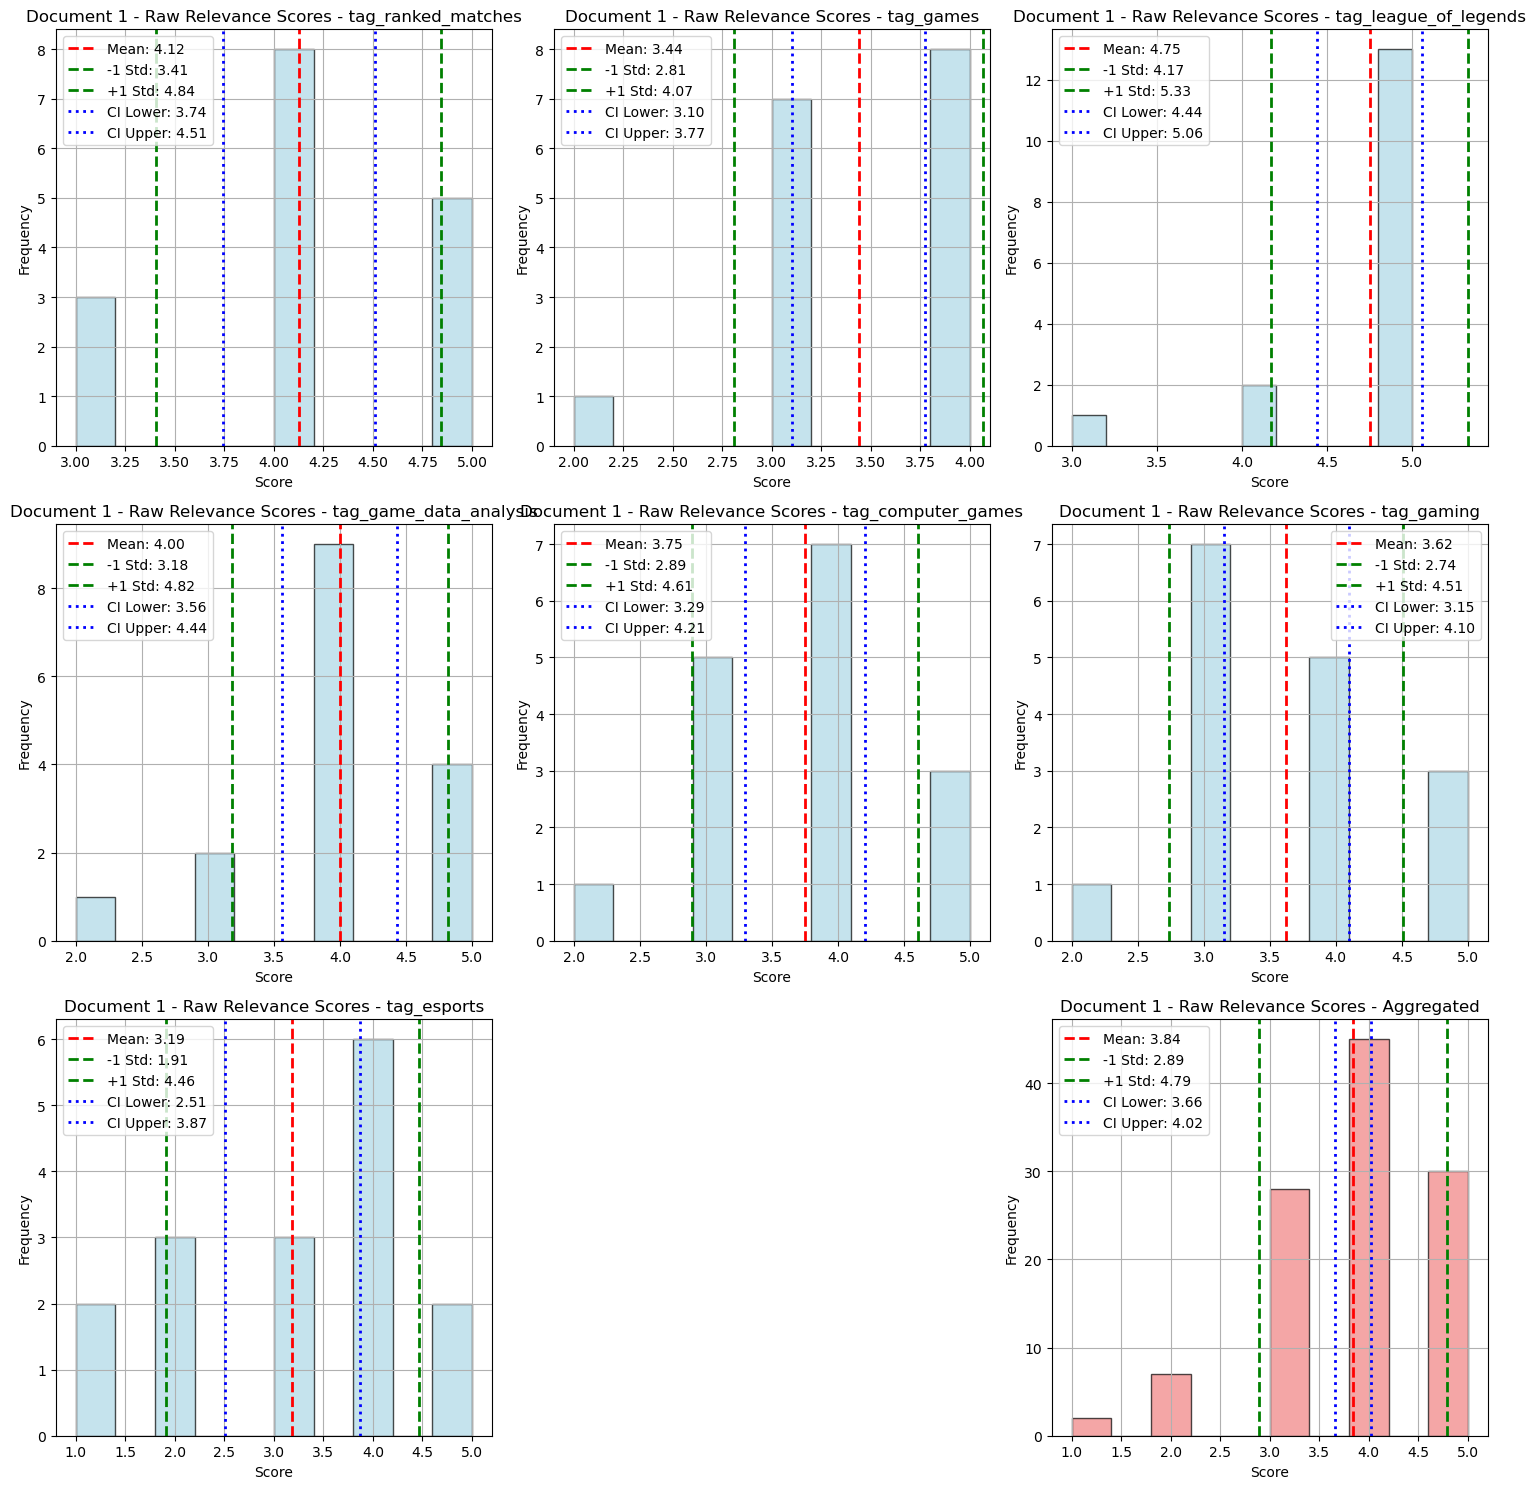

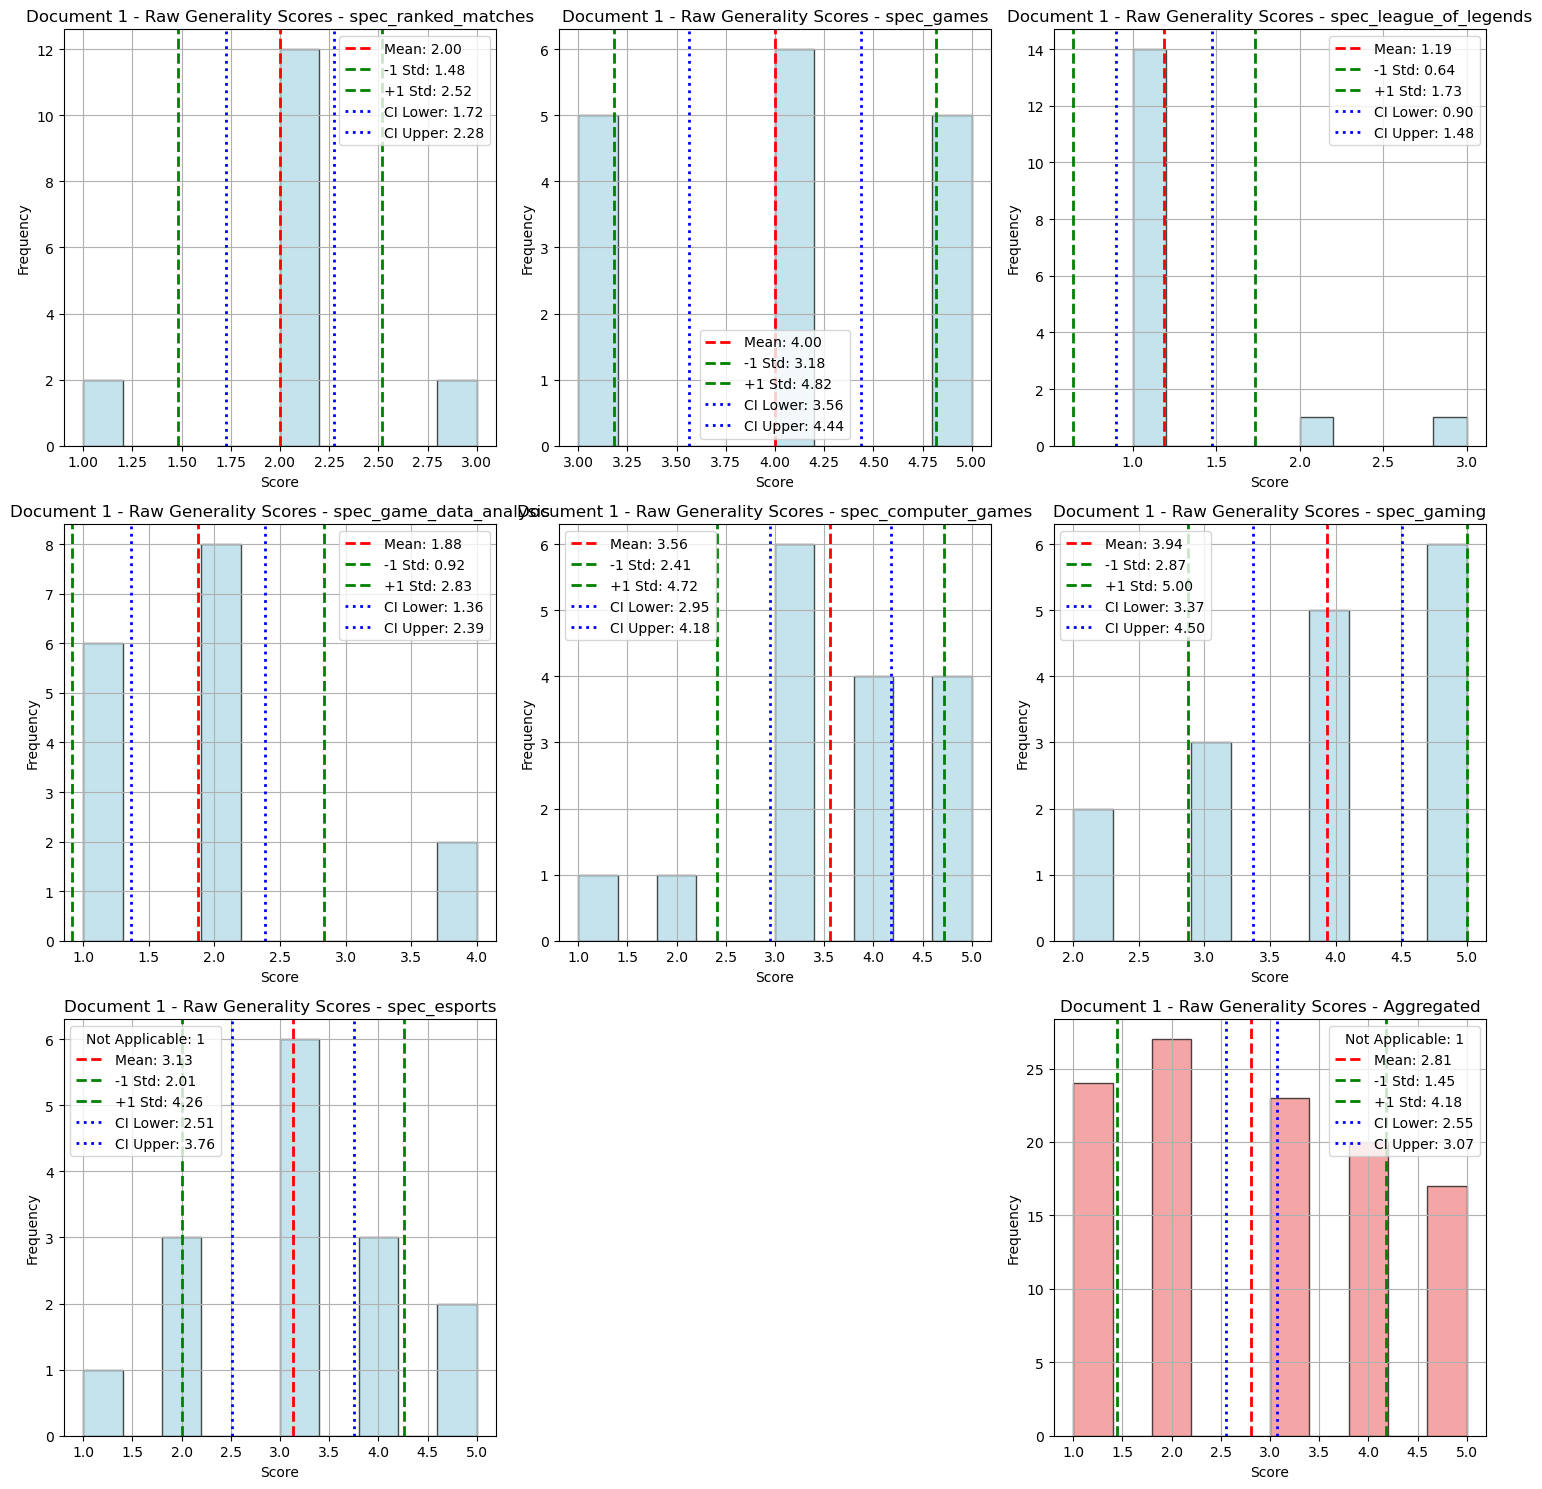

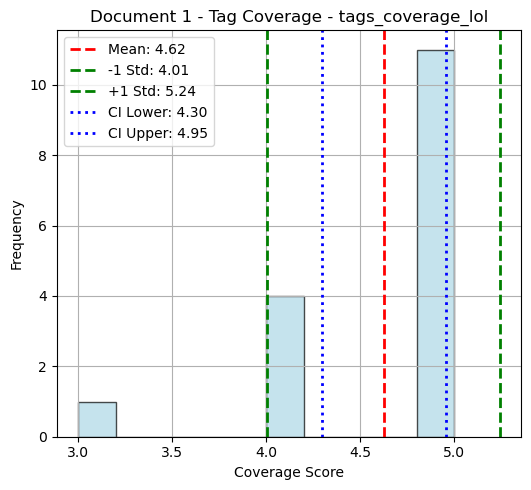

Correlation per Tag:
          Relevance vs Generality
ranked                  -0.384353
games                    0.144338
league                   0.180300
game                    -0.443665
computer                -0.215555
gaming                  -0.350867
esports                 -0.676357

Overall Correlations:
         Relevance vs Generality
Overall                -0.121622


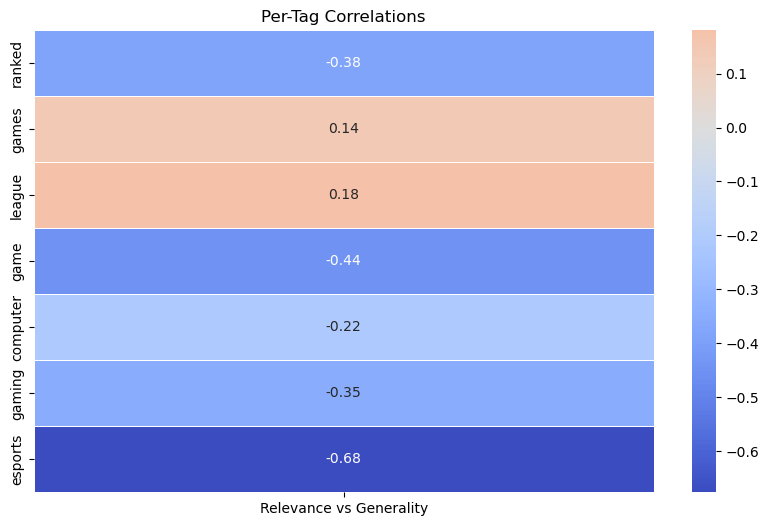

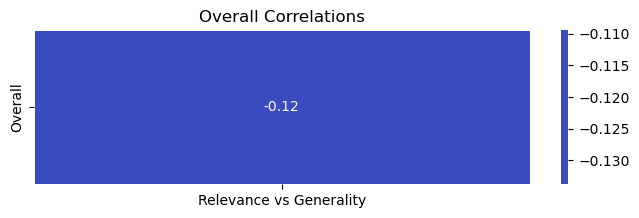


--- Analyzing Document 2 ---
Document 2 Relevance Distribution:
      tag_historical_price_data  tag_minute_interval  tag_historical_data  \
std                     0.60208             1.062623             0.885061   
min                     3.00000             2.000000             1.000000   
max                     5.00000             5.000000             5.000000   
mean                    4.31250             4.062500             3.375000   

      tag_forex  tag_candlestick  tag_minute  tag_high  
std      0.7932         1.152895    1.204159   1.21106  
min      3.0000         1.000000    1.000000   1.00000  
max      5.0000         5.000000    4.000000   4.00000  
mean     4.3125         3.562500    2.875000   2.50000  
Document 2 Generality Distribution:
      spec_historical_price_data  spec_minute_interval  spec_historical_data  \
std                     0.655108              0.816497              1.060099   
min                     1.000000              1.000000              

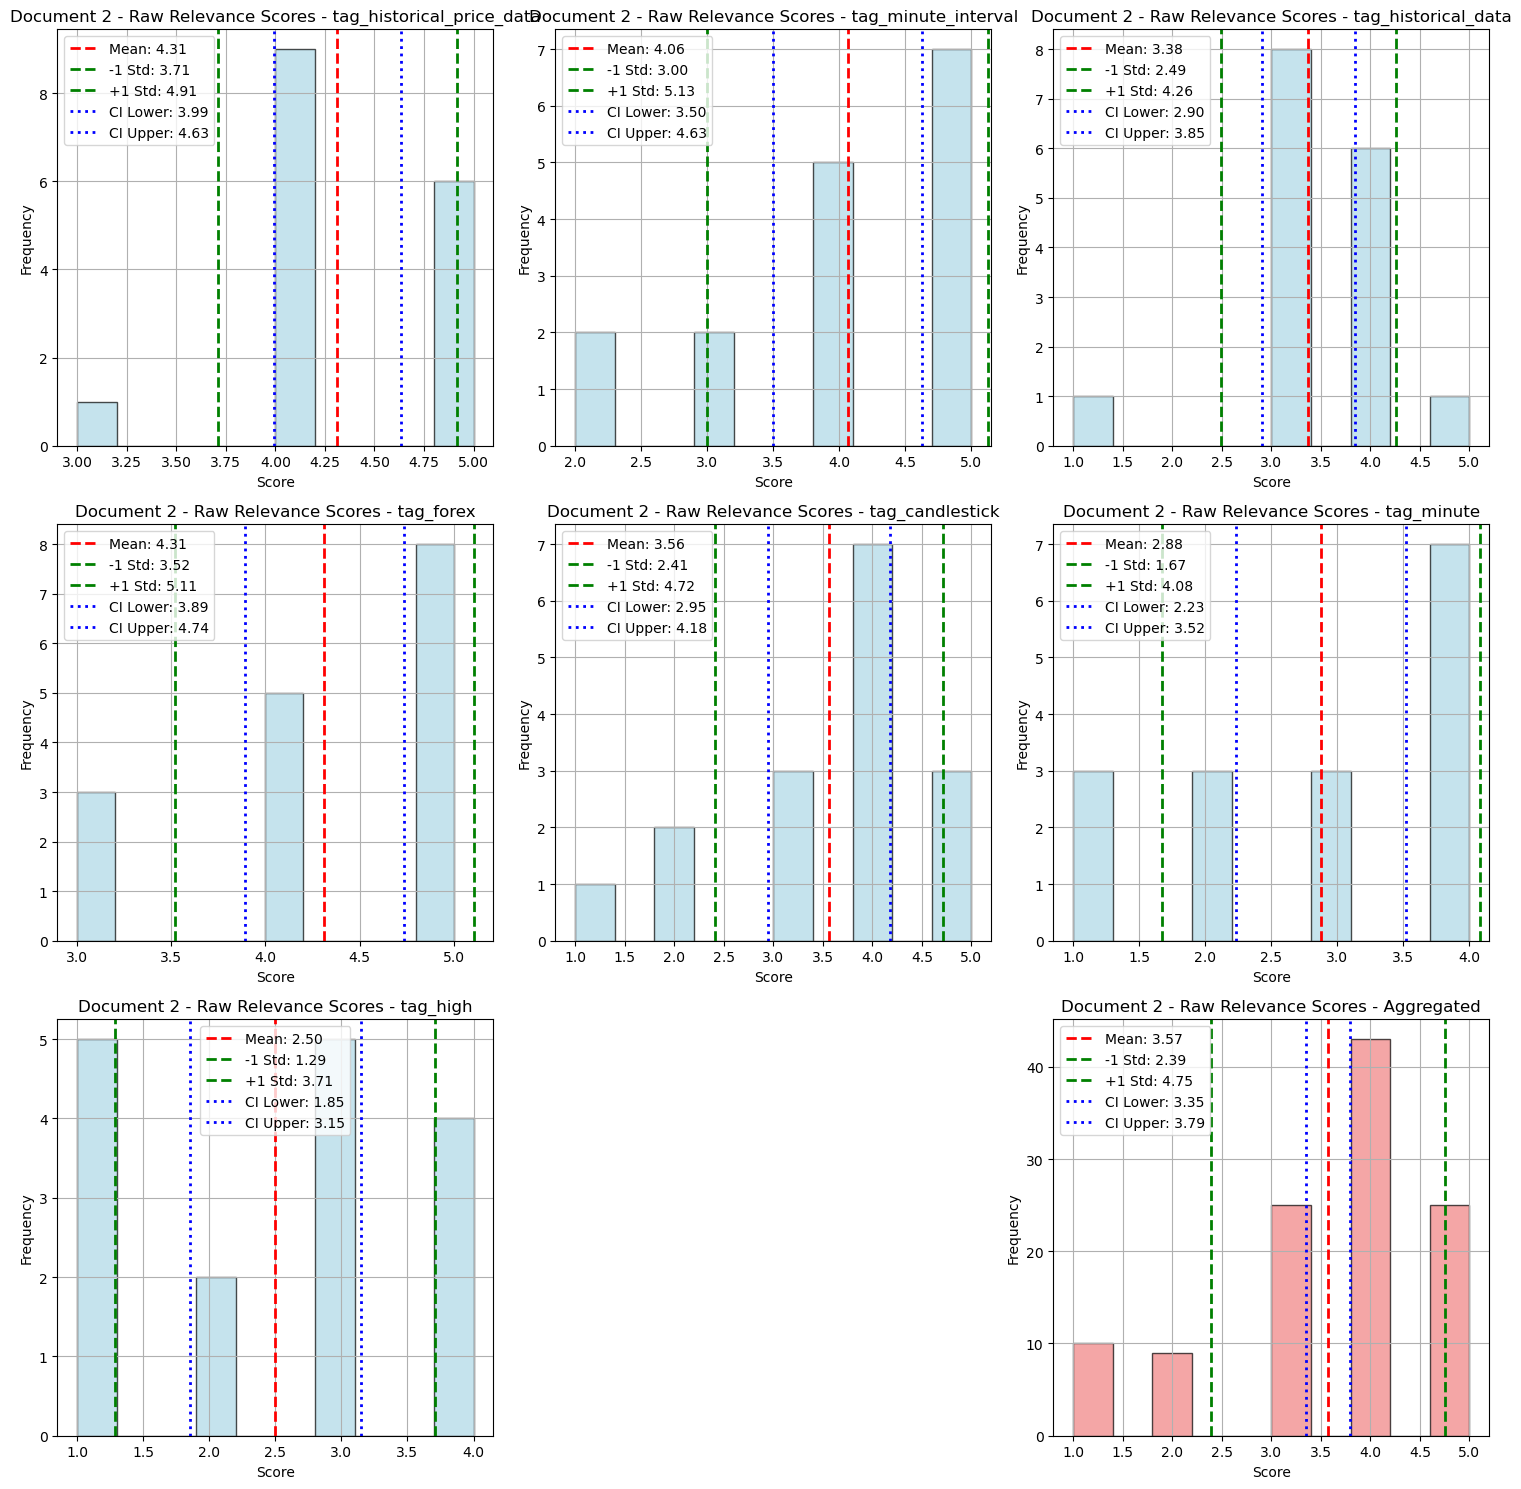

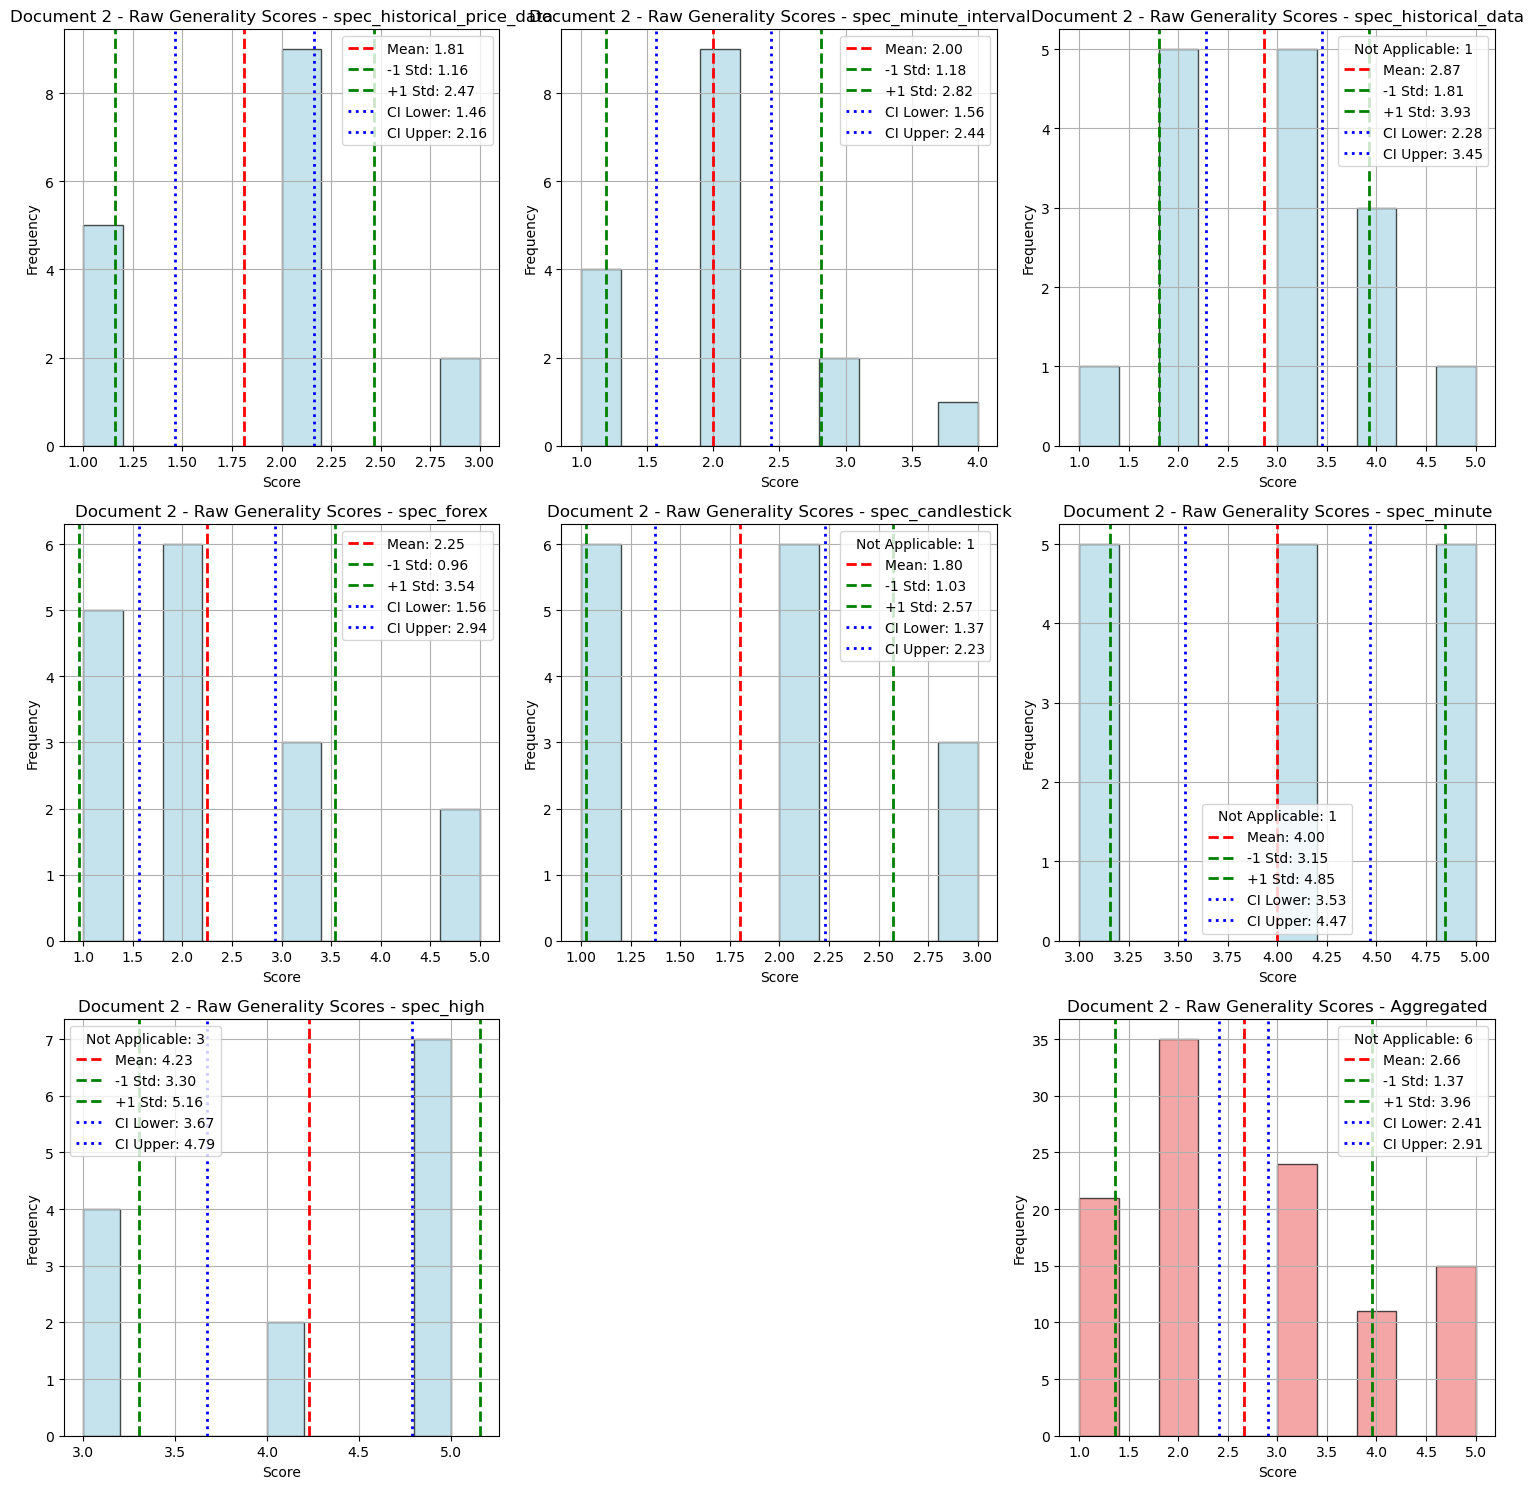

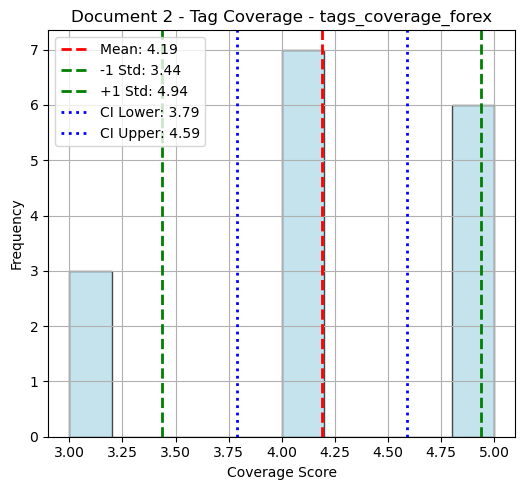

Correlation per Tag:
             Relevance vs Generality
historical                 -0.425551
minute                     -0.582922
forex                       0.215779
candlestick                -0.152912
high                       -0.296166

Overall Correlations:
         Relevance vs Generality
Overall                 -0.06781


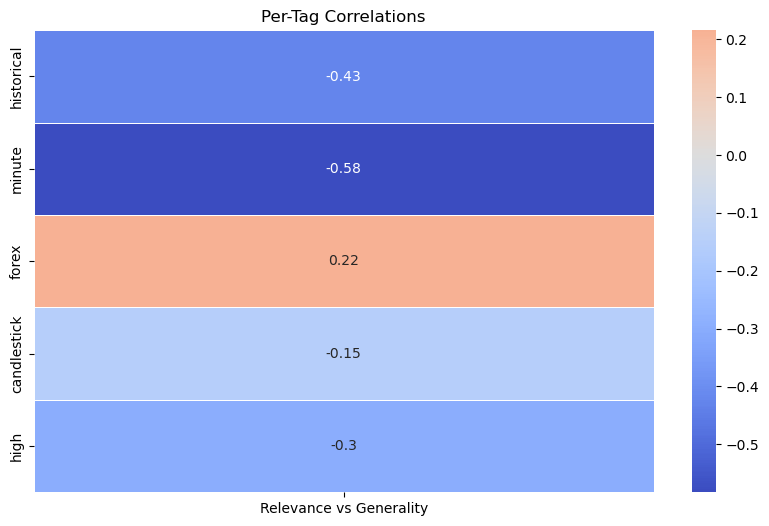

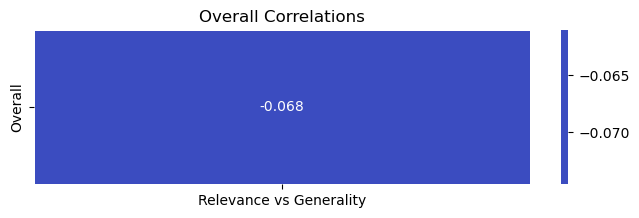


--- Analyzing Document 3 ---
Document 3 Relevance Distribution:
      tag_lung_cancer  tag_cancer  tag_science  tag_cancer_research  \
std          0.718795    1.062623     0.856349             0.629153   
min          3.000000    2.000000     1.000000             3.000000   
max          5.000000    5.000000     5.000000             5.000000   
mean         4.625000    4.062500     2.750000             4.437500   

      tag_biology  tag_medicine  tag_health  
std       1.12361      0.813941    0.806226  
min       1.00000      2.000000    2.000000  
max       5.00000      5.000000    5.000000  
mean      3.06250      3.562500    3.375000  
Document 3 Generality Distribution:
      spec_lung_cancer  spec_cancer  spec_science  spec_cancer_research  \
std           0.813941     1.258306      1.264911              1.024695   
min           1.000000     1.000000      1.000000              1.000000   
max           4.000000     5.000000      5.000000              5.000000   
mean         

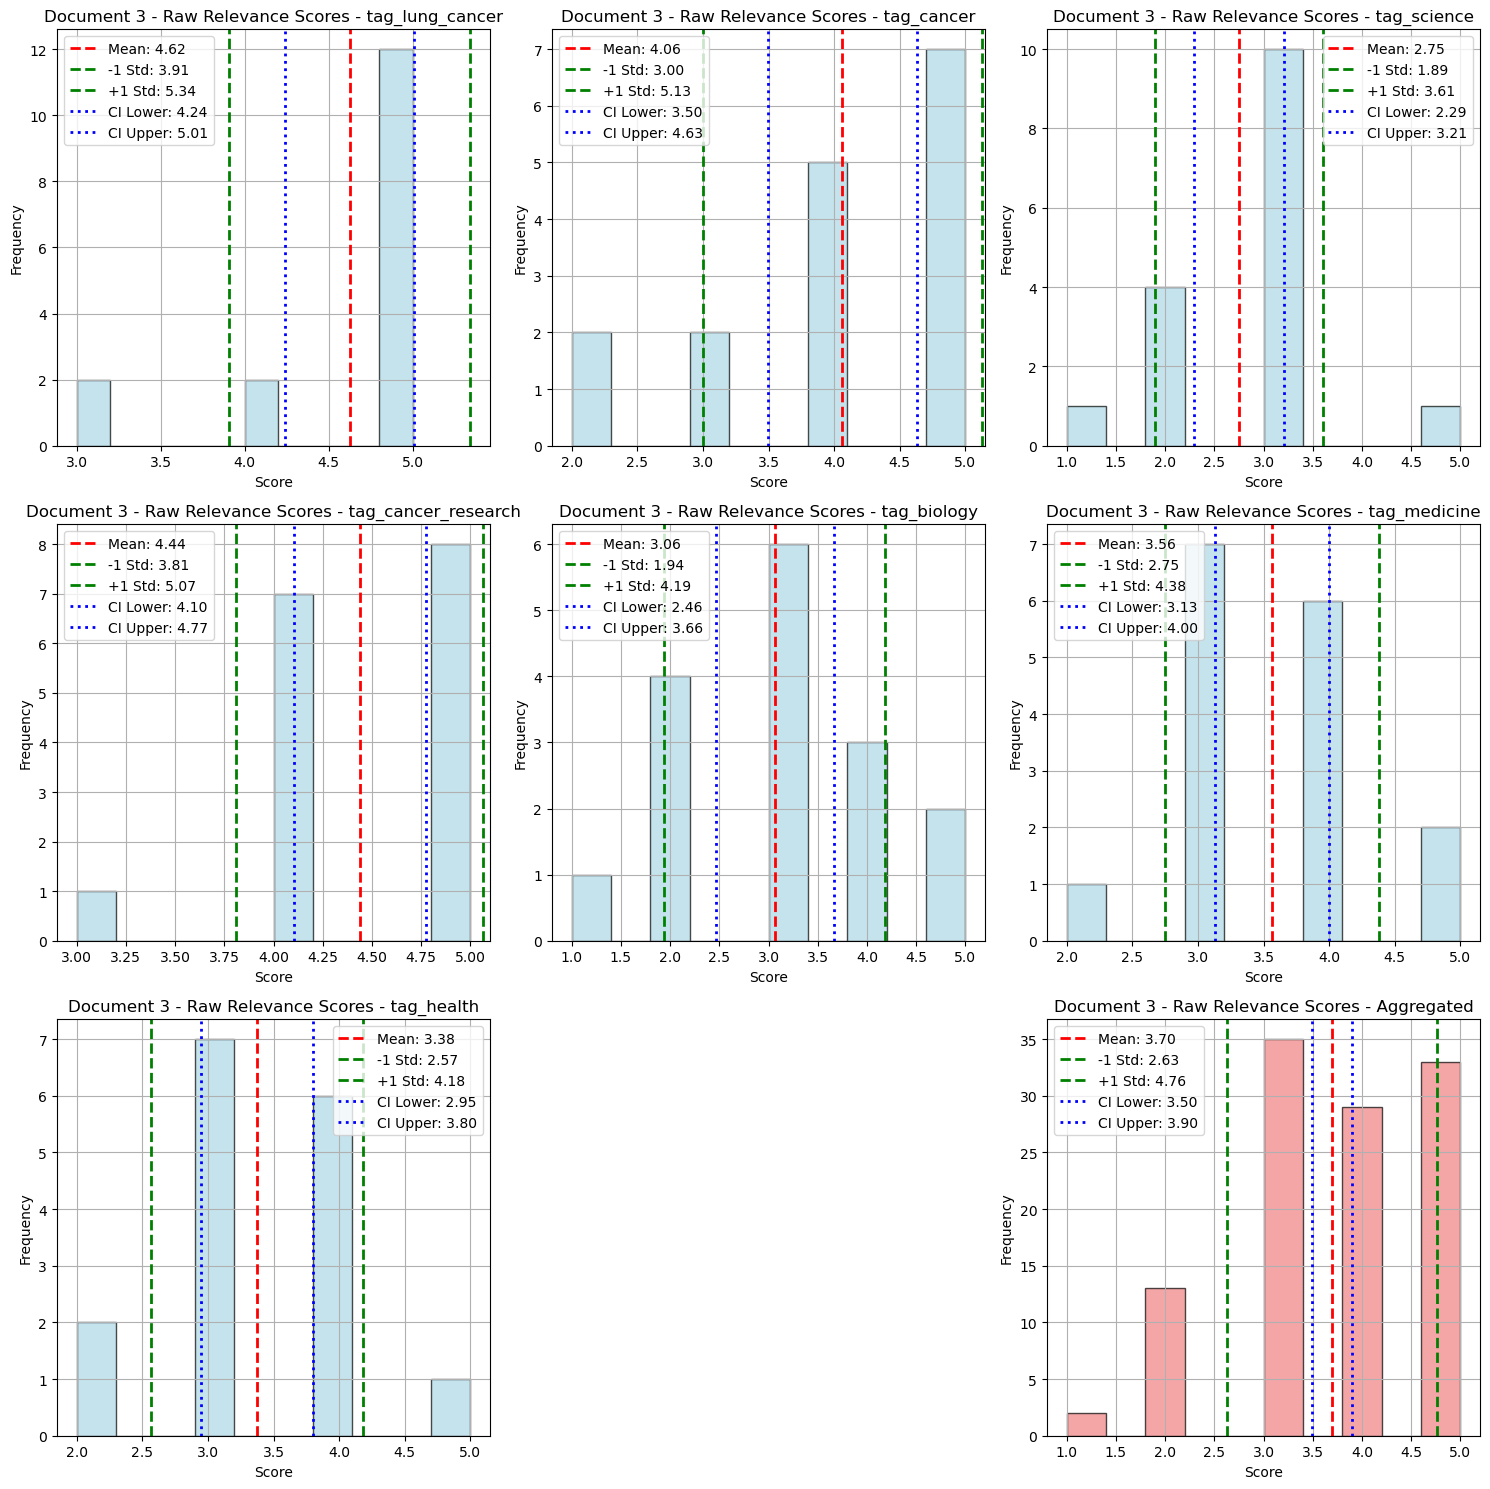

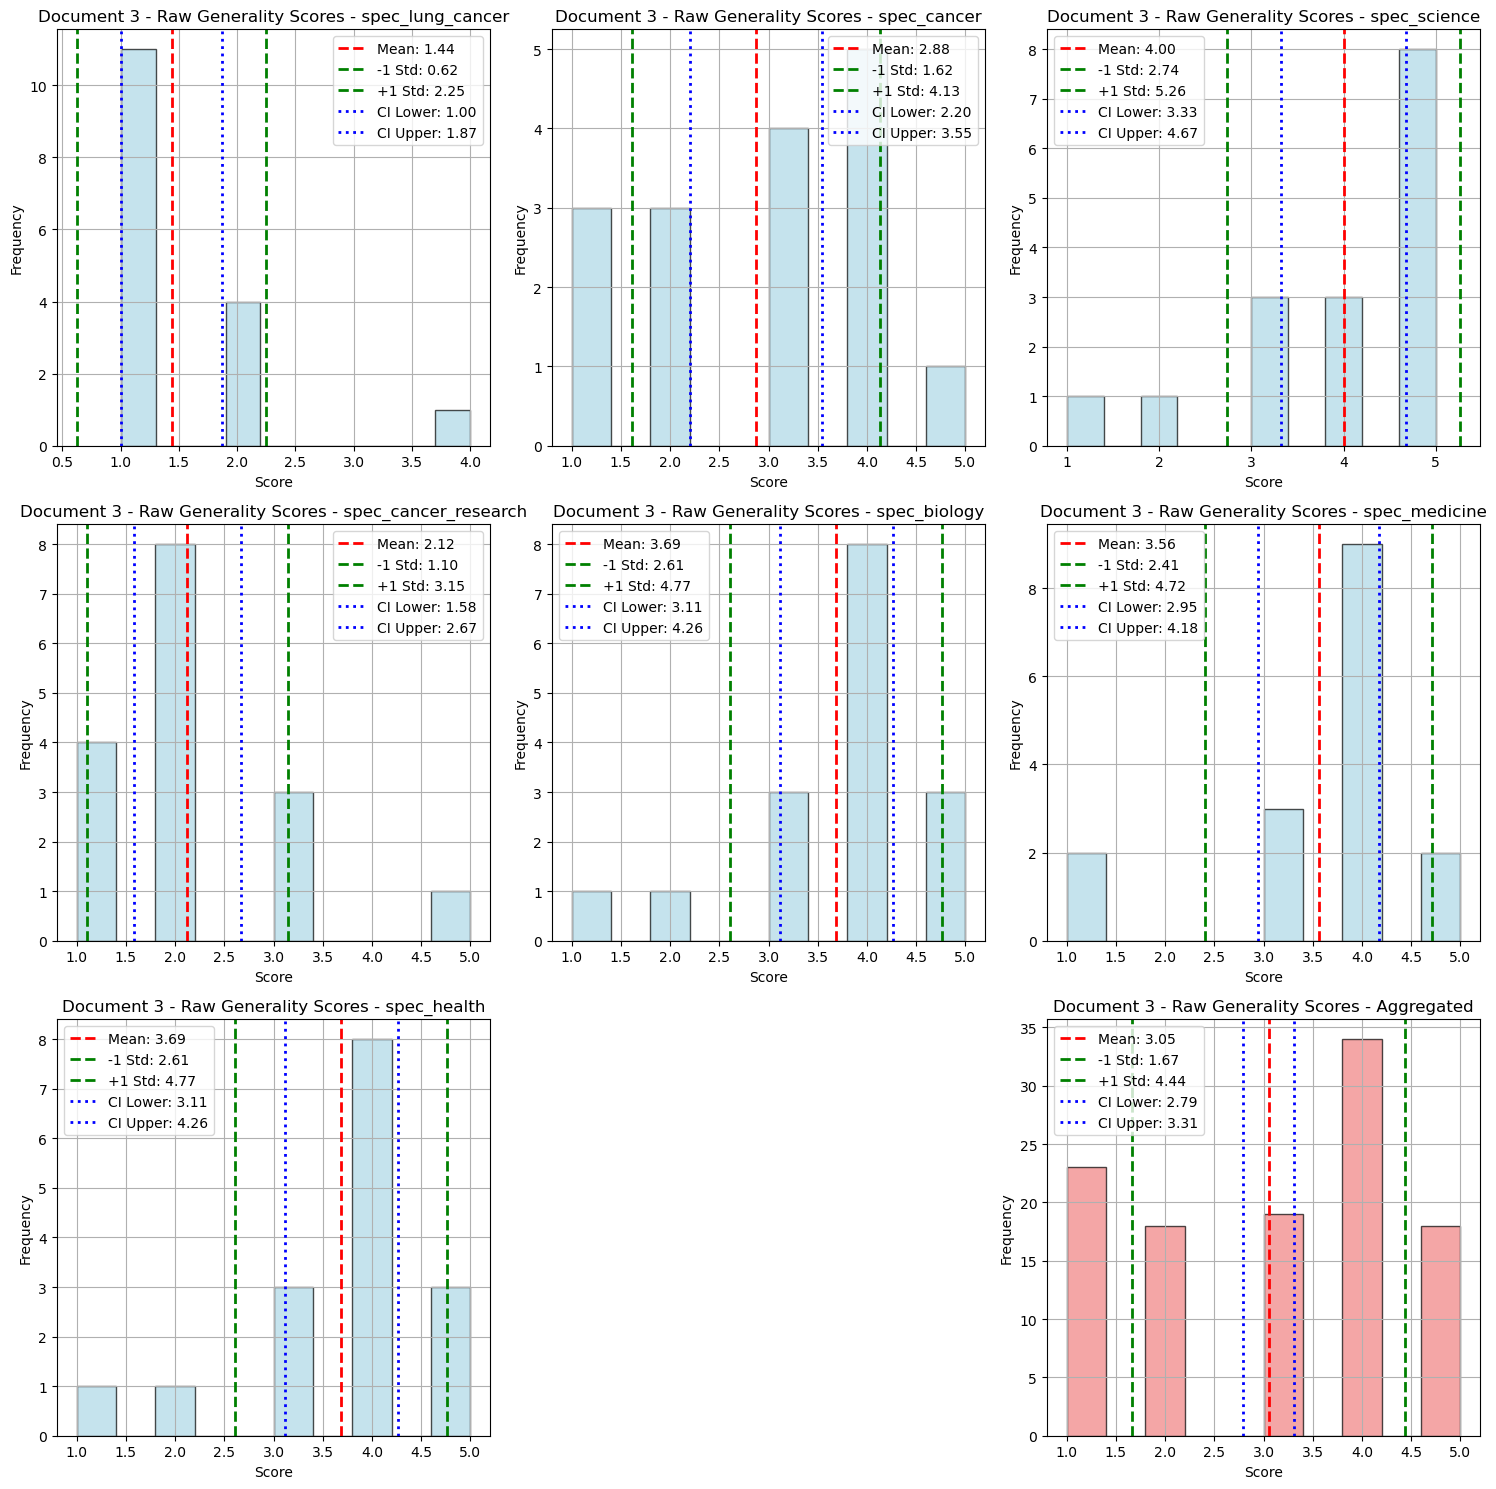

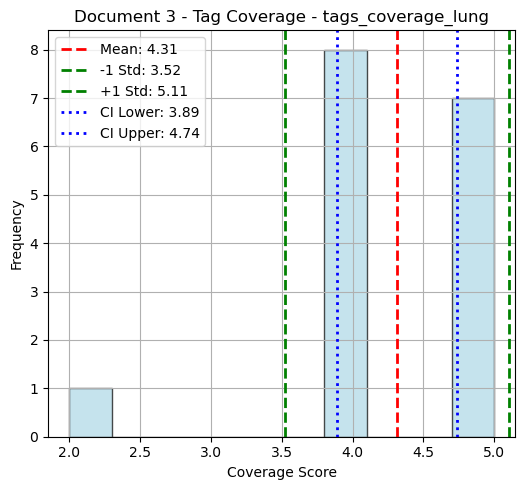

Correlation per Tag:
          Relevance vs Generality
lung                     0.380952
cancer                  -0.195324
science                 -0.240401
biology                 -0.548766
medicine                -0.544900
health                  -0.403061

Overall Correlations:
         Relevance vs Generality
Overall                -0.283146


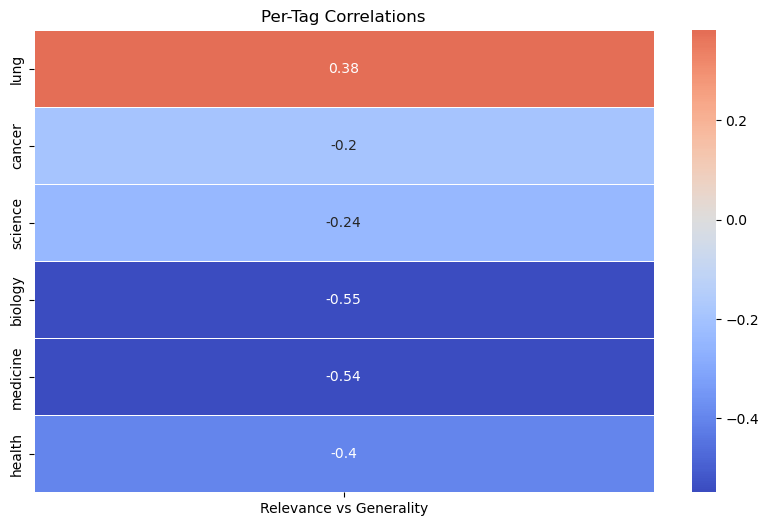

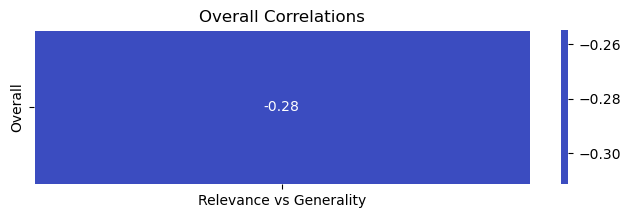

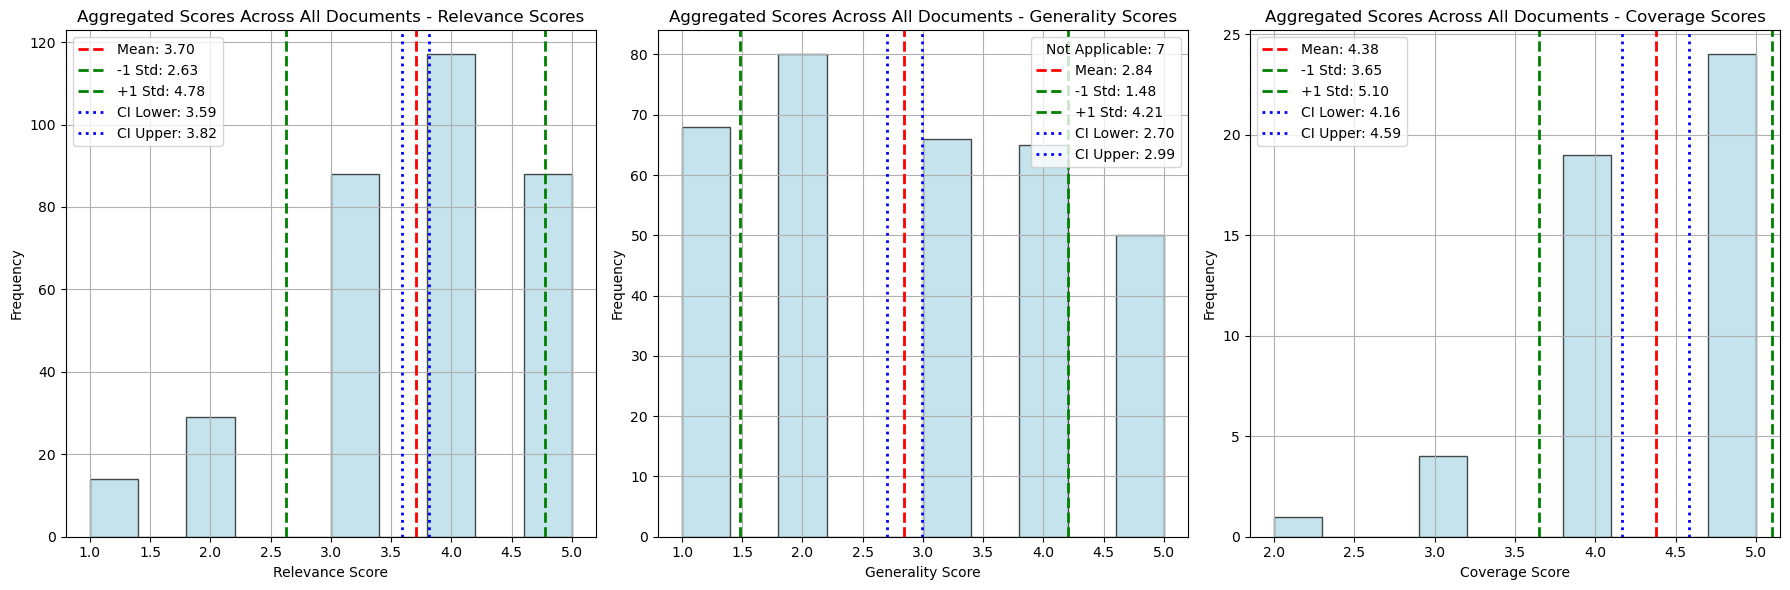


Aggregated Overall Correlations (pandas):
            Relevance  Generality
Relevance    1.000000   -0.526297
Generality  -0.526297    1.000000


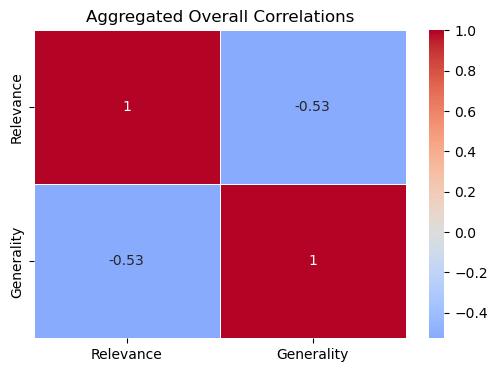

ICC for Relevance:


Type              Description       ICC          F  df1  df2  \
0   ICC1   Single raters absolute  0.287841   7.466896   20  315   
1   ICC2     Single random raters  0.300639  12.680032   20  300   
2   ICC3      Single fixed raters  0.421966  12.680032   20  300   
3  ICC1k  Average raters absolute  0.866076   7.466896   20  315   
4  ICC2k    Average random raters  0.873065  12.680032   20  300   
5  ICC3k     Average fixed raters  0.921136  12.680032   20  300   

           pval         CI95%  
0  2.603041e-17  [0.17, 0.48]  
1  1.665066e-29   [0.17, 0.5]  
2  1.665066e-29  [0.28, 0.62]  
3  2.603041e-17  [0.77, 0.94]  
4  1.665066e-29  [0.77, 0.94]  
5  1.665066e-29  [0.86, 0.96]


ICC for Generality:


Type              Description       ICC          F  df1  df2  \
0   ICC1   Single raters absolute  0.488844  16.301571   15  240   
1   ICC2     Single random raters  0.495679  28.312318   15  225   
2   ICC3      Single fixed raters  0.630590  28.312318   15  225   
3  ICC1k  Average raters absolute  0.938656  16.301571   15  240   
4  ICC2k    Average random raters  0.940212  28.312318   15  225   
5  ICC3k     Average fixed raters  0.964680  28.312318   15  225   

           pval         CI95%  
0  6.449185e-29  [0.32, 0.71]  
1  1.436225e-43  [0.32, 0.72]  
2  1.436225e-43  [0.47, 0.81]  
3  6.449185e-29  [0.88, 0.97]  
4  1.436225e-43  [0.88, 0.98]  
5  1.436225e-43  [0.93, 0.99]


ICC for Coverage:


Type              Description       ICC         F  df1  df2      pval  \
0   ICC1   Single raters absolute  0.033094  1.547619    2   45  0.223864   
1   ICC2     Single random raters  0.071253  4.834711    2   30  0.015135   
2   ICC3      Single fixed raters  0.193333  4.834711    2   30  0.015135   
3  ICC1k  Average raters absolute  0.353846  1.547619    2   45  0.223864   
4  ICC2k    Average random raters  0.551069  4.834711    2   30  0.015135   
5  ICC3k     Average fixed raters  0.793162  4.834711    2   30  0.015135   

           CI95%  
0  [-0.04, 0.79]  
1    [0.0, 0.79]  
2   [0.01, 0.92]  
3  [-1.59, 0.98]  
4   [0.05, 0.98]  
5   [0.13, 0.99]


ICC for Shared Coverage:


Type              Description       ICC         F  df1  df2      pval  \
0   ICC1   Single raters absolute  0.208602  5.217391    1   30  0.029609   
1   ICC2     Single random raters  0.220339  7.500000    1   15  0.015231   
2   ICC3      Single fixed raters  0.288889  7.500000    1   15  0.015231   
3  ICC1k  Average raters absolute  0.808333  5.217391    1   30  0.029609   
4  ICC2k    Average random raters  0.818898  7.500000    1   15  0.015231   
5  ICC3k     Average fixed raters  0.866667  7.500000    1   15  0.015231   

          CI95%  
0   [-0.0, 1.0]  
1   [0.01, 1.0]  
2   [0.01, 1.0]  
3  [-0.07, 1.0]  
4   [0.19, 1.0]  
5   [0.17, 1.0]


Fleiss' Kappa for Relevance: 0.0984
Fleiss' Kappa for Generality: 0.1803
Fleiss' Kappa for Coverage: -0.0003
Fleiss' Kappa for Shared Coverage: 0.0878

Krippendorff's Alpha for Relevance: 0.2650
Krippendorff's Alpha for Generality: 0.1690
Krippendorff's Alpha for Coverage: 0.6122
Krippendorff's Alpha for Shared Coverage: 0.1389


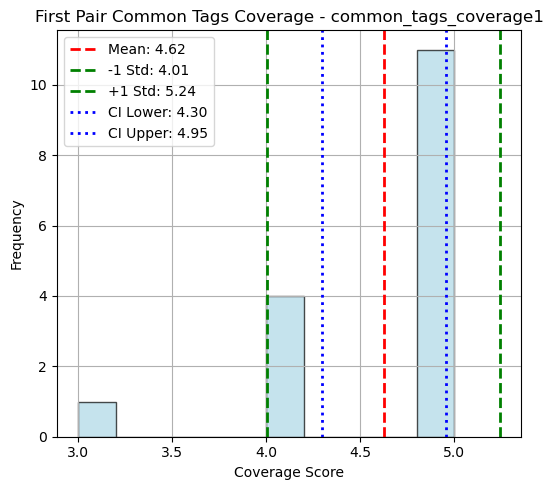

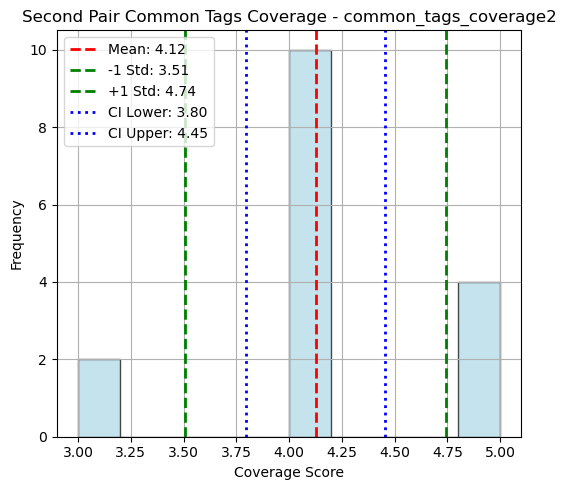


Metrics for First Pair Common Tags:
Accuracy: 0.86
Precision: 0.79
Recall: 0.85
Specificity: 0.86
F1-Score: 0.82

Metrics for Second Pair Common Tags:
Accuracy: 0.76
Precision: 0.57
Recall: 0.80
Specificity: 0.75
F1-Score: 0.67


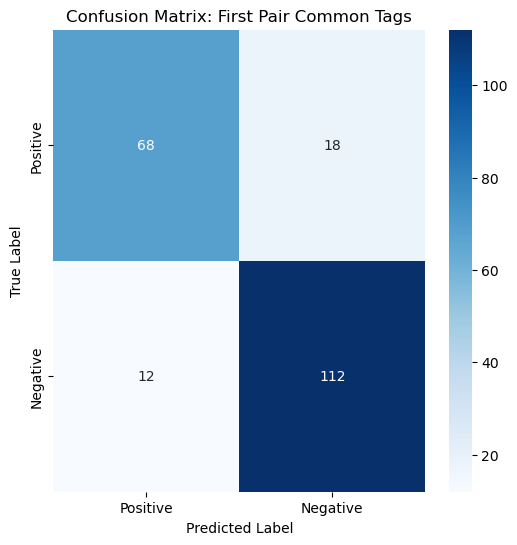

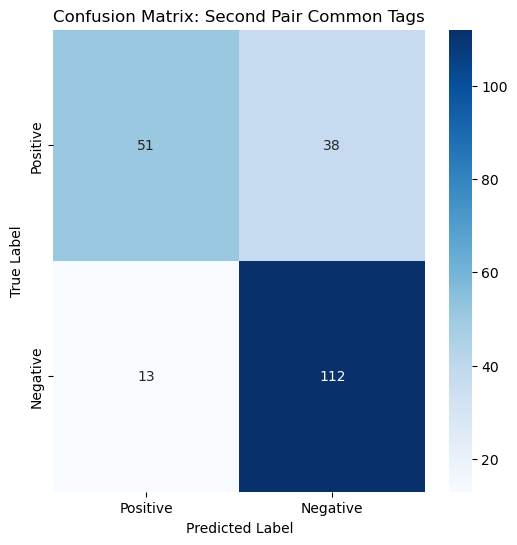

In [26]:
analyze_tags(
    df_model_generated,
    relevance_columns_list=[
        model_first_document_relevance_columns, 
        model_second_document_relevance_columns,
        model_third_document_relevance_columns
    ],
    spec_columns_list=[
        model_first_document_spec_columns, 
        model_second_document_spec_columns,
        model_third_document_spec_columns
    ],
    coverage_columns_list=[
        model_first_document_coverage_columns, 
        model_second_document_coverage_columns,
        model_third_document_coverage_columns
    ],
    suggested_columns_list=[
        model_first_document_suggested_columns,
        model_second_document_suggested_columns,
        model_third_document_suggested_columns
    ],
    common_tags_columns_1=model_first_pair_common_tags_columns,
    common_tags_true_tags_1=model_first_pair_common_tags_true_tags,
    common_tags_coverage_1=model_first_pair_coverage,
    common_tags_columns_2=model_second_pair_common_tags_columns,
    common_tags_true_tags_2=model_second_pair_common_tags_true_tags,
    common_tags_coverage_2=model_second_pair_coverage_columns
)

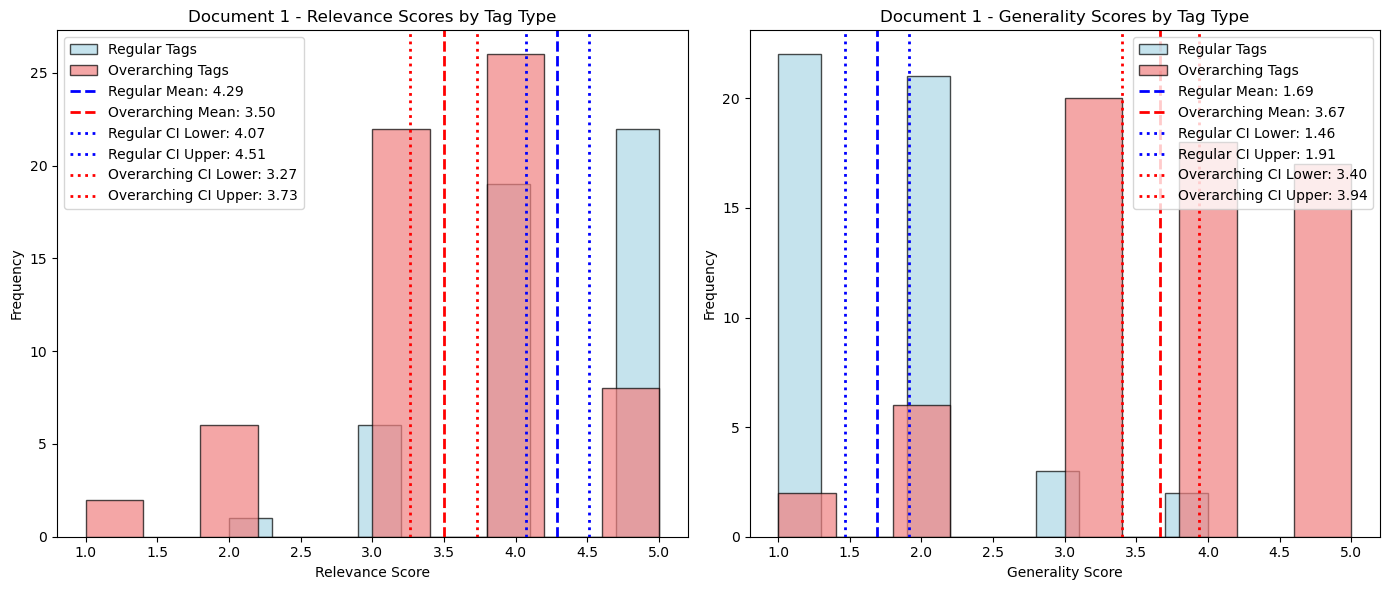

/var/folders/cl/69z7wmcn5xx7cb7wc_xvd8fw0000gn/T/ipykernel_2700/1217372500.py:4: RuntimeWarning: Mean of empty slice.
  mean = data.mean()
/Users/ivang/miniconda3/envs/openml-tags/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/ivang/miniconda3/envs/openml-tags/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/ivang/miniconda3/envs/openml-tags/lib/python3.10/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Users/ivang/miniconda3/envs/openml-tags/lib/python3.10/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


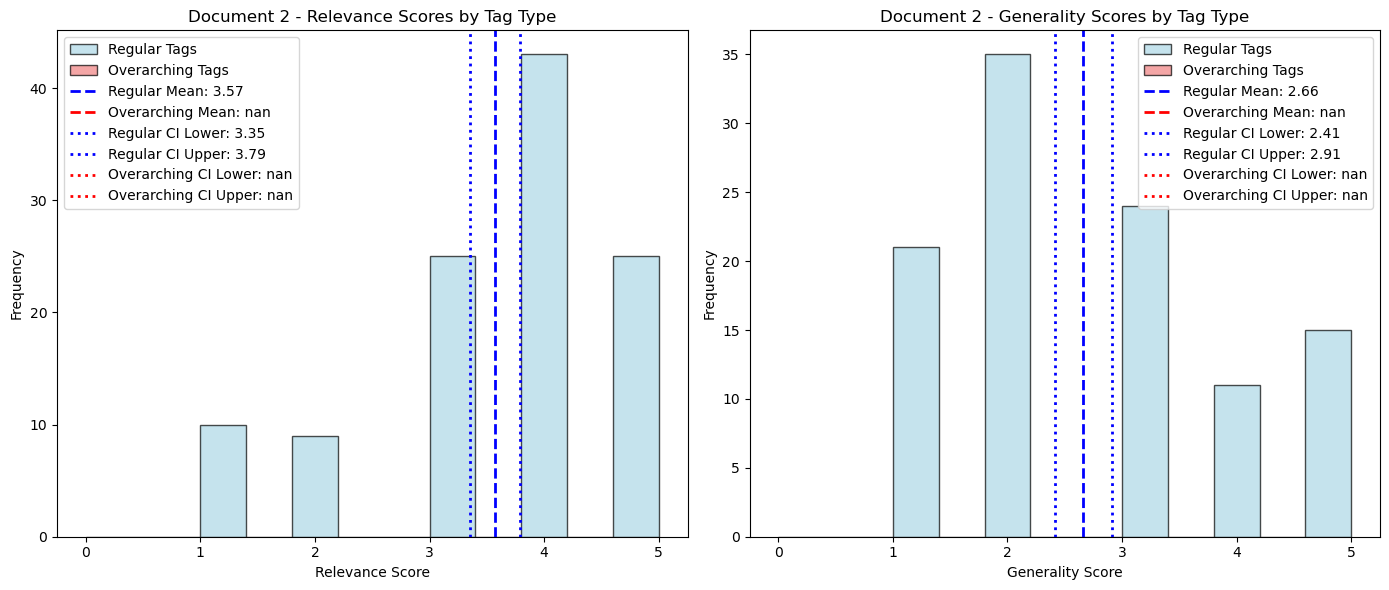

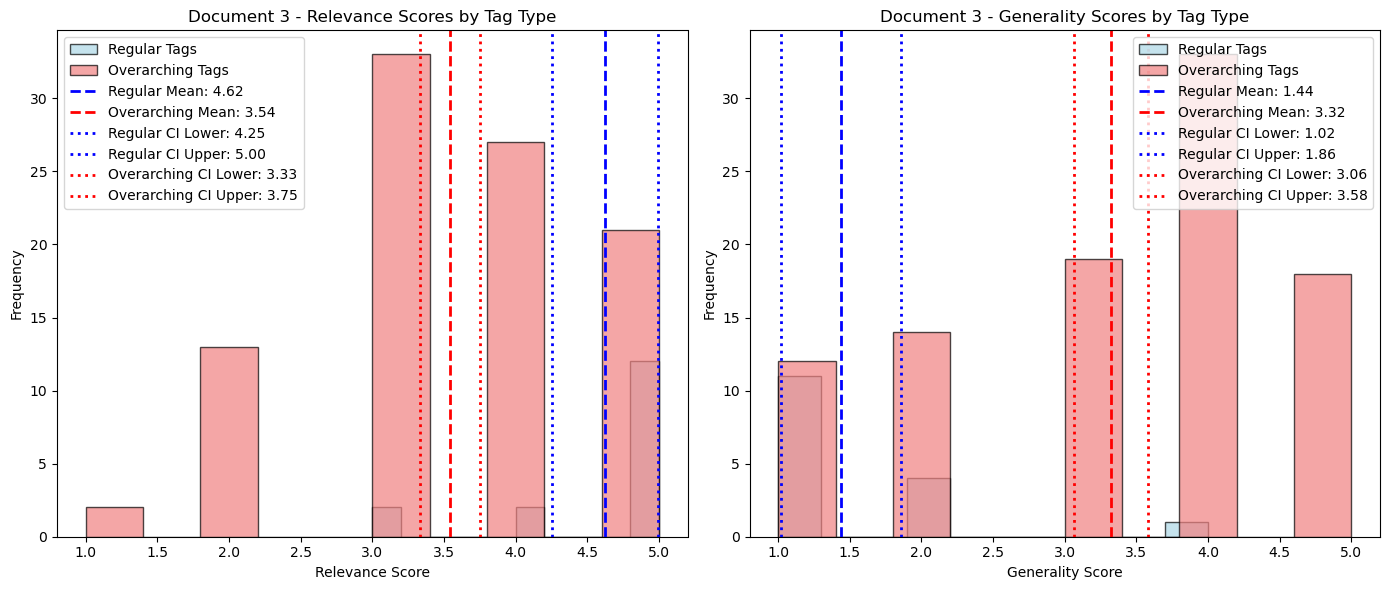

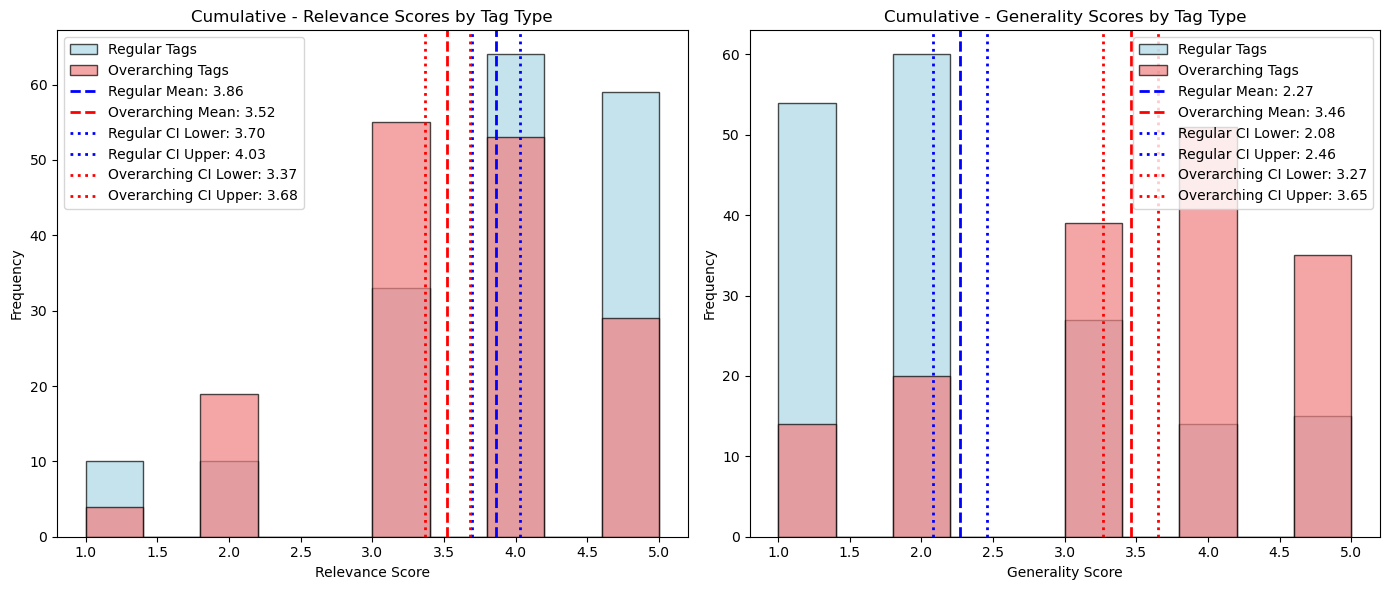

In [27]:
doc_relevance_columns_list = [
    model_first_document_relevance_columns,
    model_second_document_relevance_columns,
    model_third_document_relevance_columns
]

doc_spec_columns_list = [
    model_first_document_spec_columns,
    model_second_document_spec_columns,
    model_third_document_spec_columns
]

doc_tag_types_list = [
    model_first_document_tag_types,
    model_second_document_tag_types,
    model_third_document_tag_types
]

document_names = ['Document 1', 'Document 2', 'Document 3']

# Call the function for all documents and cumulative results
plot_relevance_specificity_multiple_documents(df_model_generated, 
                                              doc_relevance_columns_list, 
                                              doc_spec_columns_list, 
                                              doc_tag_types_list, 
                                              document_names)

In [28]:
def prepare_data_for_kruskal(df, relevance_columns_list, spec_columns_list, coverage_columns_list, shared_coverage_columns_list):
    all_relevance_data = []
    all_spec_data = []
    all_coverage_data = []
    all_shared_coverage_data = []
    
    for relevance_columns, spec_columns, coverage_columns, shared_coverage_columns in zip(relevance_columns_list, spec_columns_list, coverage_columns_list, shared_coverage_columns_list):
        # Preprocess numerical columns
        columns_to_preprocess = relevance_columns + spec_columns
        df = preprocess_numerical_columns(df, columns_to_preprocess)
        
        # Extract the data for each document
        relevance_data = df[relevance_columns].values.flatten()
        spec_data = df[spec_columns].dropna().values.flatten()
        coverage_data = df[coverage_columns].values.flatten()
        shared_coverage_data = df[shared_coverage_columns].values.flatten()
        
        all_relevance_data.extend(relevance_data)
        all_spec_data.extend(spec_data)
        all_coverage_data.extend(coverage_data)
        all_shared_coverage_data.extend(shared_coverage_data)
    
    return all_relevance_data, all_spec_data, all_coverage_data, all_shared_coverage_data

In [29]:
x_baseline_relevance, x_baseline_spec, x_baseline_coverage, x_baseline_shared_coverage = prepare_data_for_kruskal(df_baseline_generated, [baseline_first_document_relevance_columns, baseline_second_document_relevance_columns, baseline_third_document_relevance_columns], [baseline_first_document_spec_columns, baseline_second_document_spec_columns, baseline_third_document_spec_columns], [baseline_first_document_coverage_columns, baseline_second_document_coverage_columns, baseline_third_document_coverage_columns], [baseline_first_pair_coverage_columns, baseline_second_pair_coverage_columns])

x_human_relevance, x_human_spec, x_human_coverage, x_human_shared_coverage = prepare_data_for_kruskal(df_human_generated, [human_first_document_relevance_columns, human_second_document_relevance_columns, human_third_document_relevance_columns], [human_first_document_spec_columns, human_second_document_spec_columns, human_third_document_spec_columns], [human_first_document_coverage_columns, human_second_document_coverage_columns, human_third_document_coverage_columns], [human_first_pair_coverage_columns, human_second_pair_coverage_columns])

x_model_relevance, x_model_spec, x_model_coverage, x_model_shared_coverage = prepare_data_for_kruskal(df_model_generated, [model_first_document_relevance_columns, model_second_document_relevance_columns, model_third_document_relevance_columns], [model_first_document_spec_columns, model_second_document_spec_columns, model_third_document_spec_columns], [model_first_document_coverage_columns, model_second_document_coverage_columns, model_third_document_coverage_columns], [model_first_pair_coverage, model_second_pair_coverage_columns])

In [30]:
def calc_eta_squared(H, n_total, k_groups):
    return (H - k_groups + 1) / (n_total - k_groups)

# Perform Kruskal-Wallis test and calculate Eta-Squared for each metric

# 1. Relevance
H_relevance, p_relevance = stats.kruskal(x_baseline_relevance, x_human_relevance, x_model_relevance)
n_total_relevance = len(x_baseline_relevance) + len(x_human_relevance) + len(x_model_relevance)
k_groups_relevance = 3  # Baseline, Human, Model
eta_squared_relevance = calc_eta_squared(H_relevance, n_total_relevance, k_groups_relevance)
print(f"Kruskal-Wallis H (Relevance): {H_relevance}, p-value: {p_relevance}, Eta-Squared: {eta_squared_relevance}")

# 2. Generality 
H_spec, p_spec = stats.kruskal(x_baseline_spec, x_human_spec, x_model_spec)
n_total_spec = len(x_baseline_spec) + len(x_human_spec) + len(x_model_spec)
k_groups_spec = 3  # Baseline, Human, Model
eta_squared_spec = calc_eta_squared(H_spec, n_total_spec, k_groups_spec)
print(f"Kruskal-Wallis H (Generality): {H_spec}, p-value: {p_spec}, Eta-Squared: {eta_squared_spec}")

# 3. Coverage
H_coverage, p_coverage = stats.kruskal(x_baseline_coverage, x_human_coverage, x_model_coverage)
n_total_coverage = len(x_baseline_coverage) + len(x_human_coverage) + len(x_model_coverage)
k_groups_coverage = 3  # Baseline, Human, Model
eta_squared_coverage = calc_eta_squared(H_coverage, n_total_coverage, k_groups_coverage)
print(f"Kruskal-Wallis H (Coverage): {H_coverage}, p-value: {p_coverage}, Eta-Squared: {eta_squared_coverage}")

# 4. Shared Coverage
H_shared_coverage, p_shared_coverage = stats.kruskal(x_baseline_shared_coverage, x_human_shared_coverage, x_model_shared_coverage)
n_total_shared_coverage = len(x_baseline_shared_coverage) + len(x_human_shared_coverage) + len(x_model_shared_coverage)
k_groups_shared_coverage = 3  # Baseline, Human, Model
eta_squared_shared_coverage = calc_eta_squared(H_shared_coverage, n_total_shared_coverage, k_groups_shared_coverage)
print(f"Kruskal-Wallis H (Shared Coverage): {H_shared_coverage}, p-value: {p_shared_coverage}, Eta-Squared: {eta_squared_shared_coverage}")

Kruskal-Wallis H (Relevance): 219.450938148641, p-value: 2.222461553277856e-48, Eta-Squared: 0.32601340052270017
Kruskal-Wallis H (Generality): 4.118601430761639, p-value: 0.1275431276653173, Eta-Squared: 0.004556132109164814
Kruskal-Wallis H (Coverage): 52.600288407514206, p-value: 3.784360484724975e-12, Eta-Squared: 0.532634614815939
Kruskal-Wallis H (Shared Coverage): 38.84731251031651, p-value: 3.667864386987955e-09, Eta-Squared: 0.38786644747701593


In [31]:
x_baseline_relevance = np.array(x_baseline_relevance).flatten()
x_human_relevance = np.array(x_human_relevance).flatten()
x_model_relevance = np.array(x_model_relevance).flatten()

x_baseline_spec = np.array(x_baseline_spec).flatten()
x_human_spec = np.array(x_human_spec).flatten()
x_model_spec = np.array(x_model_spec).flatten()

x_baseline_coverage = np.array(x_baseline_coverage).flatten()
x_human_coverage = np.array(x_human_coverage).flatten()
x_model_coverage = np.array(x_model_coverage).flatten()

x_baseline_shared_coverage = np.array(x_baseline_shared_coverage).flatten()
x_human_shared_coverage = np.array(x_human_shared_coverage).flatten()
x_model_shared_coverage = np.array(x_model_shared_coverage).flatten()

groups = ['Baseline', 'Human', 'Model']

def format_dunn_result(posthoc_result, groups):
    result_df = pd.DataFrame(posthoc_result)
    result_df.columns = groups
    result_df.index = groups
    return result_df

# Perform Dunn's test for post-hoc pairwise comparisons with Bonferroni correction

# Relevance
posthoc_relevance = sp.posthoc_dunn([x_baseline_relevance, x_human_relevance, x_model_relevance], p_adjust='bonferroni')
print("Dunn's Post-hoc Test (Relevance):")
df_relevance = format_dunn_result(posthoc_relevance, groups)
display(df_relevance)

# Generality
posthoc_spec = sp.posthoc_dunn([x_baseline_spec, x_human_spec, x_model_spec], p_adjust='bonferroni')
print("Dunn's Post-hoc Test (Generality):")
df_spec = format_dunn_result(posthoc_spec, groups)
display(df_spec)

# Coverage
posthoc_coverage = sp.posthoc_dunn([x_baseline_coverage, x_human_coverage, x_model_coverage], p_adjust='bonferroni')
print("Dunn's Post-hoc Test (Coverage):")
df_coverage = format_dunn_result(posthoc_coverage, groups)
display(df_coverage)

# Shared Coverage
posthoc_shared_coverage = sp.posthoc_dunn([x_baseline_shared_coverage, x_human_shared_coverage, x_model_shared_coverage], p_adjust='bonferroni')
print("Dunn's Post-hoc Test (Shared Coverage):")
df_shared_coverage = format_dunn_result(posthoc_shared_coverage, groups)
display(df_shared_coverage)

Dunn's Post-hoc Test (Relevance):


Baseline         Human         Model
Baseline  1.000000e+00  3.017691e-39  8.794712e-34
Human     3.017691e-39  1.000000e+00  6.876302e-01
Model     8.794712e-34  6.876302e-01  1.000000e+00

Dunn's Post-hoc Test (Generality):


Baseline     Human     Model
Baseline  1.000000  1.000000  0.215779
Human     1.000000  1.000000  0.377368
Model     0.215779  0.377368  1.000000

Dunn's Post-hoc Test (Coverage):


Baseline         Human         Model
Baseline  1.000000e+00  1.426045e-09  1.076075e-09
Human     1.426045e-09  1.000000e+00  1.000000e+00
Model     1.076075e-09  1.000000e+00  1.000000e+00

Dunn's Post-hoc Test (Shared Coverage):


Baseline         Human     Model
Baseline  1.000000e+00  1.070425e-08  0.000012
Human     1.070425e-08  1.000000e+00  0.609698
Model     1.199115e-05  6.096983e-01  1.000000

In [32]:
from cliffs_delta import cliffs_delta

delta, res = cliffs_delta(x_baseline_relevance, x_human_relevance)
print(f"Cliff's Delta for Relevance (Baseline vs Human): {delta}, {res}")

delta, res = cliffs_delta(x_baseline_relevance, x_model_relevance)
print(f"Cliff's Delta for Relevance (Baseline vs Model): {delta}, {res}")

delta, res = cliffs_delta(x_human_relevance, x_model_relevance)
print(f"Cliff's Delta for Relevance (Human vs Model): {delta}, {res}")

delta, res = cliffs_delta(x_baseline_spec, x_human_spec)
print(f"Cliff's Delta for Generality (Baseline vs Human): {delta}, {res}")

delta, res = cliffs_delta(x_baseline_spec, x_model_spec)
print(f"Cliff's Delta for Generality (Baseline vs Model): {delta}, {res}")

delta, res = cliffs_delta(x_human_spec, x_model_spec)
print(f"Cliff's Delta for Generality (Human vs Model): {delta}, {res}")

delta, res = cliffs_delta(x_baseline_coverage, x_human_coverage)
print(f"Cliff's Delta for Coverage (Baseline vs Human): {delta}, {res}")

delta, res = cliffs_delta(x_baseline_coverage, x_model_coverage)
print(f"Cliff's Delta for Coverage (Baseline vs Model): {delta}, {res}")

delta, res = cliffs_delta(x_human_coverage, x_model_coverage)
print(f"Cliff's Delta for Coverage (Human vs Model): {delta}, {res}")

delta, res = cliffs_delta(x_baseline_shared_coverage, x_human_shared_coverage)
print(f"Cliff's Delta for Shared Coverage (Baseline vs Human): {delta}, {res}")

delta, res = cliffs_delta(x_baseline_shared_coverage, x_model_shared_coverage)
print(f"Cliff's Delta for Shared Coverage (Baseline vs Model): {delta}, {res}")

delta, res = cliffs_delta(x_human_shared_coverage, x_model_shared_coverage)
print(f"Cliff's Delta for Shared Coverage (Human vs Model): {delta}, {res}")

Cliff's Delta for Relevance (Baseline vs Human): -0.6913582740788623, large
Cliff's Delta for Relevance (Baseline vs Model): -0.6566626650660264, large
Cliff's Delta for Relevance (Human vs Model): 0.08233173076923077, negligible
Cliff's Delta for Generality (Baseline vs Human): 0.05671852899575672, negligible
Cliff's Delta for Generality (Baseline vs Model): 0.13965014577259474, negligible
Cliff's Delta for Generality (Human vs Model): 0.08739139220044453, negligible
Cliff's Delta for Coverage (Baseline vs Human): -0.8639705882352942, large
Cliff's Delta for Coverage (Baseline vs Model): -0.8575367647058824, large
Cliff's Delta for Coverage (Human vs Model): -0.0126953125, negligible
Cliff's Delta for Shared Coverage (Baseline vs Human): -0.7591911764705882, large
Cliff's Delta for Shared Coverage (Baseline vs Model): -0.6608455882352942, large
Cliff's Delta for Shared Coverage (Human vs Model): 0.21484375, small


In [33]:
# Cohen is not great for non-normal distributions, but we can still calculate it
d_relevance_baseline_human = pg.compute_effsize(x_baseline_relevance, x_human_relevance, eftype='cohen')
print(f"Cohen's d for Relevance (Baseline vs Human): {d_relevance_baseline_human}")

d_relevance_baseline_model = pg.compute_effsize(x_baseline_relevance, x_model_relevance, eftype='cohen')
print(f"Cohen's d for Relevance (Baseline vs Model): {d_relevance_baseline_model}")

d_relevance_human_model = pg.compute_effsize(x_human_relevance, x_model_relevance, eftype='cohen')
print(f"Cohen's d for Relevance (Human vs Model): {d_relevance_human_model}")

Cohen's d for Relevance (Baseline vs Human): -1.538475631502161
Cohen's d for Relevance (Baseline vs Model): -1.4220072587167956
Cohen's d for Relevance (Human vs Model): 0.13357542841785439
